# Prepare Data

In [1]:
# Read-in data
dat <- read.csv("../input/home-prices-data/home_prices_data_v9.csv")
names(dat)
str(dat)

dat$RegionName <- as.factor(dat$RegionName)
Dte <- as.Date(dat$Date, format = "%m/%d/%Y")
dat$Month <- as.factor(dat$Month)
mnth <- data.frame(model.matrix(~dat$Month-1))

[1] "Lookup"                                               
 [2] "Date"                                                 
 [3] "Month01"                                              
 [4] "Month02"                                              
 [5] "Month03"                                              
 [6] "Month04"                                              
 [7] "Month05"                                              
 [8] "Month06"                                              
 [9] "Month07"                                              
[10] "Month08"                                              
[11] "Month09"                                              
[12] "Month10"                                              
[13] "Month11"                                              
[14] "Month12"                                              
[15] "RegionID"                                             
[16] "SizeRank"                                             
[17] "RegionName"                                           
[18] "StateName"                                            
[19] "Metro"                                                
[20] "CountyName"                                           
[21] "Average.Price"                                        
[22] "Political_Party"                                      
[23] "Population"                                           
[24] "Employment"                                           
[25] "Unemployment"                                         
[26] "Unemployment.Rate"                                    
[27] "Household.Income"                                     
[28] "X10.yr.bond.rate"                                     
[29] "X30.yr.fixed.mortgage.rate"                           
[30] "Violent.Crimes.Rate"                                  
[31] "Renter.percentage"                                    
[32] "Education.Attainment..High.School.Diploma.or.Less."   
[33] "Education.Attainment..At.Least.a.High.School.Diploma."
[34] "Weather..High."                                       
[35] "Month"

'data.frame':	1800 obs. of  35 variables:
 $ Lookup                                               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date                                                 : chr  "1/31/2005" "1/31/2005" "1/31/2005" "1/31/2005" ...
 $ Month01                                              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Month02                                              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Month03                                              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Month04                                              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Month05                                              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Month06                                              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Month07                                              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Month08                                              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Month09                                              : i

In [2]:
# Data Cleanup
datALL <- dat[ , c(21,2,17,22:35)]
names(datALL)
colnames(datALL)[1] <- "AveragePrice"
colnames(datALL)[3] <- "RegionName"
colnames(datALL)[4] <- "PoliticalParty"
colnames(datALL)[8] <- "UnemploymentRate"
colnames(datALL)[9] <- "HouseholdIncome"
colnames(datALL)[10] <- "10YearBondRate"
colnames(datALL)[11] <- "30YearFixedMortgageRate"
colnames(datALL)[12] <- "ViolentCrimesRate"
colnames(datALL)[13] <- "RenterPercent"
colnames(datALL)[14] <- "EducationAttainmentHighSchoolORless"
colnames(datALL)[15] <- "EducationAttainmentAtLeastHighSchoolDiploma"
colnames(datALL)[16] <- "WeatherHigh"
names(datALL)
str(datALL)
head(datALL)

[1] "Average.Price"                                        
 [2] "Date"                                                 
 [3] "RegionName"                                           
 [4] "Political_Party"                                      
 [5] "Population"                                           
 [6] "Employment"                                           
 [7] "Unemployment"                                         
 [8] "Unemployment.Rate"                                    
 [9] "Household.Income"                                     
[10] "X10.yr.bond.rate"                                     
[11] "X30.yr.fixed.mortgage.rate"                           
[12] "Violent.Crimes.Rate"                                  
[13] "Renter.percentage"                                    
[14] "Education.Attainment..High.School.Diploma.or.Less."   
[15] "Education.Attainment..At.Least.a.High.School.Diploma."
[16] "Weather..High."                                       
[17] "Month"

[1] "AveragePrice"                               
 [2] "Date"                                       
 [3] "RegionName"                                 
 [4] "PoliticalParty"                             
 [5] "Population"                                 
 [6] "Employment"                                 
 [7] "Unemployment"                               
 [8] "UnemploymentRate"                           
 [9] "HouseholdIncome"                            
[10] "10YearBondRate"                             
[11] "30YearFixedMortgageRate"                    
[12] "ViolentCrimesRate"                          
[13] "RenterPercent"                              
[14] "EducationAttainmentHighSchoolORless"        
[15] "EducationAttainmentAtLeastHighSchoolDiploma"
[16] "WeatherHigh"                                
[17] "Month"

'data.frame':	1800 obs. of  17 variables:
 $ AveragePrice                               : int  520987 558599 550192 808703 297520 235064 460817 442792 351244 239945 ...
 $ Date                                       : chr  "1/31/2005" "1/31/2005" "1/31/2005" "1/31/2005" ...
 $ RegionName                                 : Factor w/ 10 levels "Bakersfield",..: 4 8 10 9 7 2 3 5 6 1 ...
 $ PoliticalParty                             : int  1 2 1 1 1 2 1 1 2 2 ...
 $ Population                                 : int  3769131 1261035 901159 780187 442662 457786 470781 389937 284715 299363 ...
 $ Employment                                 : int  4446300 1415500 790300 735600 952100 352400 4446300 1177600 1589700 283000 ...
 $ Unemployment                               : int  286100 67400 50000 38700 54800 44700 286100 67000 94500 32300 ...
 $ UnemploymentRate                           : num  6 4.5 6 5 5.4 11.3 6 5.4 5.6 10.2 ...
 $ HouseholdIncome                            : int  63316 73929 11

AveragePrice Date      RegionName    PoliticalParty Population Employment
1 520987       1/31/2005 Los Angeles   1              3769131    4446300   
2 558599       1/31/2005 San Diego     2              1261035    1415500   
3 550192       1/31/2005 San Jose      1               901159     790300   
4 808703       1/31/2005 San Francisco 1               780187     735600   
5 297520       1/31/2005 Sacramento    1               442662     952100   
6 235064       1/31/2005 Fresno        2               457786     352400   
  Unemployment UnemploymentRate HouseholdIncome 10YearBondRate
1 286100        6.0              63316          4.2215        
2  67400        4.5              73929          4.2215        
3  50000        6.0             116456          4.2215        
4  38700        5.0              85801          4.2215        
5  54800        5.4              83660          4.2215        
6  44700       11.3              61340          4.2215        
  30YearFixedMortgageRate ViolentCrimesRate RenterPercent
1 5.71                     820.62           0.5092       
2 5.71                     519.04           0.4177       
3 5.71                     383.51           0.3943       
4 5.71                     798.88           0.4218       
5 5.71                    1151.20           0.3687       
6 5.71                     845.78           0.4244       
  EducationAttainmentHighSchoolORless
1 1830447                            
2  379939                            
3  340816                            
4  231507                            
5  270113                            
6  200117                            
  EducationAttainmentAtLeastHighSchoolDiploma WeatherHigh Month
1 3823994                                     0.292       1    
2 1660805                                     0.250       1    
3 1236428                                     0.083       1    
4  503847                                     0.042       1    
5 1296110                                     0.000       1    
6  390605                                     0.042       1

In [3]:
# Add Time-Squared Variable
timetr <- data.frame (1:180)
timetrsq <- timetr^2

# Create Dataframe for each Region

In [4]:
# Los Angeles
datLAtemp <- subset(datALL, RegionName == "Los Angeles")
datLA <- datLAtemp[,c(1:2,4:17)]
datLAts <- cbind(datLA, timetr, timetrsq)
names(datLAts)[17:18] <- c("timetr", "timetrsq")
names(datLAts)
str(datLAts)
datLAts2 <- ts(datLA[,1], start = 2005, end = 2019, frequency = 12)
datLAts2

[1] "AveragePrice"                               
 [2] "Date"                                       
 [3] "PoliticalParty"                             
 [4] "Population"                                 
 [5] "Employment"                                 
 [6] "Unemployment"                               
 [7] "UnemploymentRate"                           
 [8] "HouseholdIncome"                            
 [9] "10YearBondRate"                             
[10] "30YearFixedMortgageRate"                    
[11] "ViolentCrimesRate"                          
[12] "RenterPercent"                              
[13] "EducationAttainmentHighSchoolORless"        
[14] "EducationAttainmentAtLeastHighSchoolDiploma"
[15] "WeatherHigh"                                
[16] "Month"                                      
[17] "timetr"                                     
[18] "timetrsq"

'data.frame':	180 obs. of  18 variables:
 $ AveragePrice                               : int  520987 530077 538362 547026 553155 561053 570253 580514 590751 601842 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Population                                 : int  3769131 3769131 3769131 3769131 3769131 3769131 3769131 3769131 3769131 3769131 ...
 $ Employment                                 : int  4446300 4491600 4499300 4538300 4521900 4512100 4534300 4545700 4555500 4581100 ...
 $ Unemployment                               : int  286100 282200 262900 249300 243300 253900 271000 249300 244100 234700 ...
 $ UnemploymentRate                           : num  6 5.9 5.5 5.2 5.1 5.3 5.6 5.2 5.1 4.9 ...
 $ HouseholdIncome                            : int  63316 63316 63316 63316 63316 63316 63316 63316 63316 63316 ...
 $ 10YearBondRate                    

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
2005 520987 530077 538362 547026 553155 561053 570253 580514 590751 601842
2006 624755 630004 636285 640154 646316 650327 653364 654803 652556 651129
2007 652104 650321 648030 648101 646471 644582 640830 636023 629975 621816
2008 600760 592437 580062 564878 548555 535227 522003 510146 500399 491519
2009 458566 452147 448647 444735 441187 437445 435256 435198 436039 437275
2010 443474 441260 440817 441873 445830 444219 442515 438684 435730 432400
2011 423695 423326 420806 418116 412713 411740 410351 409012 405993 402808
2012 400472 399385 398855 398920 400478 402586 405130 407594 411279 416955
2013 433682 442252 451006 461810 470695 479500 488323 499478 509007 515618
2014 527651 528337 530033 529716 531222 531919 534606 534265 534611 534694
2015 545724 550456 555041 556674 559564 562356 564698 567443 570388 575132
2016 587711 591562 593862 600103 604219 608947 611310 615416 620355 625774
2017 634128 637239 640855 643133 647743 651675 656294 660355 664284 667725
2018 685331 691194 697740 702650 704730 706155 709156 711451 713262 714359
2019 715717                                                               
     Nov    Dec   
2005 610734 618108
2006 650726 652588
2007 614364 607072
2008 481940 468438
2009 439059 442879
2010 427960 425356
2011 402486 401045
2012 421848 428643
2013 520480 523211
2014 537948 541286
2015 578925 584545
2016 628777 630619
2017 673738 679687
2018 715685 715600
2019

In [5]:
# San Francisco:
datSFtemp <- subset(datALL, RegionName == "San Francisco")
datSF <- datSFtemp[,c(1:2,4:17)]
datSFts <- cbind(datSF, timetr, timetrsq)
names(datSFts)[17:18] <- c("timetr", "timetrsq")
names(datSFts)
str(datSFts)
datSFts2 <- ts(datSF[,1], start = 2005, end = 2019, frequency = 12)
datSFts2

[1] "AveragePrice"                               
 [2] "Date"                                       
 [3] "PoliticalParty"                             
 [4] "Population"                                 
 [5] "Employment"                                 
 [6] "Unemployment"                               
 [7] "UnemploymentRate"                           
 [8] "HouseholdIncome"                            
 [9] "10YearBondRate"                             
[10] "30YearFixedMortgageRate"                    
[11] "ViolentCrimesRate"                          
[12] "RenterPercent"                              
[13] "EducationAttainmentHighSchoolORless"        
[14] "EducationAttainmentAtLeastHighSchoolDiploma"
[15] "WeatherHigh"                                
[16] "Month"                                      
[17] "timetr"                                     
[18] "timetrsq"

'data.frame':	180 obs. of  18 variables:
 $ AveragePrice                               : int  808703 821536 831583 842577 850977 859748 868253 874735 882374 889915 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Population                                 : int  780187 780187 780187 780187 780187 780187 780187 780187 780187 780187 ...
 $ Employment                                 : int  735600 737500 735100 733300 734200 735100 740100 739500 739300 742300 ...
 $ Unemployment                               : int  38700 39300 38400 35300 33300 37100 37400 36100 34600 34000 ...
 $ UnemploymentRate                           : num  5 5.1 5 4.6 4.3 4.8 4.8 4.6 4.5 4.4 ...
 $ HouseholdIncome                            : int  85801 85801 85801 85801 85801 85801 85801 85801 85801 85801 ...
 $ 10YearBondRate                             : num  4.22 4.17 4.5 4.

Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep    
2005  808703  821536  831583  842577  850977  859748  868253  874735  882374
2006  898303  893783  889377  886003  888500  890806  891258  891458  888721
2007  881149  887250  893473  902299  904252  906266  906741  909534  911427
2008  899031  887022  882700  876240  874529  864924  854212  844404  838194
2009  810852  801402  791607  778855  768634  763965  764336  757958  748216
2010  756063  765060  764361  766430  764671  765324  759351  760435  761043
2011  735641  726810  723694  720706  716776  709466  706254  702980  702656
2012  702971  707730  713304  718732  723294  730619  742786  756369  770919
2013  822452  828161  836111  843687  863264  883546  897228  910703  917267
2014  949909  969559  984669 1000781 1007692 1009009 1012662 1009778 1012757
2015 1051206 1060318 1075436 1093618 1101118 1116571 1136512 1159973 1180267
2016 1225279 1232255 1228967 1214661 1214696 1208545 1198375 1187458 1186359
2017 1212326 1208365 1207043 1215281 1228137 1241942 1256130 1271879 1286084
2018 1319957 1332798 1355929 1377735 1387011 1399056 1405671 1416603 1417071
2019 1405370                                                                
     Oct     Nov     Dec    
2005  889915  894361  897922
2006  883880  880288  879524
2007  910911  911348  904619
2008  833496  826407  818523
2009  742820  742322  751264
2010  760482  754789  743439
2011  701160  701895  703393
2012  784565  795257  806072
2013  923085  928086  939693
2014 1018197 1036411 1046267
2015 1195855 1199931 1209775
2016 1192592 1204819 1210971
2017 1294341 1302945 1310732
2018 1418097 1413299 1404710
2019

In [6]:
# Fresno:
datFRStemp <- subset(datALL, RegionName == "Fresno")
datFRS <- datFRStemp[,c(1:2,4:17)]
datFRSts <- cbind(datFRS, timetr, timetrsq)
names(datFRSts)[17:18] <- c("timetr", "timetrsq")
names(datFRSts)
datFRS2 <- ts(datFRS[,1], start = 2005, end = 2019, frequency = 12)
datFRS2

[1] "AveragePrice"                               
 [2] "Date"                                       
 [3] "PoliticalParty"                             
 [4] "Population"                                 
 [5] "Employment"                                 
 [6] "Unemployment"                               
 [7] "UnemploymentRate"                           
 [8] "HouseholdIncome"                            
 [9] "10YearBondRate"                             
[10] "30YearFixedMortgageRate"                    
[11] "ViolentCrimesRate"                          
[12] "RenterPercent"                              
[13] "EducationAttainmentHighSchoolORless"        
[14] "EducationAttainmentAtLeastHighSchoolDiploma"
[15] "WeatherHigh"                                
[16] "Month"                                      
[17] "timetr"                                     
[18] "timetrsq"

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
2005 235064 239902 245376 251026 256245 261129 265804 271174 275818 280802
2006 293966 296065 298404 300119 301765 302728 303408 302846 302230 300823
2007 297292 296809 294257 292426 288066 285004 281546 280098 277468 274215
2008 257849 251691 245499 237904 234142 229747 224221 216006 208006 201300
2009 184060 179807 176260 173539 169436 165608 163773 163221 163150 162137
2010 162954 164218 165114 164796 164491 163795 161669 159526 157198 156749
2011 152742 148804 145640 143355 141463 140271 139616 138642 138014 136659
2012 134878 135937 136969 138475 139432 140061 141270 142891 144728 146008
2013 150985 152795 154501 156889 159549 162709 165515 168095 170398 173162
2014 179343 181104 183309 183690 184849 184934 184602 184622 184748 185581
2015 187156 187930 188017 188935 189527 190955 192266 193458 194583 194954
2016 198511 199072 199840 200721 201720 202664 203214 204291 205807 208029
2017 212201 213942 215868 217481 218165 219004 221223 223397 224969 226191
2018 231266 233301 234262 235581 238319 240800 242079 241992 242626 243300
2019 246803                                                               
     Nov    Dec   
2005 285327 290742
2006 299857 298229
2007 268715 262897
2008 195538 190096
2009 161232 161444
2010 156562 155602
2011 135953 134767
2012 147390 149492
2013 175202 176939
2014 186050 186555
2015 196001 197320
2016 209785 211302
2017 227364 228966
2018 244893 246004
2019

In [7]:
# Bakersfield:
datBKRStemp <- subset(datALL, RegionName == "Bakersfield")
datBKRS <- datBKRStemp[,c(1:2,4:17)]
datBKRSts <- cbind(datBKRS, timetr, timetrsq)
names(datBKRSts)[17:18] <- c("timetr", "timetrsq")
names(datBKRSts)
datBKRS2 <- ts(datBKRS[,1], start = 2005, end = 2019, frequency = 12)
datBKRS2

[1] "AveragePrice"                               
 [2] "Date"                                       
 [3] "PoliticalParty"                             
 [4] "Population"                                 
 [5] "Employment"                                 
 [6] "Unemployment"                               
 [7] "UnemploymentRate"                           
 [8] "HouseholdIncome"                            
 [9] "10YearBondRate"                             
[10] "30YearFixedMortgageRate"                    
[11] "ViolentCrimesRate"                          
[12] "RenterPercent"                              
[13] "EducationAttainmentHighSchoolORless"        
[14] "EducationAttainmentAtLeastHighSchoolDiploma"
[15] "WeatherHigh"                                
[16] "Month"                                      
[17] "timetr"                                     
[18] "timetrsq"

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
2005 239945 245888 251262 257174 263172 270552 276272 279834 283473 289720
2006 304393 306224 310153 314113 318188 318239 321227 322880 324334 322448
2007 322555 320474 318284 316063 313077 310450 304128 298974 292886 288794
2008 271116 265217 257097 247920 238959 230567 222888 215481 209464 203284
2009 183612 178950 174621 171069 167011 164590 163235 161458 159144 156510
2010 156720 156421 157002 157351 158705 158352 157468 156682 156052 156012
2011 151595 150180 149020 147291 145368 143796 142846 142772 142755 142423
2012 143942 144860 145011 146411 147890 149900 151274 152384 154187 156383
2013 163024 166265 170093 173336 177222 181708 186419 190887 194241 197694
2014 206622 208069 209353 210892 211145 210575 210874 211111 212313 212829
2015 214770 215064 215615 216033 217149 217828 217719 218185 218210 218449
2016 218884 219630 219821 220212 220102 220736 221155 221076 220756 221293
2017 223587 224216 225163 225155 225510 225943 226899 228061 229641 230186
2018 232654 233277 233720 235341 236863 237705 237980 238211 238787 240322
2019 243216                                                               
     Nov    Dec   
2005 296749 302644
2006 321985 321760
2007 283422 277432
2008 196523 189834
2009 156091 156411
2010 154282 152601
2011 142753 143281
2012 158703 160830
2013 200701 204072
2014 214073 214483
2015 218212 218402
2016 221902 222668
2017 231367 232048
2018 240699 241830
2019

In [8]:
# Oakland:
datOKtemp <- subset(datALL, RegionName == "Oakland")
datOK <- datOKtemp[,c(1:2,4:17)]
datOKts <- cbind(datOK, timetr, timetrsq)
names(datOKts)[17:18] <- c("timetr", "timetrsq")
names(datOKts)
str(datOKts)
datOKts2 <- ts(datOK[,1], start = 2005, end = 2019, frequency = 12)
datOKts2

[1] "AveragePrice"                               
 [2] "Date"                                       
 [3] "PoliticalParty"                             
 [4] "Population"                                 
 [5] "Employment"                                 
 [6] "Unemployment"                               
 [7] "UnemploymentRate"                           
 [8] "HouseholdIncome"                            
 [9] "10YearBondRate"                             
[10] "30YearFixedMortgageRate"                    
[11] "ViolentCrimesRate"                          
[12] "RenterPercent"                              
[13] "EducationAttainmentHighSchoolORless"        
[14] "EducationAttainmentAtLeastHighSchoolDiploma"
[15] "WeatherHigh"                                
[16] "Month"                                      
[17] "timetr"                                     
[18] "timetrsq"

'data.frame':	180 obs. of  18 variables:
 $ AveragePrice                               : int  442792 450062 456256 463803 471294 478663 483756 489037 493784 499869 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Population                                 : int  389937 389937 389937 389937 389937 389937 389937 389937 389937 389937 ...
 $ Employment                                 : int  1177600 1179700 1177200 1173300 1176600 1178400 1184000 1185500 1185800 1190000 ...
 $ Unemployment                               : int  67000 68300 66100 60900 57900 64300 65600 62100 60300 58800 ...
 $ UnemploymentRate                           : num  5.4 5.5 5.3 4.9 4.7 5.2 5.3 5 4.8 4.7 ...
 $ HouseholdIncome                            : int  80069 80069 80069 80069 80069 80069 80069 80069 80069 80069 ...
 $ 10YearBondRate                             : num  4.22

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
2005 442792 450062 456256 463803 471294 478663 483756 489037 493784 499869
2006 505374 508480 510127 511237 510261 509791 509612 510399 509696 510381
2007 509202 504771 502108 499363 497688 494168 492307 489613 487364 479352
2008 464062 458593 452206 444688 438531 430862 423056 415169 407999 400479
2009 376766 375389 374019 372836 368778 369964 369609 371294 371122 375751
2010 388664 389990 391143 391596 394056 392794 390164 384836 381043 377289
2011 367839 363760 360513 355162 348228 341506 341412 340482 341316 336979
2012 328067 326548 324798 326629 330380 336039 337522 341773 345052 352839
2013 377718 385740 396255 406607 419611 431103 441768 448610 454143 459741
2014 479446 485367 487493 488925 486714 485672 486416 490428 495091 500071
2015 514624 518676 526132 534640 543117 550950 558725 568202 580005 588826
2016 607942 617754 622227 627714 633327 639076 642442 645027 644884 649248
2017 661109 664136 671131 674591 677984 683108 690074 694839 701697 708281
2018 738674 746293 751654 758234 764865 767940 768049 769456 770148 771926
2019 760394                                                               
     Nov    Dec   
2005 502530 505546
2006 510001 509718
2007 474366 466883
2008 390720 384111
2009 380435 384831
2010 375273 371357
2011 333836 330919
2012 359865 368302
2013 466778 474203
2014 505348 510246
2015 594218 599454
2016 653645 658930
2017 717892 728034
2018 772090 767194
2019

In [9]:
# Sacramento:
datSACtemp <- subset(datALL, RegionName == "Sacramento")
datSAC <- datSACtemp[,c(1:2,4:17)]
datSACts <- cbind(datSAC, timetr, timetrsq)
names(datSACts)[17:18] <- c("timetr", "timetrsq")
names(datSACts)
str(datSACts)
datSACts2 <- ts(datSAC[,1], start = 2005, end = 2019, frequency = 12)
datSACts2

[1] "AveragePrice"                               
 [2] "Date"                                       
 [3] "PoliticalParty"                             
 [4] "Population"                                 
 [5] "Employment"                                 
 [6] "Unemployment"                               
 [7] "UnemploymentRate"                           
 [8] "HouseholdIncome"                            
 [9] "10YearBondRate"                             
[10] "30YearFixedMortgageRate"                    
[11] "ViolentCrimesRate"                          
[12] "RenterPercent"                              
[13] "EducationAttainmentHighSchoolORless"        
[14] "EducationAttainmentAtLeastHighSchoolDiploma"
[15] "WeatherHigh"                                
[16] "Month"                                      
[17] "timetr"                                     
[18] "timetrsq"

'data.frame':	180 obs. of  18 variables:
 $ AveragePrice                               : int  297520 303255 308708 313795 318549 323557 327538 331102 335061 339326 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Population                                 : int  442662 442662 442662 442662 442662 442662 442662 442662 442662 442662 ...
 $ Employment                                 : int  952100 952300 952300 952000 957700 959700 970900 971600 970400 972800 ...
 $ Unemployment                               : int  54800 55100 53200 47600 45300 50200 50900 47600 46700 46300 ...
 $ UnemploymentRate                           : num  5.4 5.5 5.3 4.8 4.5 5 5 4.7 4.6 4.5 ...
 $ HouseholdIncome                            : int  83660 83660 83660 83660 83660 83660 83660 83660 83660 83660 ...
 $ 10YearBondRate                             : num  4.22 4.17 4.5 4.

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
2005 297520 303255 308708 313795 318549 323557 327538 331102 335061 339326
2006 346909 346842 345908 346001 345503 345163 343621 342125 338767 334245
2007 320120 316222 314270 312519 309252 304912 300894 297087 293065 286376
2008 271719 268698 261977 253150 245156 237503 231221 224511 219605 216664
2009 204837 199996 196763 195327 193815 192652 189668 187610 185785 185098
2010 182281 181689 181917 181302 181340 181417 181941 181328 179046 176762
2011 173874 171888 169016 166931 164421 161963 160053 158995 158600 157234
2012 154132 154303 154999 155450 155878 156203 157255 159207 161958 165243
2013 174278 178512 183198 188405 194988 201836 209340 214252 218633 221505
2014 232466 234039 234371 234675 234010 233979 232157 232663 232973 235243
2015 237253 239203 242333 244812 246573 248012 249572 250872 252642 254920
2016 264158 265978 267371 269758 273150 275331 277768 280609 283824 286194
2017 292183 294816 298085 300165 301825 305010 308357 310802 312486 314580
2018 321623 324675 326393 327329 328384 329679 331695 333385 333938 334136
2019 335242                                                               
     Nov    Dec   
2005 343023 346168
2006 330194 324848
2007 278852 273948
2008 213883 210351
2009 184685 183034
2010 175141 175146
2011 155758 154344
2012 167999 170888
2013 225658 229998
2014 236435 235917
2015 257317 261374
2016 288716 289961
2017 316525 319226
2018 333977 334829
2019

In [10]:
# Riverside:
datRVtemp <- subset(datALL, RegionName == "Riverside")
datRV <- datRVtemp[,c(1:2,4:17)]
datRVts <- cbind(datRV, timetr, timetrsq)
names(datRVts)[17:18] <- c("timetr", "timetrsq")
names(datRVts)
str(datRVts)
datRVts2 <- ts(datRV[,1], start = 2005, end = 2019, frequency = 12)
datRVts2

[1] "AveragePrice"                               
 [2] "Date"                                       
 [3] "PoliticalParty"                             
 [4] "Population"                                 
 [5] "Employment"                                 
 [6] "Unemployment"                               
 [7] "UnemploymentRate"                           
 [8] "HouseholdIncome"                            
 [9] "10YearBondRate"                             
[10] "30YearFixedMortgageRate"                    
[11] "ViolentCrimesRate"                          
[12] "RenterPercent"                              
[13] "EducationAttainmentHighSchoolORless"        
[14] "EducationAttainmentAtLeastHighSchoolDiploma"
[15] "WeatherHigh"                                
[16] "Month"                                      
[17] "timetr"                                     
[18] "timetrsq"

'data.frame':	180 obs. of  18 variables:
 $ AveragePrice                               : int  351244 359075 364894 372936 379045 384490 389441 394564 400357 406531 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Population                                 : int  284715 284715 284715 284715 284715 284715 284715 284715 284715 284715 ...
 $ Employment                                 : int  1589700 1594900 1601000 1605400 1608500 1608400 1609500 1609300 1620300 1635100 ...
 $ Unemployment                               : int  94500 95500 92300 84900 82100 93200 97100 92700 90200 88100 ...
 $ UnemploymentRate                           : num  5.6 5.7 5.4 5 4.9 5.5 5.7 5.4 5.3 5.1 ...
 $ HouseholdIncome                            : int  66608 66608 66608 66608 66608 66608 66608 66608 66608 66608 ...
 $ 10YearBondRate                             : num  4.22

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
2005 351244 359075 364894 372936 379045 384490 389441 394564 400357 406531
2006 421597 424643 429203 432336 436695 440393 442748 444950 447193 447898
2007 445921 444748 442523 438836 434462 428738 425434 420406 414440 406686
2008 381284 370840 359916 349200 339169 328631 316518 306640 297509 290474
2009 269788 264937 259763 255139 248655 245800 243605 240996 237642 235736
2010 235763 236346 236786 237102 238942 239053 238505 235852 235581 234018
2011 234338 232360 231522 230903 230734 228818 227728 228083 227528 227454
2012 224012 224344 224455 224874 224846 226640 229387 233785 238400 241254
2013 249452 253282 258163 263390 269334 275152 280124 283104 285267 289466
2014 304985 308983 311328 312722 313971 315451 316589 317504 318921 320688
2015 323692 324831 326231 327929 329151 330585 331699 333983 336568 338584
2016 343741 345765 347465 349231 351115 352406 354671 356629 357982 359413
2017 365117 365855 368118 370761 373763 376836 378755 381297 384273 387429
2018 392890 396789 399711 402537 405074 407537 409598 410484 411679 411201
2019 414324                                                               
     Nov    Dec   
2005 412388 416712
2006 447827 446962
2007 398194 389774
2008 283655 277144
2009 234702 234694
2010 235289 234894
2011 225310 224875
2012 243588 245574
2013 295126 300937
2014 321909 322479
2015 339909 341872
2016 361551 363639
2017 389368 390772
2018 412468 412146
2019

In [11]:
# Long Beach:
datLBtemp <- subset(datALL, RegionName == "Long Beach")
datLB <- datLBtemp[,c(1:2,4:17)]
datLBts <- cbind(datLB, timetr, timetrsq)
names(datLBts)[17:18] <- c("timetr", "timetrsq")
names(datLBts)
str(datLBts)
datLBts2 <- ts(datLB[,1], start = 2005, end = 2019, frequency = 12)
datLBts2

[1] "AveragePrice"                               
 [2] "Date"                                       
 [3] "PoliticalParty"                             
 [4] "Population"                                 
 [5] "Employment"                                 
 [6] "Unemployment"                               
 [7] "UnemploymentRate"                           
 [8] "HouseholdIncome"                            
 [9] "10YearBondRate"                             
[10] "30YearFixedMortgageRate"                    
[11] "ViolentCrimesRate"                          
[12] "RenterPercent"                              
[13] "EducationAttainmentHighSchoolORless"        
[14] "EducationAttainmentAtLeastHighSchoolDiploma"
[15] "WeatherHigh"                                
[16] "Month"                                      
[17] "timetr"                                     
[18] "timetrsq"

'data.frame':	180 obs. of  18 variables:
 $ AveragePrice                               : int  460817 469094 476397 484019 489030 495361 502600 510963 519370 528368 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Population                                 : int  470781 470781 470781 470781 470781 470781 470781 470781 470781 470781 ...
 $ Employment                                 : int  4446300 4491600 4499300 4538300 4521900 4512100 4534300 4545700 4555500 4581100 ...
 $ Unemployment                               : int  286100 282200 262900 249300 243300 253900 271000 249300 244100 234700 ...
 $ UnemploymentRate                           : num  6 5.9 5.5 5.2 5.1 5.3 5.6 5.2 5.1 4.9 ...
 $ HouseholdIncome                            : int  63316 63316 63316 63316 63316 63316 63316 63316 63316 63316 ...
 $ 10YearBondRate                             :

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
2005 460817 469094 476397 484019 489030 495361 502600 510963 519370 528368
2006 546634 550788 555845 558890 563890 567142 569383 570371 567977 566074
2007 564506 562515 560079 559711 557821 555845 552335 547784 542033 534548
2008 515997 508092 497085 483574 469653 458355 447377 437556 430094 424097
2009 399290 394907 392903 390161 387746 384883 383511 383938 385235 386209
2010 391888 390602 390373 392367 396279 395738 394494 391641 388634 385329
2011 376366 375229 372726 369720 364732 363294 361933 360251 357548 354733
2012 352699 351636 351159 351116 352303 353758 355367 357271 360265 365182
2013 379429 386816 394007 402853 410131 417745 425564 434710 442518 447426
2014 455720 455579 456479 455740 456482 456403 457763 457076 456727 456474
2015 464922 468816 472468 473750 475940 478267 480411 482871 485369 489263
2016 499632 502613 504450 509416 512678 515934 516983 519460 523336 527745
2017 534405 537225 540151 541806 545368 548788 553070 556996 560312 563033
2018 576846 580837 585417 588985 590840 592056 594323 595785 596671 597543
2019 598380                                                               
     Nov    Dec   
2005 535413 541282
2006 564845 565651
2007 528189 521553
2008 417242 406908
2009 387507 391165
2010 381056 378170
2011 354532 353315
2012 369376 375196
2013 451008 452495
2014 458725 461415
2015 492512 497175
2016 529975 531366
2017 567883 572603
2018 598332 598355
2019

In [12]:
# San Diego:
datSDtemp <- subset(datALL, RegionName == "San Diego")
datSD <- datSDtemp[,c(1:2,4:17)]
datSDts <- cbind(datSD, timetr, timetrsq)
names(datSDts)[17:18] <- c("timetr", "timetrsq")
names(datSDts)
str(datSDts)
datSDts2 <- ts(datSD[,1], start = 2005, end = 2019, frequency = 12)
datSDts2

[1] "AveragePrice"                               
 [2] "Date"                                       
 [3] "PoliticalParty"                             
 [4] "Population"                                 
 [5] "Employment"                                 
 [6] "Unemployment"                               
 [7] "UnemploymentRate"                           
 [8] "HouseholdIncome"                            
 [9] "10YearBondRate"                             
[10] "30YearFixedMortgageRate"                    
[11] "ViolentCrimesRate"                          
[12] "RenterPercent"                              
[13] "EducationAttainmentHighSchoolORless"        
[14] "EducationAttainmentAtLeastHighSchoolDiploma"
[15] "WeatherHigh"                                
[16] "Month"                                      
[17] "timetr"                                     
[18] "timetrsq"

'data.frame':	180 obs. of  18 variables:
 $ AveragePrice                               : int  558599 564291 570430 576744 581871 582852 583472 584827 585364 584944 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Population                                 : int  1261035 1261035 1261035 1261035 1261035 1261035 1261035 1261035 1261035 1261035 ...
 $ Employment                                 : int  1415500 1418700 1417400 1419300 1424000 1425800 1430000 1433500 1430500 1431400 ...
 $ Unemployment                               : int  67400 68100 66600 61200 59100 67200 68200 64200 62900 62500 ...
 $ UnemploymentRate                           : num  4.5 4.6 4.5 4.1 4 4.5 4.6 4.3 4.2 4.2 ...
 $ HouseholdIncome                            : int  73929 73929 73929 73929 73929 73929 73929 73929 73929 73929 ...
 $ 10YearBondRate                             :

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
2005 558599 564291 570430 576744 581871 582852 583472 584827 585364 584944
2006 586459 586822 587182 584837 584449 582370 579666 574664 570747 567132
2007 559170 556221 550334 544471 537733 534375 530151 527940 524336 520404
2008 501622 493358 484629 479087 472104 466175 458061 451536 442504 435215
2009 416313 413920 412934 408003 406303 402455 404534 404089 407890 410756
2010 421263 421956 423885 427696 428304 428271 425241 424390 421998 418576
2011 409436 407182 403151 400876 398657 397310 395298 392125 389603 388096
2012 384817 384893 386583 386564 388411 391019 393966 397603 401852 407266
2013 425455 430840 437611 446283 455061 463369 472084 481697 487072 490562
2014 500589 506860 506704 504858 501223 501282 502642 500477 501437 501882
2015 505399 504737 510325 515187 519876 520247 521378 523855 526934 530605
2016 545394 547892 546702 546601 548467 552595 553595 557769 561389 566087
2017 571330 574562 579739 586689 593321 597685 600984 602360 605926 610686
2018 626720 633884 638321 637694 636589 637249 639592 642862 644599 646233
2019 644307                                                               
     Nov    Dec   
2005 584132 584168
2006 565418 561913
2007 514149 508847
2008 427344 421540
2009 416013 418788
2010 414338 411949
2011 387596 385218
2012 411994 419771
2013 492958 495482
2014 506081 507047
2015 533263 537934
2016 568998 571605
2017 614801 619220
2018 647144 647217
2019

In [13]:
# San Jose:
datSJtemp <- subset(datALL, RegionName == "San Jose")
datSJ <- datSJtemp[,c(1:2,4:17)]
datSJts <- cbind(datSJ, timetr, timetrsq)
names(datSJts)[17:18] <- c("timetr", "timetrsq")
names(datSJts)
str(datSJts)
datSJts2 <- ts(datSJ[,1], start = 2005, end = 2019, frequency = 12)
datSJts2

[1] "AveragePrice"                               
 [2] "Date"                                       
 [3] "PoliticalParty"                             
 [4] "Population"                                 
 [5] "Employment"                                 
 [6] "Unemployment"                               
 [7] "UnemploymentRate"                           
 [8] "HouseholdIncome"                            
 [9] "10YearBondRate"                             
[10] "30YearFixedMortgageRate"                    
[11] "ViolentCrimesRate"                          
[12] "RenterPercent"                              
[13] "EducationAttainmentHighSchoolORless"        
[14] "EducationAttainmentAtLeastHighSchoolDiploma"
[15] "WeatherHigh"                                
[16] "Month"                                      
[17] "timetr"                                     
[18] "timetrsq"

'data.frame':	180 obs. of  18 variables:
 $ AveragePrice                               : int  550192 558784 571211 580765 590452 596286 605362 613234 620139 624712 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Population                                 : int  901159 901159 901159 901159 901159 901159 901159 901159 901159 901159 ...
 $ Employment                                 : int  790300 790400 788500 785100 789000 792600 799500 801800 796400 802300 ...
 $ Unemployment                               : int  50000 51000 49500 45300 42800 46200 46700 44100 43100 42300 ...
 $ UnemploymentRate                           : num  6 6.1 5.9 5.5 5.1 5.5 5.5 5.2 5.1 5 ...
 $ HouseholdIncome                            : int  116456 116456 116456 116456 116456 116456 116456 116456 116456 116456 ...
 $ 10YearBondRate                             : num  4.22 4

Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep    
2005  550192  558784  571211  580765  590452  596286  605362  613234  620139
2006  633761  637124  634781  633978  633892  637708  638984  637333  639161
2007  641527  642098  644412  645520  644980  641827  640957  641903  641405
2008  608767  593899  581907  574250  567870  559507  549246  540361  529406
2009  518108  524394  520609  516551  511575  513593  515339  513643  514034
2010  528403  528001  536630  539220  542734  536240  532041  530332  533796
2011  517159  512095  506441  502005  496772  498116  497866  500630  495521
2012  491083  492780  496659  505054  513117  520633  529182  535957  545696
2013  591951  600431  609819  618870  631401  643127  651316  657300  661489
2014  685020  698609  703076  704901  701014  700020  704261  711642  722107
2015  745169  746681  755826  761888  778910  788451  800217  803785  810353
2016  834024  837360  840419  848110  846414  848728  845240  852559  853288
2017  873728  881350  885118  890621  894408  902606  910759  925841  946213
2018 1034849 1057989 1079835 1093757 1111186 1126428 1143216 1142331 1132494
2019 1077218                                                                
     Oct     Nov     Dec    
2005  624712  627081  630300
2006  640599  642622  642977
2007  638080  631635  620886
2008  519708  512323  513940
2009  517290  524705  527049
2010  535285  529177  522251
2011  490104  490794  490845
2012  556608  568100  580307
2013  668488  669489  676924
2014  728115  738410  742366
2015  816667  821837  827520
2016  858307  861691  868383
2017  968369  990121 1012256
2018 1121141 1111166 1097160
2019

# Descriptive / Visual Statistics for Each INDIVIDUAL Region

In [14]:
#install.packages("ggplot2")
library(ggplot2)

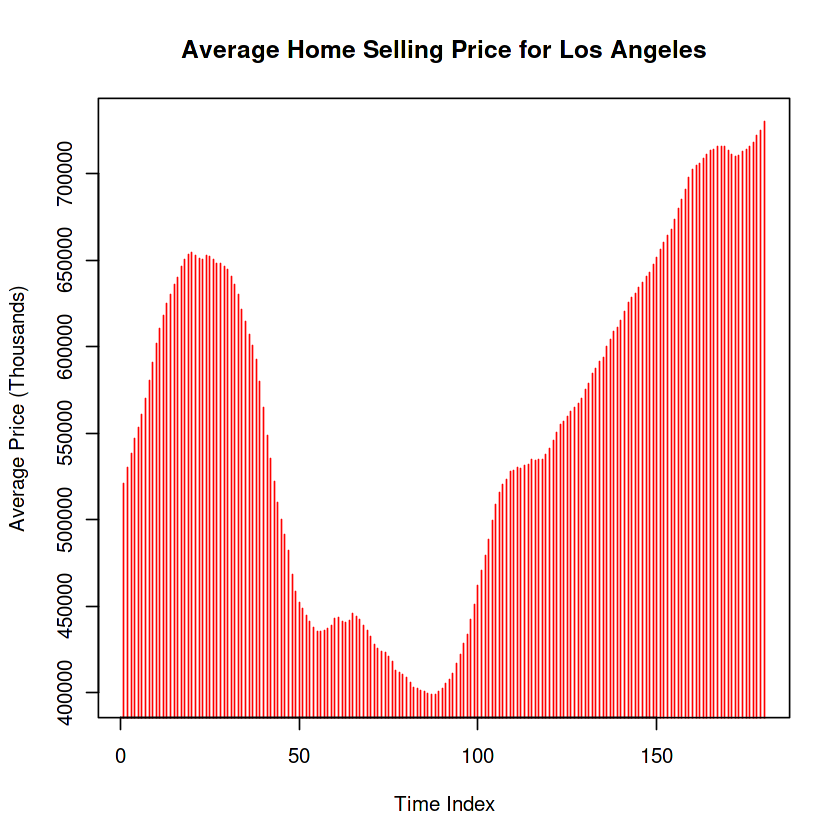

numeric(0)

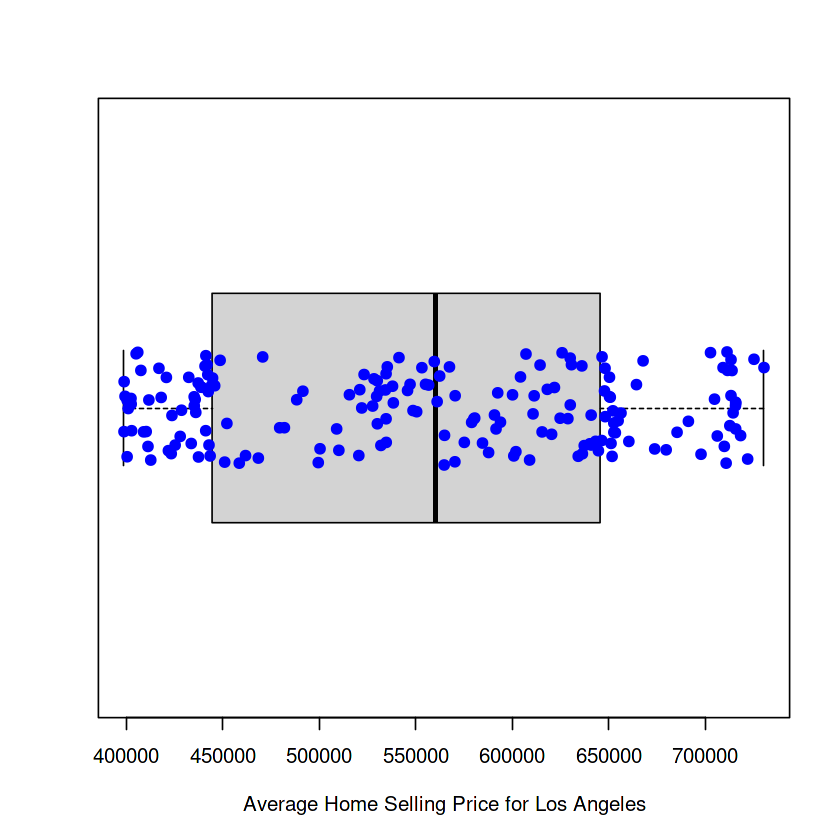

In [15]:
# Los Angeles
plot(datLA$AveragePrice, xlab = "Time Index", ylab = "Average Price (Thousands)", 
     main = "Average Home Selling Price for Los Angeles", type = "h", col = "red")
boxplot(datLA$AveragePrice, horizontal = T, xlab = "Average Home Selling Price for Los Angeles")$out
stripchart(datLA$AveragePrice, method = "jitter", pch = 19, add = TRUE, col = "blue")


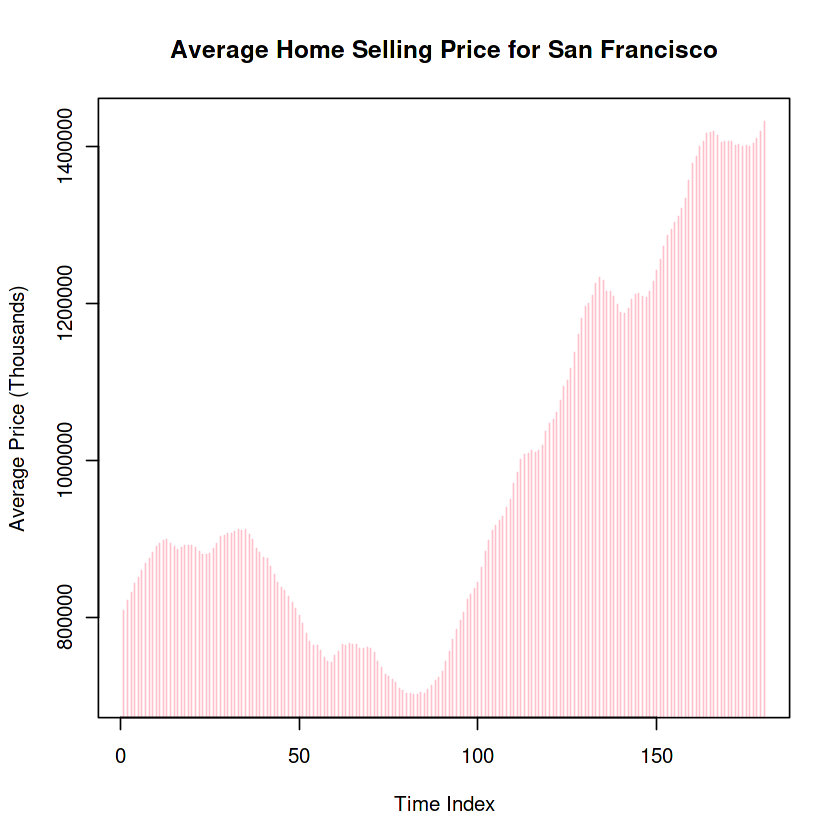

numeric(0)

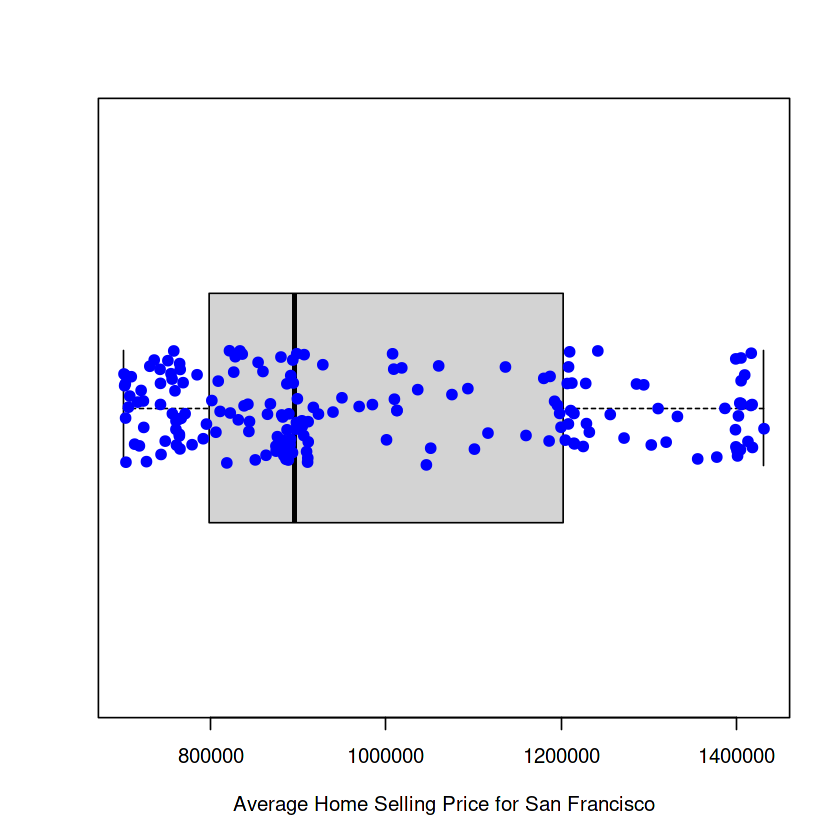

In [16]:
# San Francisco
plot(datSF$AveragePrice, xlab = "Time Index", ylab = "Average Price (Thousands)", 
     main = "Average Home Selling Price for San Francisco", type = "h", col = "pink")
boxplot(datSF$AveragePrice, horizontal = T, xlab = "Average Home Selling Price for San Francisco")$out
stripchart(datSF$AveragePrice, method = "jitter", pch = 19, add = TRUE, col = "blue")

Warning message in plot.xy(xy, type, ...):
“plot type 'solid' will be truncated to first character”


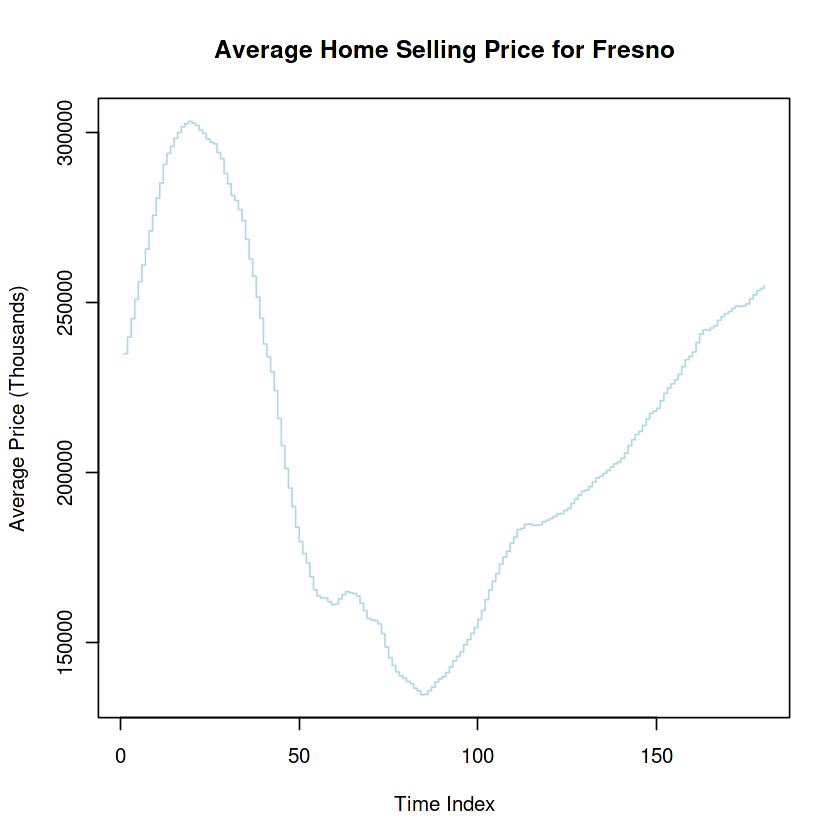

numeric(0)

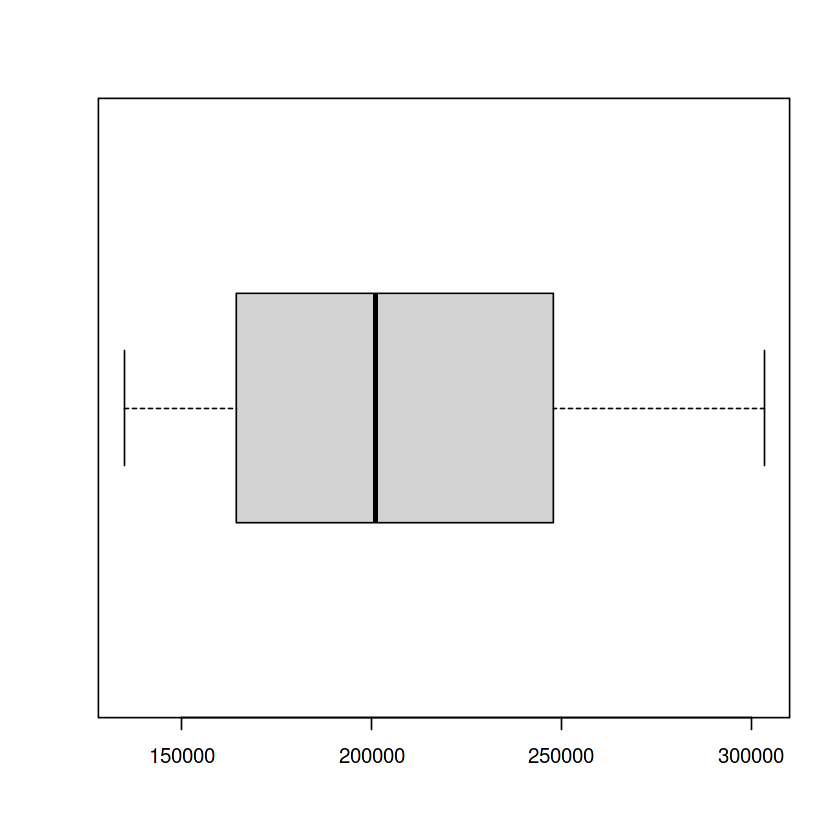

In [17]:
# Fresno
plot(datFRS$AveragePrice, xlab = "Time Index", ylab = "Average Price (Thousands)", 
     main = "Average Home Selling Price for Fresno", type = "solid", col = "lightblue")
boxplot(datFRS$AveragePrice, horizontal = T)$out

Warning message in plot.xy(xy, type, ...):
“plot type 'solid' will be truncated to first character”


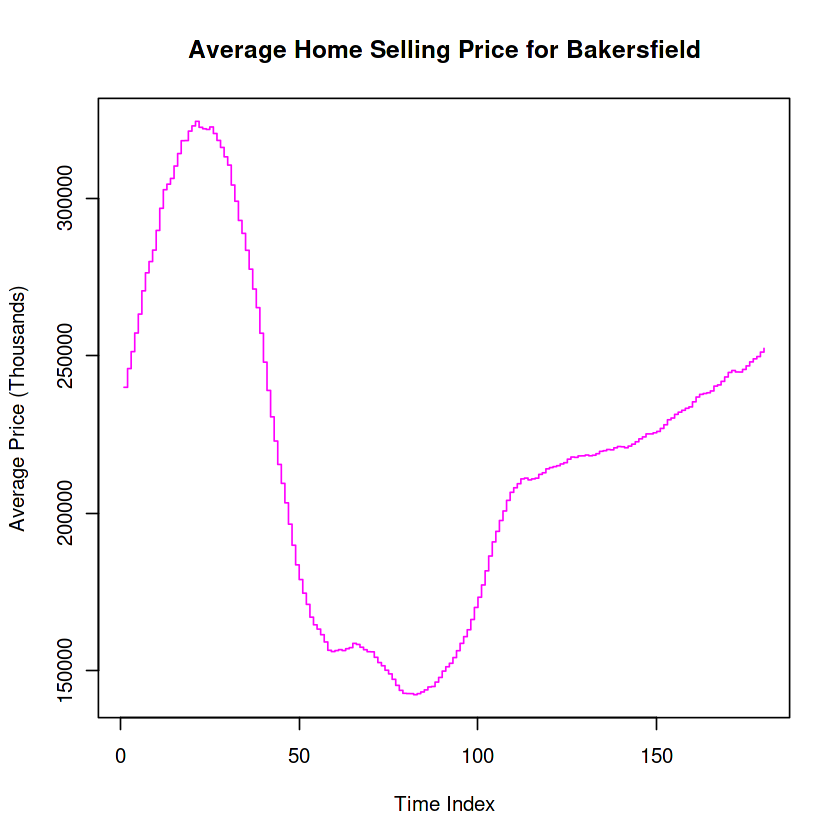

numeric(0)

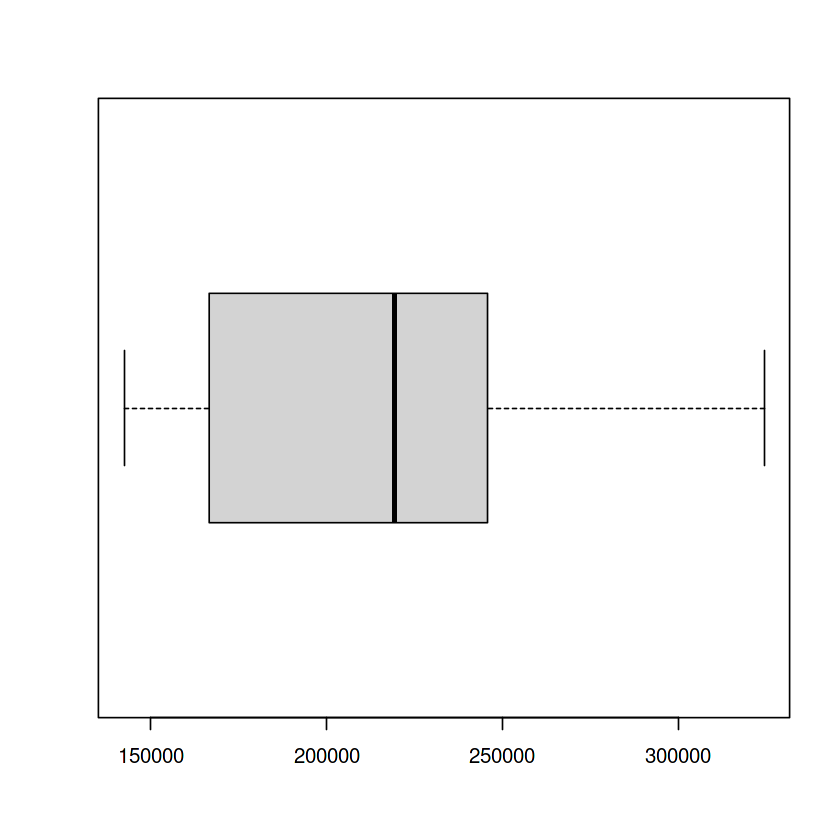

In [18]:
# Bakersfield
plot(datBKRS$AveragePrice, xlab = "Time Index", ylab = "Average Price (Thousands)", 
     main = "Average Home Selling Price for Bakersfield", type = "solid", col = "magenta")
boxplot(datBKRS$AveragePrice, horizontal = T)$out

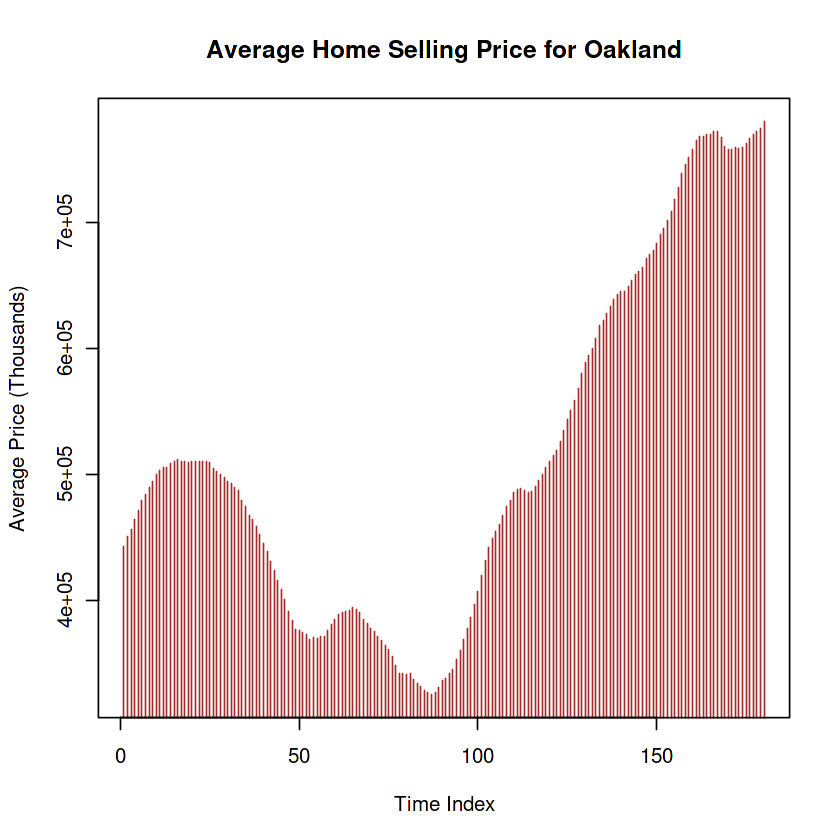

numeric(0)

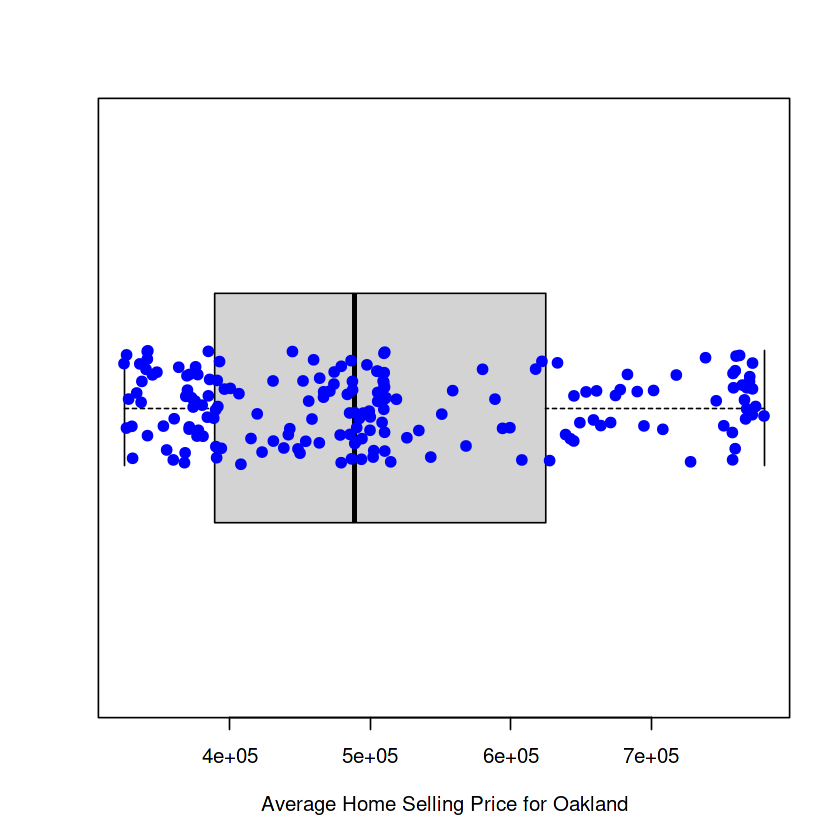

In [19]:
# Oakland
plot(datOK$AveragePrice, xlab = "Time Index", ylab = "Average Price (Thousands)", 
     main = "Average Home Selling Price for Oakland", type = "h", col = "brown")
boxplot(datOK$AveragePrice, horizontal = T, xlab = "Average Home Selling Price for Oakland")$out
stripchart(datOK$AveragePrice, method = "jitter", pch = 19, add = TRUE, col = "blue")

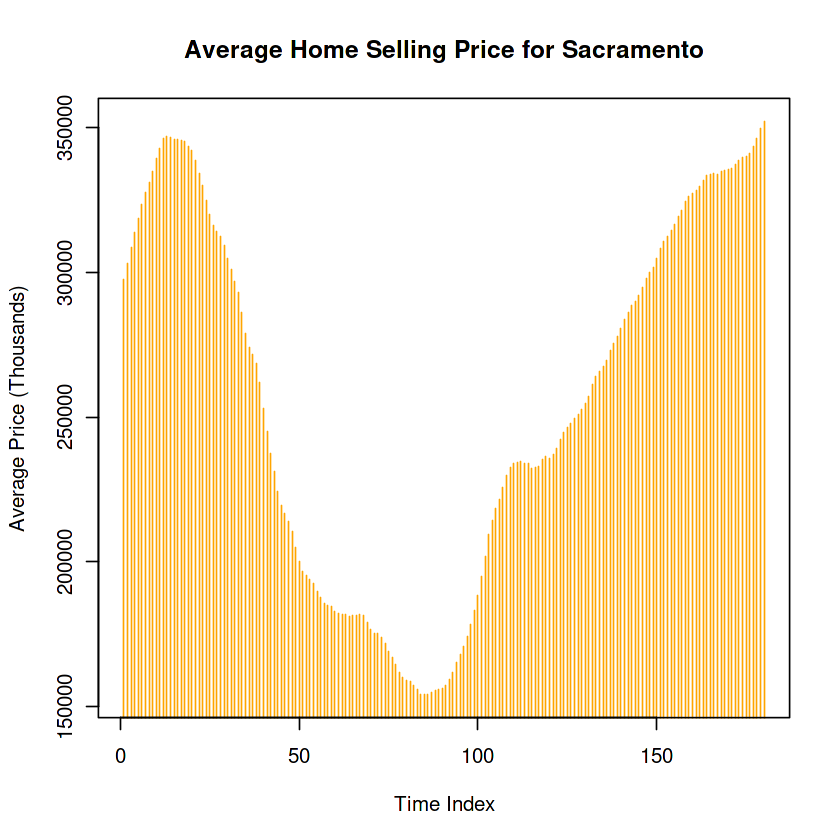

numeric(0)

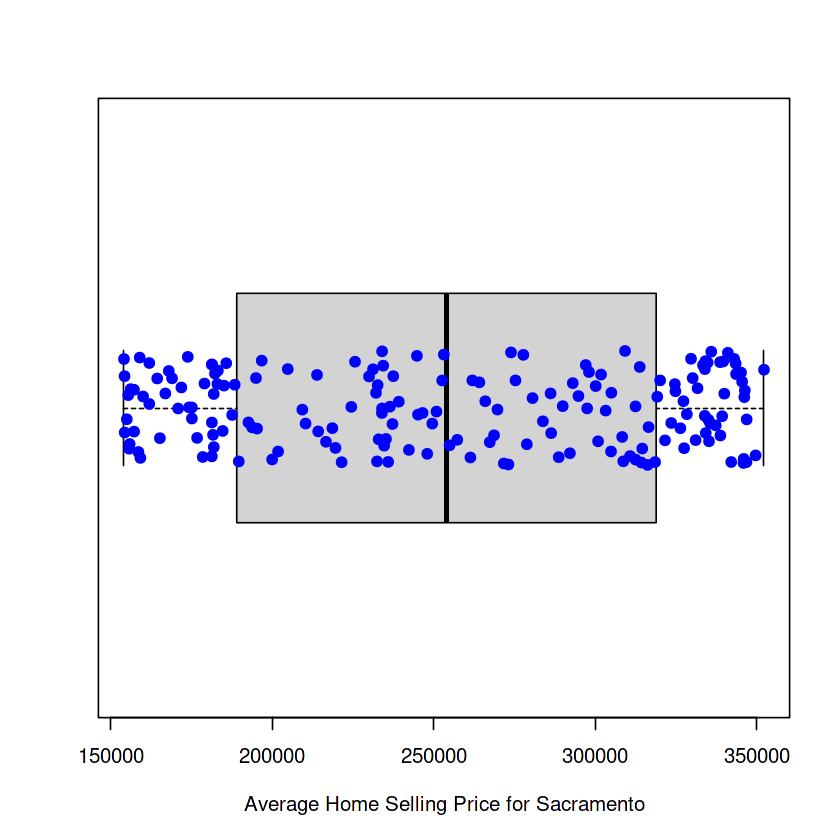

In [20]:
# Sacramento
plot(datSAC$AveragePrice, xlab = "Time Index", ylab = "Average Price (Thousands)", 
     main = "Average Home Selling Price for Sacramento", type = "h", col = "orange")
boxplot(datSAC$AveragePrice, horizontal = T, xlab = "Average Home Selling Price for Sacramento")$out
stripchart(datSAC$AveragePrice, method = "jitter", pch = 19, add = TRUE, col = "blue")

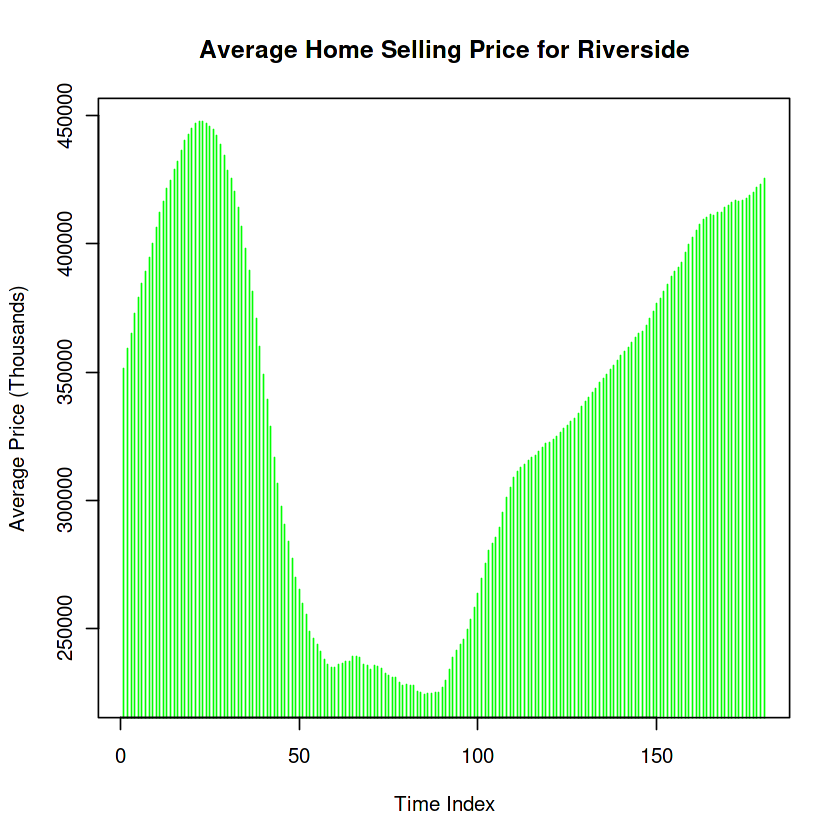

numeric(0)

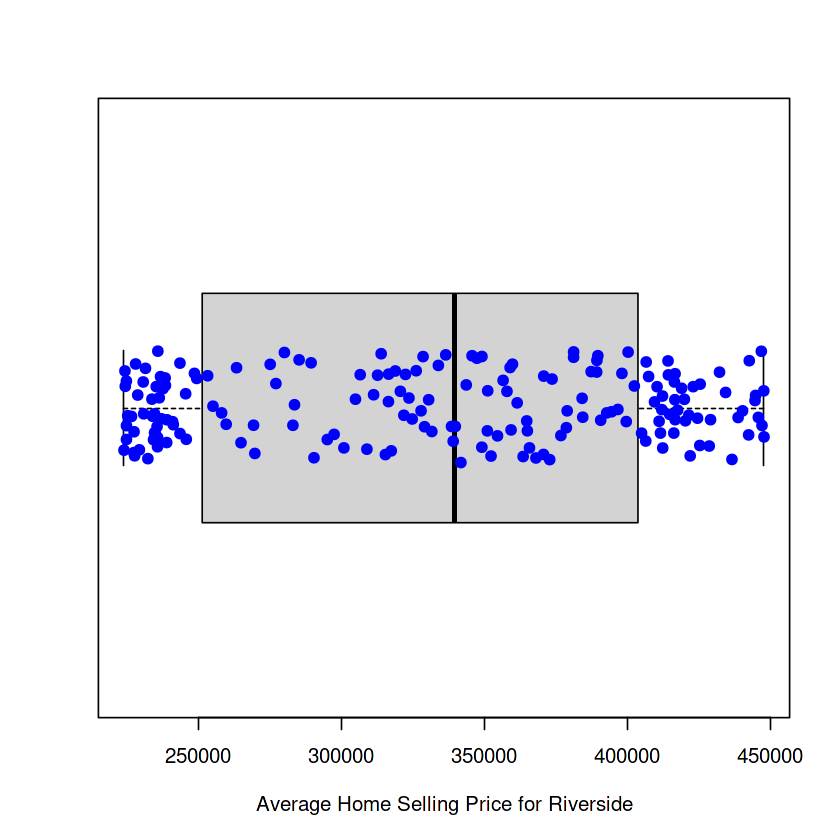

In [21]:
# Riverside
plot(datRV$AveragePrice, xlab = "Time Index", ylab = "Average Price (Thousands)", 
     main = "Average Home Selling Price for Riverside", type = "h", col = "green")
boxplot(datRV$AveragePrice, horizontal = T, xlab = "Average Home Selling Price for Riverside")$out
stripchart(datRV$AveragePrice, method = "jitter", pch = 19, add = TRUE, col = "blue")

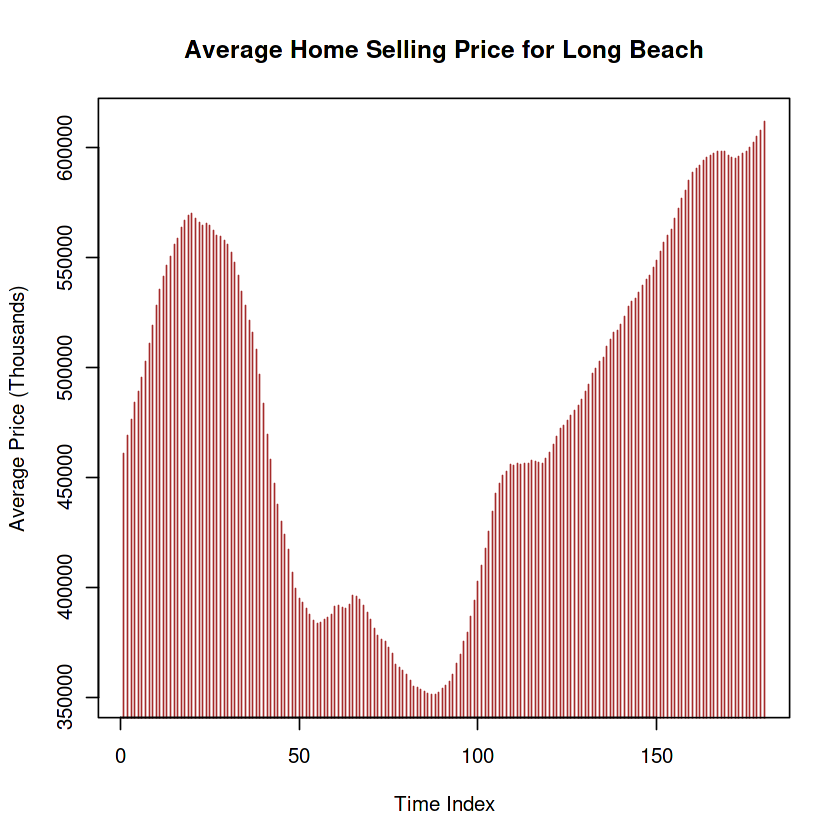

numeric(0)

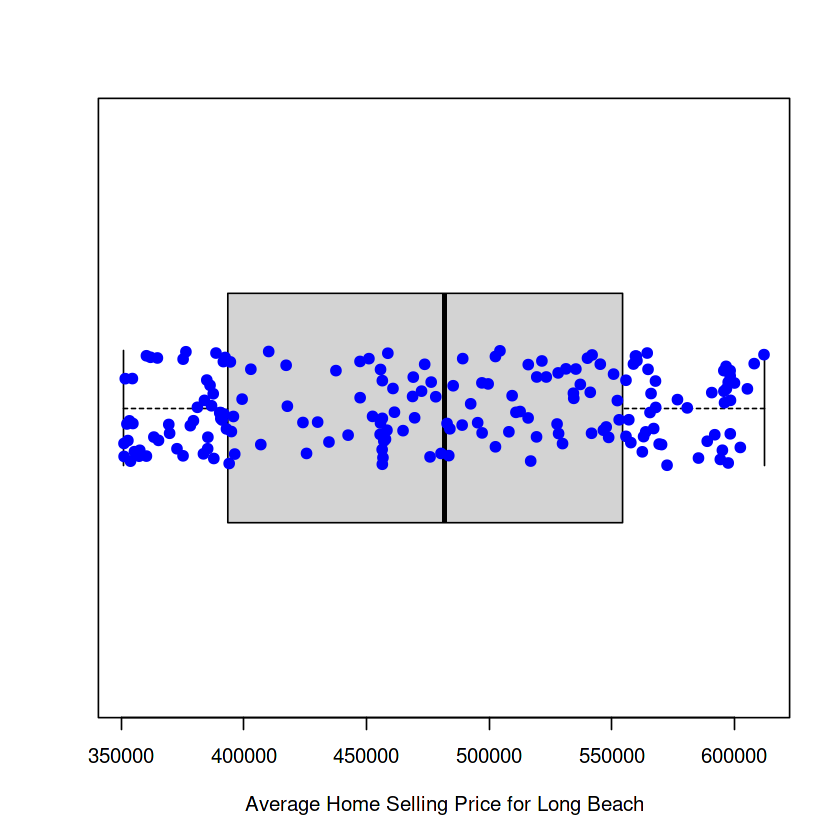

In [22]:
# Long Beach
plot(datLB$AveragePrice, xlab = "Time Index", ylab = "Average Price (Thousands)", 
     main = "Average Home Selling Price for Long Beach", type = "h", col = "brown")
boxplot(datLB$AveragePrice, horizontal = T, xlab = "Average Home Selling Price for Long Beach")$out
stripchart(datLB$AveragePrice, method = "jitter", pch = 19, add = TRUE, col = "blue")

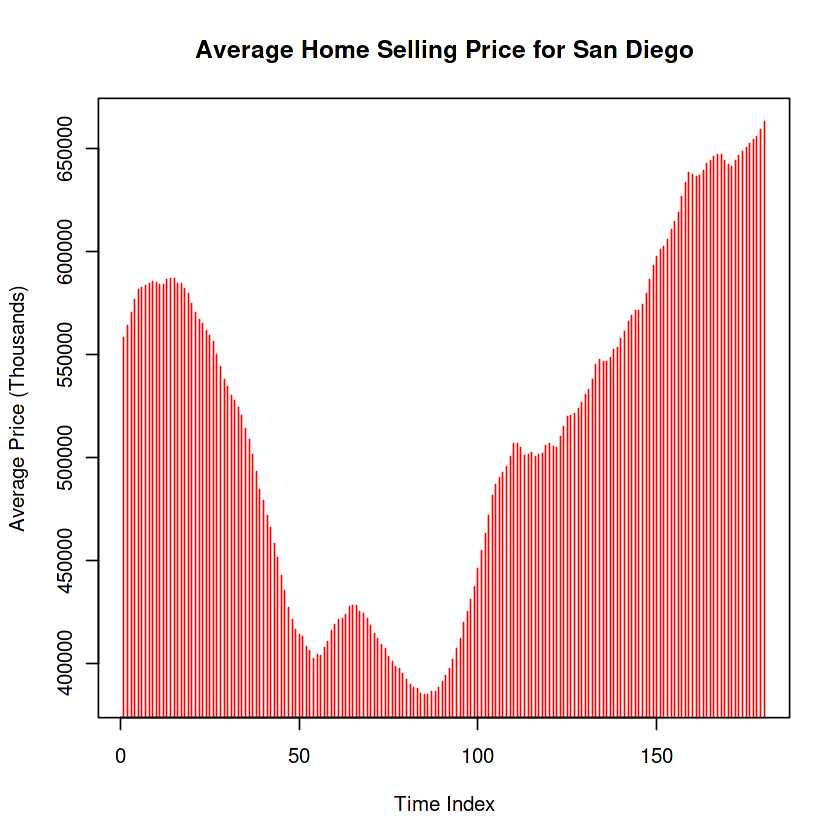

numeric(0)

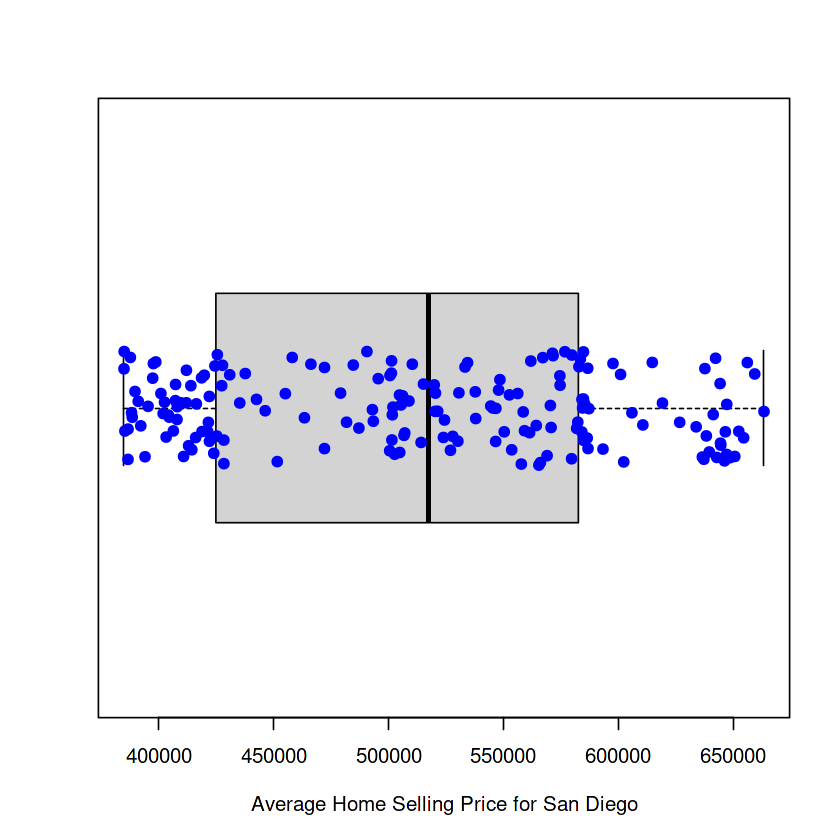

In [23]:
# San Diego
plot(datSD$AveragePrice, xlab = "Time Index", ylab = "Average Price (Thousands)", 
     main = "Average Home Selling Price for San Diego", type = "h", col = "red")
boxplot(datSD$AveragePrice, horizontal = T, xlab = "Average Home Selling Price for San Diego")$out
stripchart(datSD$AveragePrice, method = "jitter", pch = 19, add = TRUE, col = "blue")

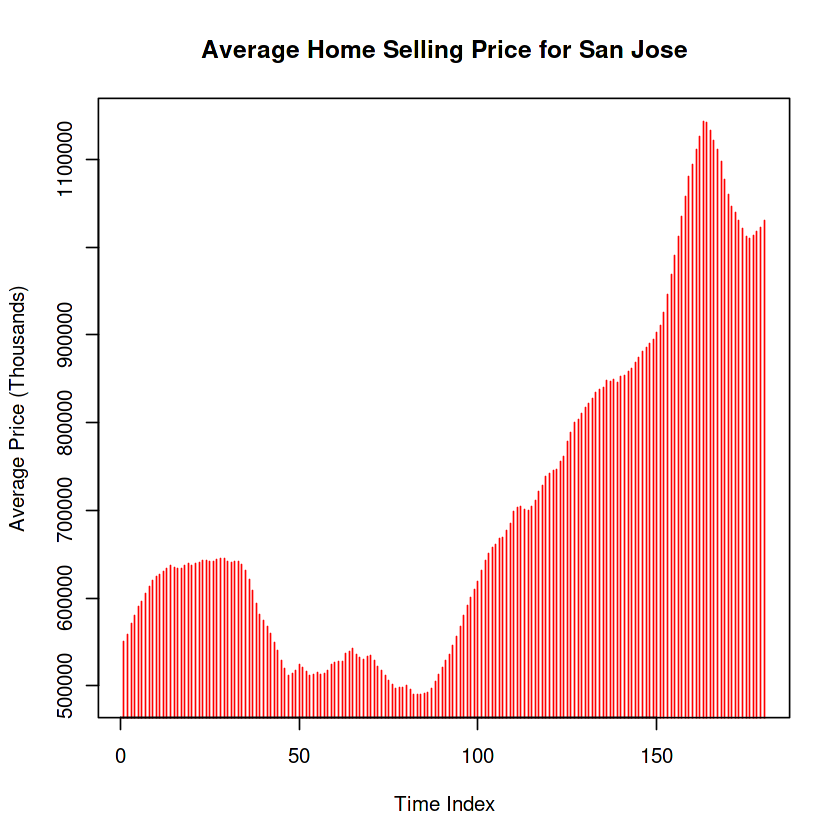

numeric(0)

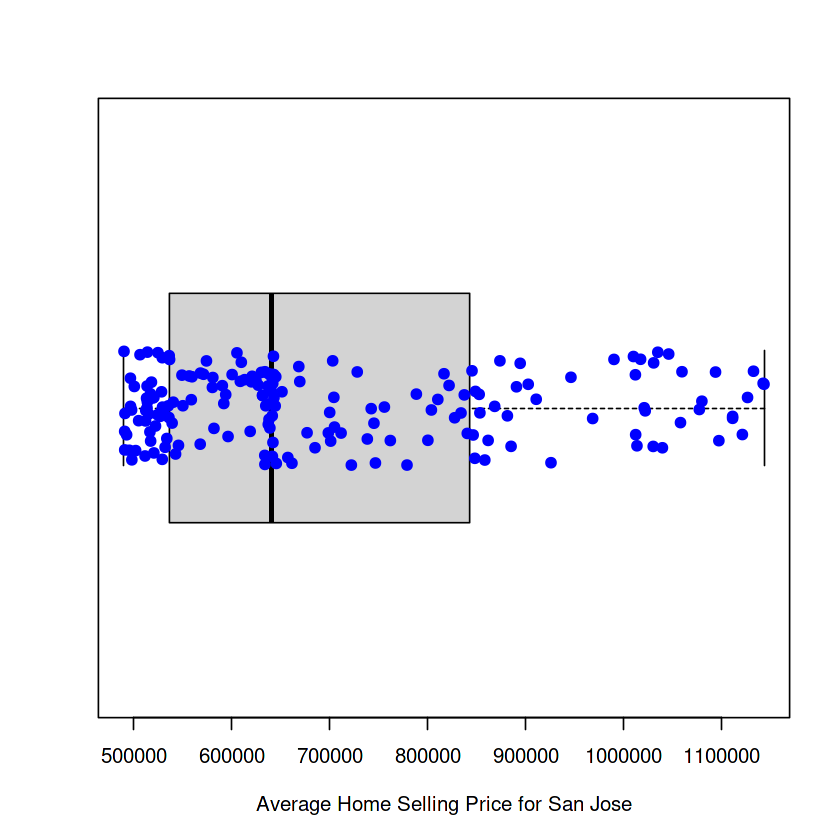

In [24]:
# San Jose
plot(datSJ$AveragePrice, xlab = "Time Index", ylab = "Average Price (Thousands)", 
     main = "Average Home Selling Price for San Jose", type = "h", col = "red")
boxplot(datSJ$AveragePrice, horizontal = T, xlab = "Average Home Selling Price for San Jose")$out
stripchart(datSJ$AveragePrice, method = "jitter", pch = 19, add = TRUE, col = "blue")

# Data Decomposition for Each INDIVIDUAL Region

In [25]:
# install.packages("fpp2")
library(fpp2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

✔ forecast  8.16     ✔ expsmooth 2.3 
✔ fma       2.4      





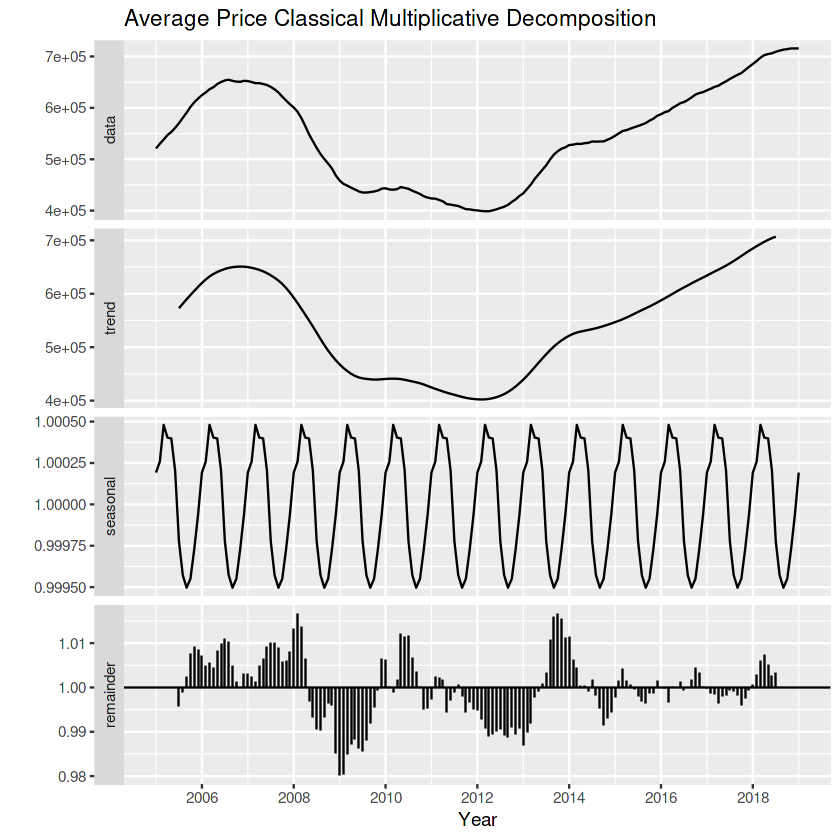

In [26]:
# Los Angeles
datLAts.mult.decomp <- decompose(datLAts2, type = "multiplicative")
autoplot(datLAts.mult.decomp) +
  ggtitle("Average Price Classical Multiplicative Decomposition") + 
  xlab("Year")

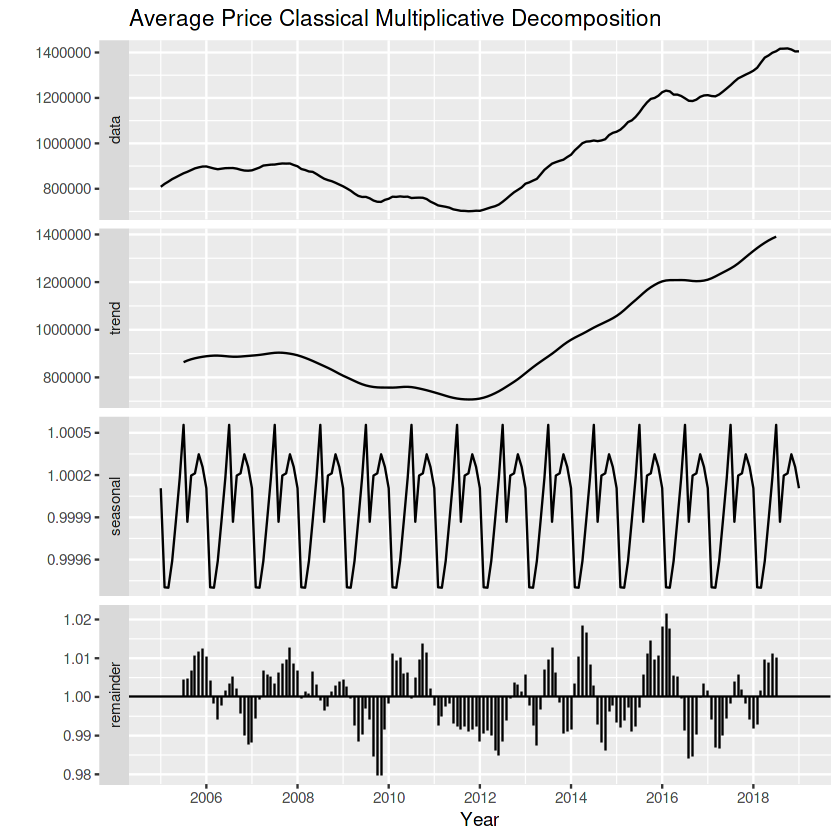

In [27]:
# San Francisco
datSFts.mult.decomp <- decompose(datSFts2, type = "multiplicative")
autoplot(datSFts.mult.decomp) +
  ggtitle("Average Price Classical Multiplicative Decomposition") + 
  xlab("Year")

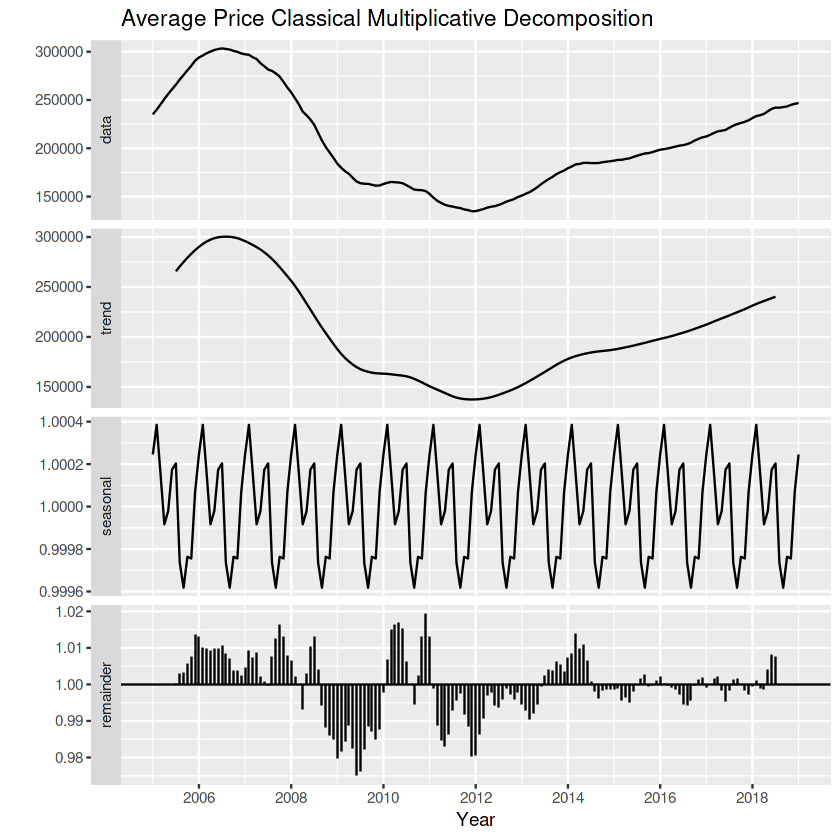

In [28]:
# Fresno
datFRSts.mult.decomp <- decompose(datFRS2, type = "multiplicative")
autoplot(datFRSts.mult.decomp) +
  ggtitle("Average Price Classical Multiplicative Decomposition") + 
  xlab("Year")

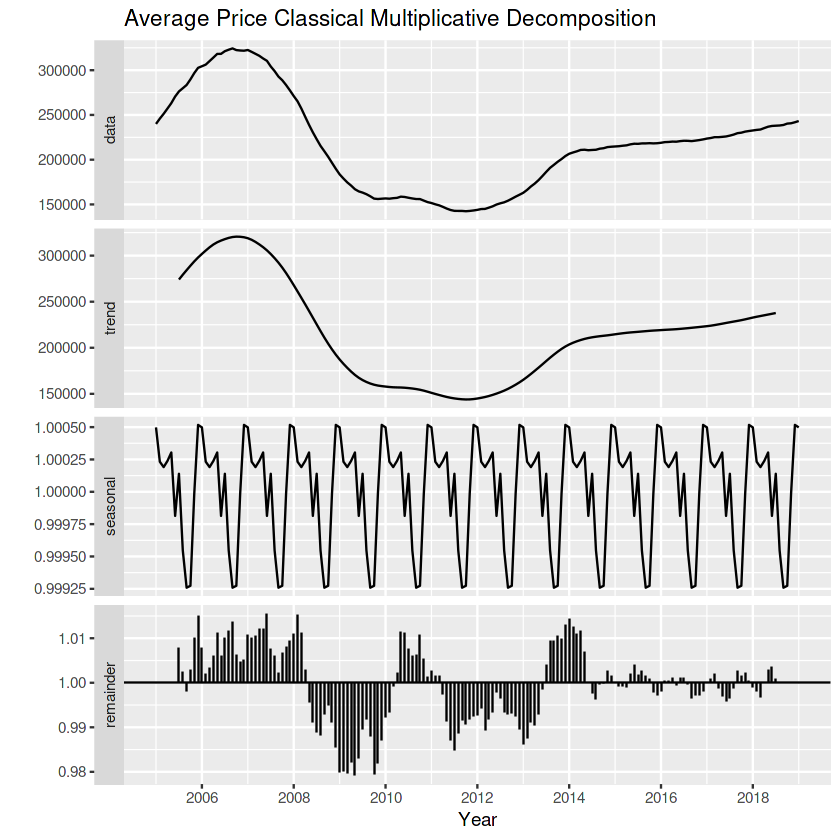

In [29]:
# Bakersfield
datBKRSts.mult.decomp <- decompose(datBKRS2, type = "multiplicative")
autoplot(datBKRSts.mult.decomp) +
  ggtitle("Average Price Classical Multiplicative Decomposition") + 
  xlab("Year")

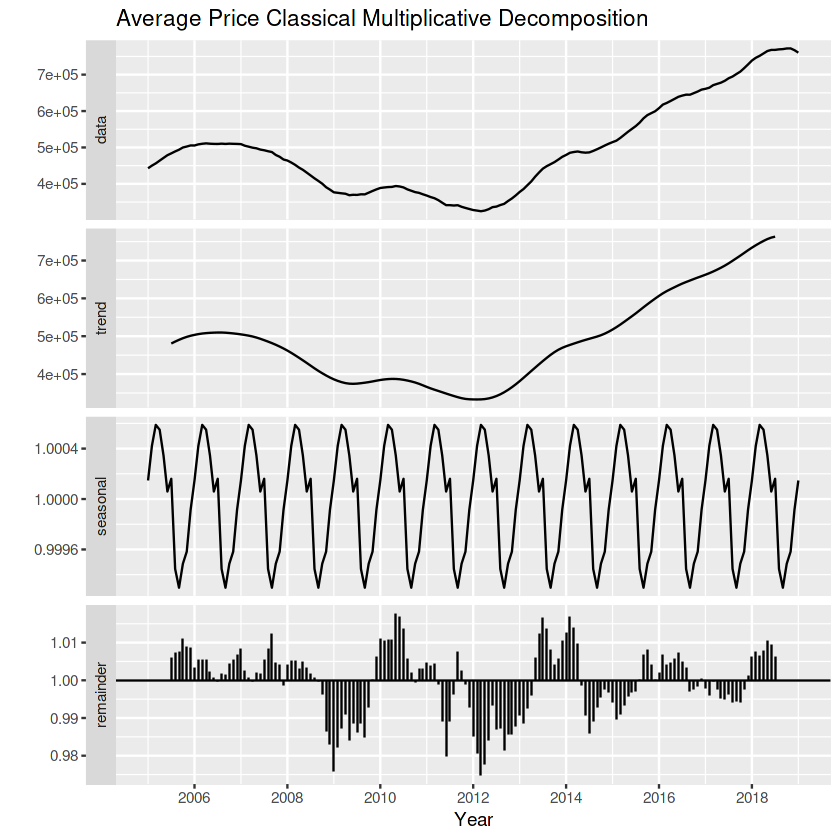

In [30]:
# Oakland
datOKts.mult.decomp <- decompose(datOKts2, type = "multiplicative")
autoplot(datOKts.mult.decomp) +
  ggtitle("Average Price Classical Multiplicative Decomposition") + 
  xlab("Year")

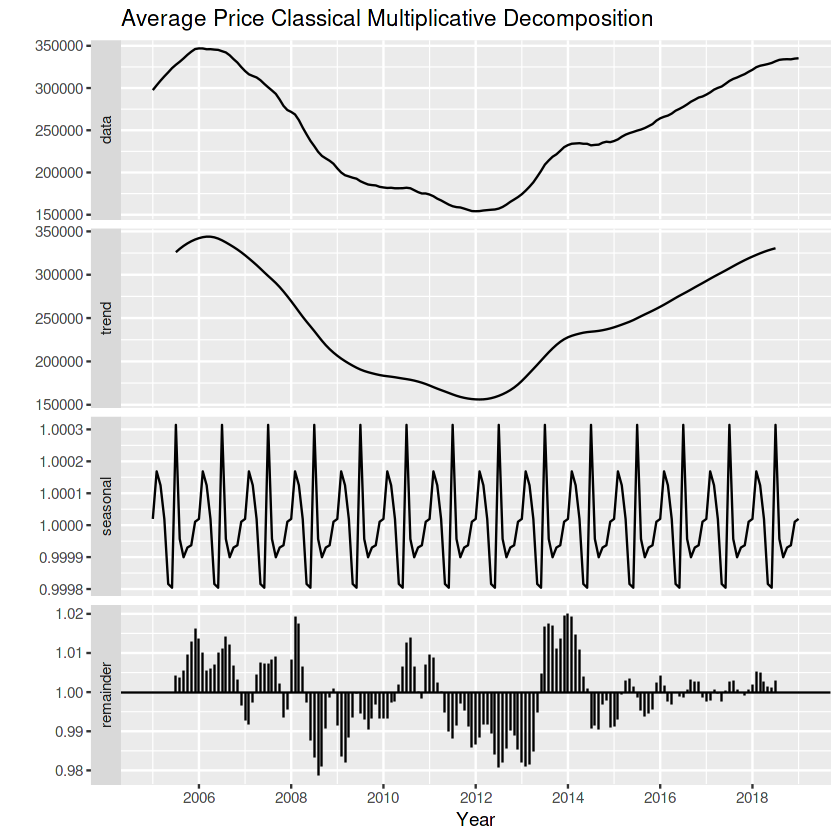

In [31]:
# Sacramento
datSACts.mult.decomp <- decompose(datSACts2, type = "multiplicative")
autoplot(datSACts.mult.decomp) +
  ggtitle("Average Price Classical Multiplicative Decomposition") + 
  xlab("Year")

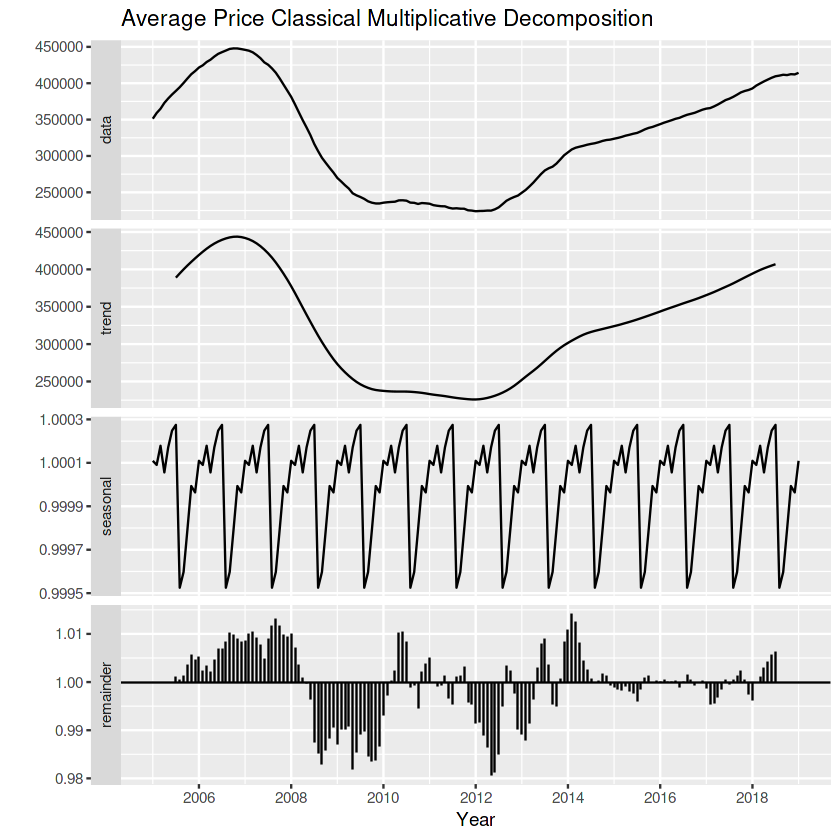

In [32]:
# Riverside
datRVts.mult.decomp <- decompose(datRVts2, type = "multiplicative")
autoplot(datRVts.mult.decomp) +
  ggtitle("Average Price Classical Multiplicative Decomposition") + 
  xlab("Year")

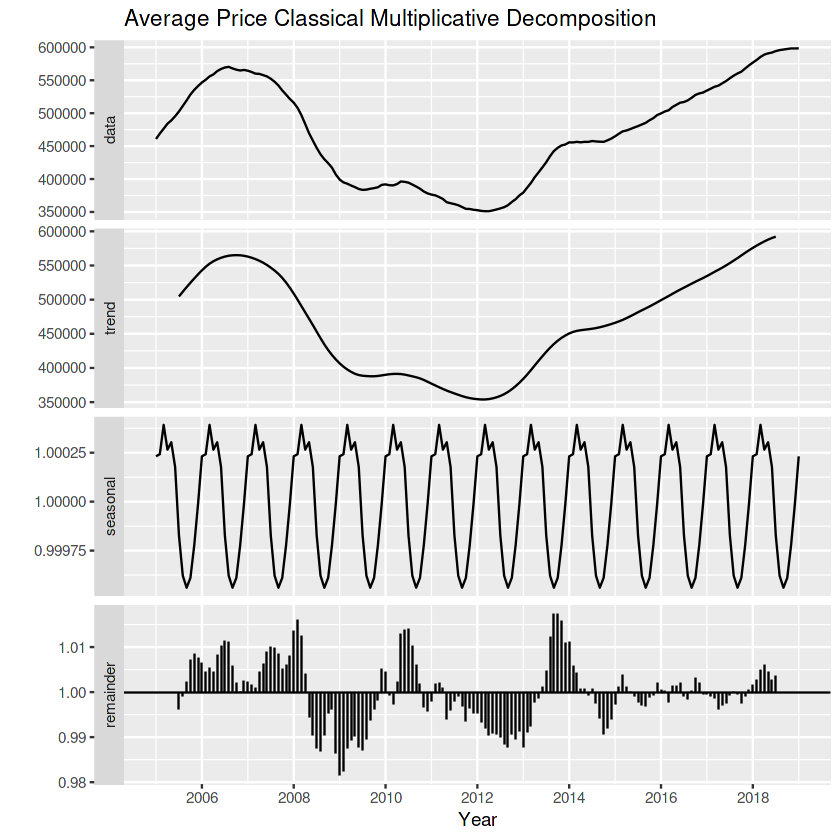

In [33]:
# Long Beach
datLBts.mult.decomp <- decompose(datLBts2, type = "multiplicative")
autoplot(datLBts.mult.decomp) +
  ggtitle("Average Price Classical Multiplicative Decomposition") + 
  xlab("Year")

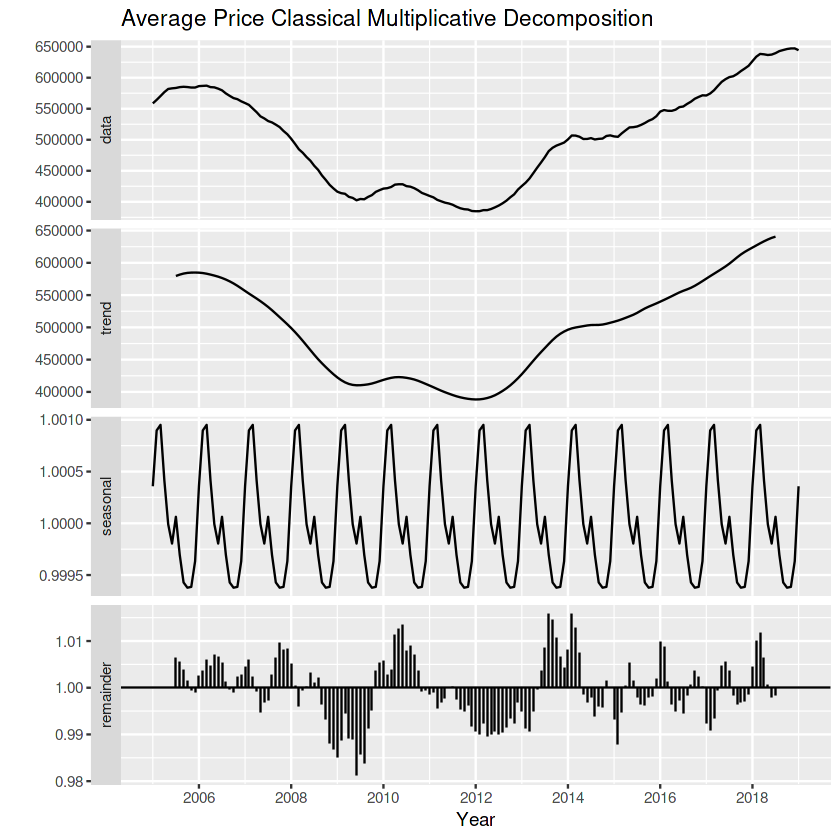

In [34]:
# San Diego
datSDts.mult.decomp <- decompose(datSDts2, type = "multiplicative")
autoplot(datSDts.mult.decomp) +
  ggtitle("Average Price Classical Multiplicative Decomposition") + 
  xlab("Year")

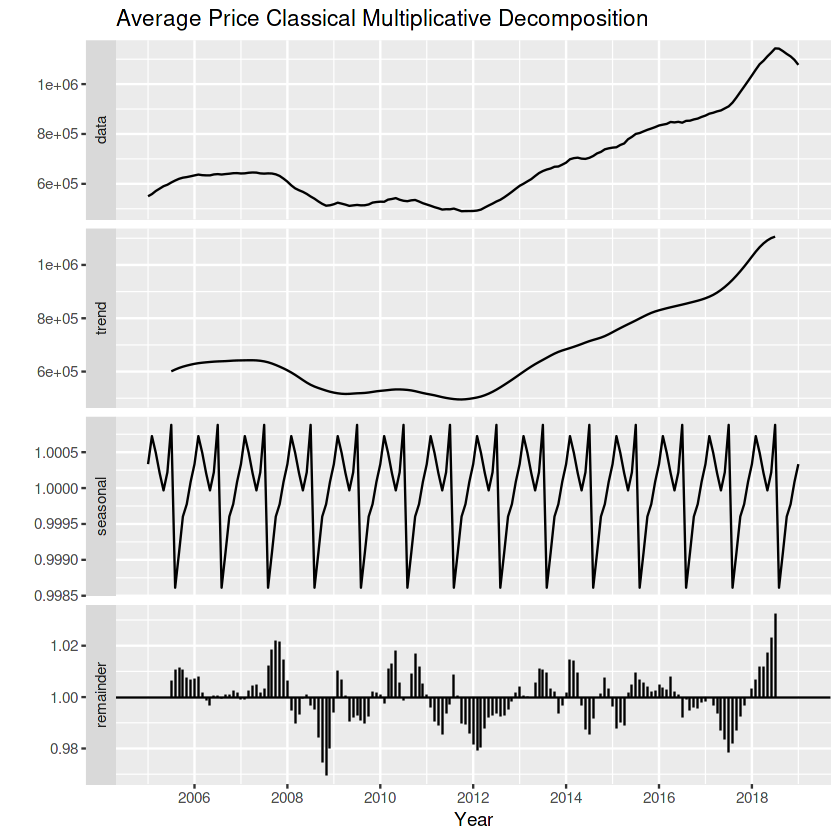

In [35]:
# San Jose
datSJts.mult.decomp <- decompose(datSJts2, type = "multiplicative")
autoplot(datSJts.mult.decomp) +
  ggtitle("Average Price Classical Multiplicative Decomposition") + 
  xlab("Year")

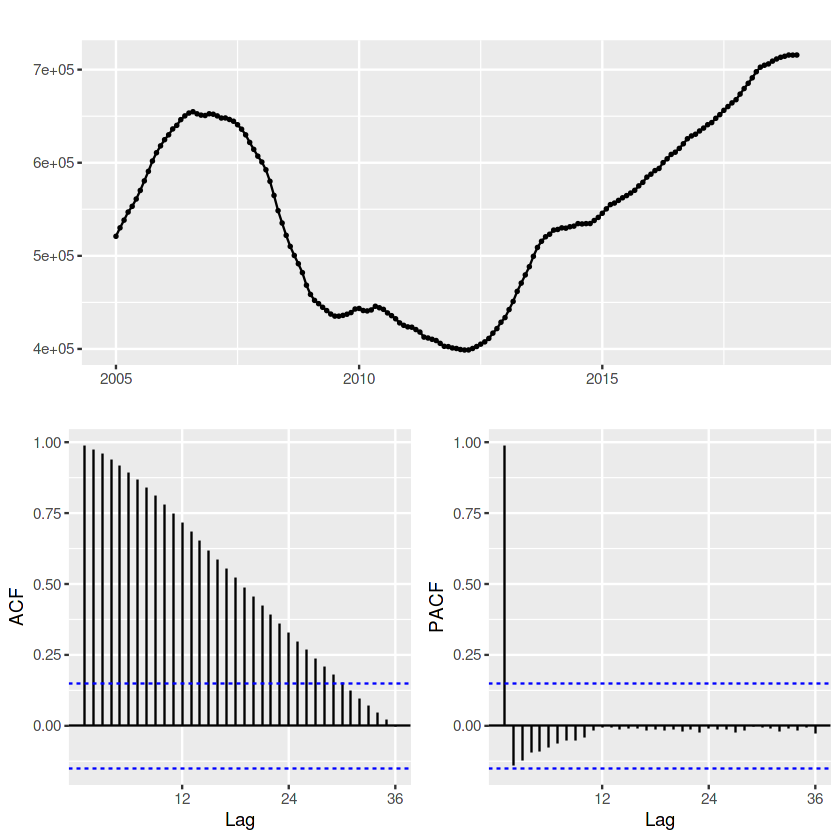

In [36]:
# Los Angeles Autocorrelation Check
ggtsdisplay(datLAts2)

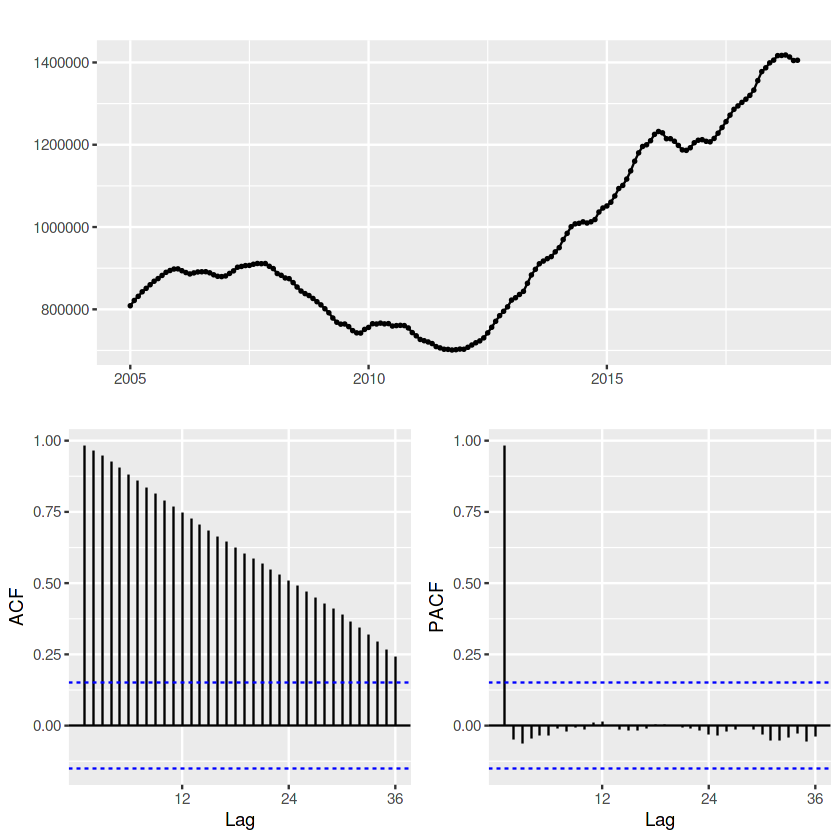

In [37]:
# San Francisco Autocorrelation Check
ggtsdisplay(datSFts2)

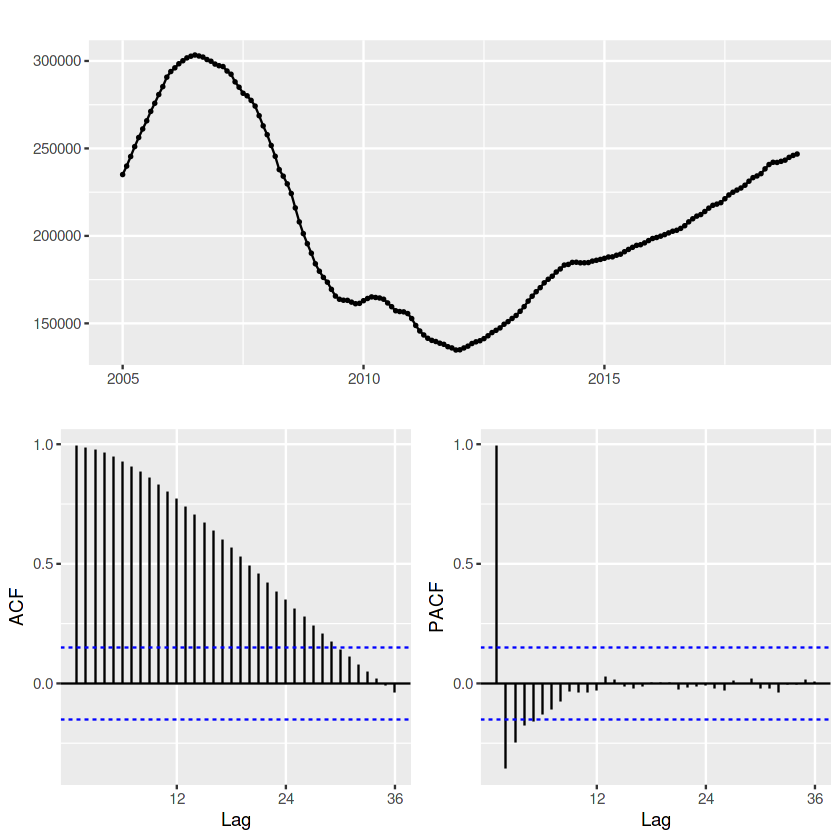

In [38]:
# Fresno Autocorrelation Check
ggtsdisplay(datFRS2)

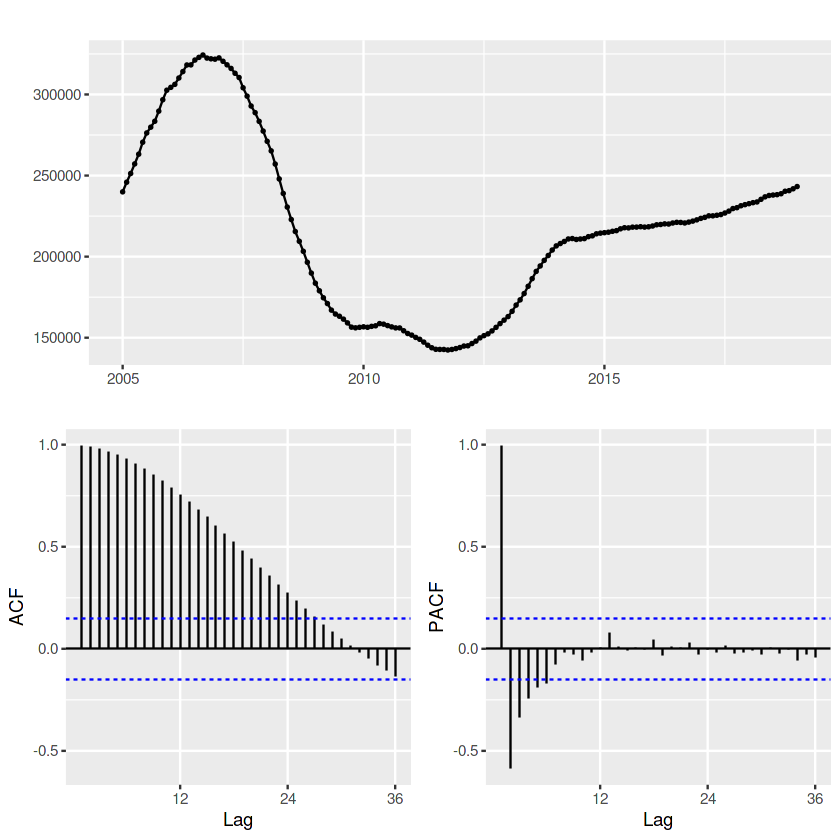

In [39]:
# Bakersfield Autocorrelation Check
ggtsdisplay(datBKRS2)

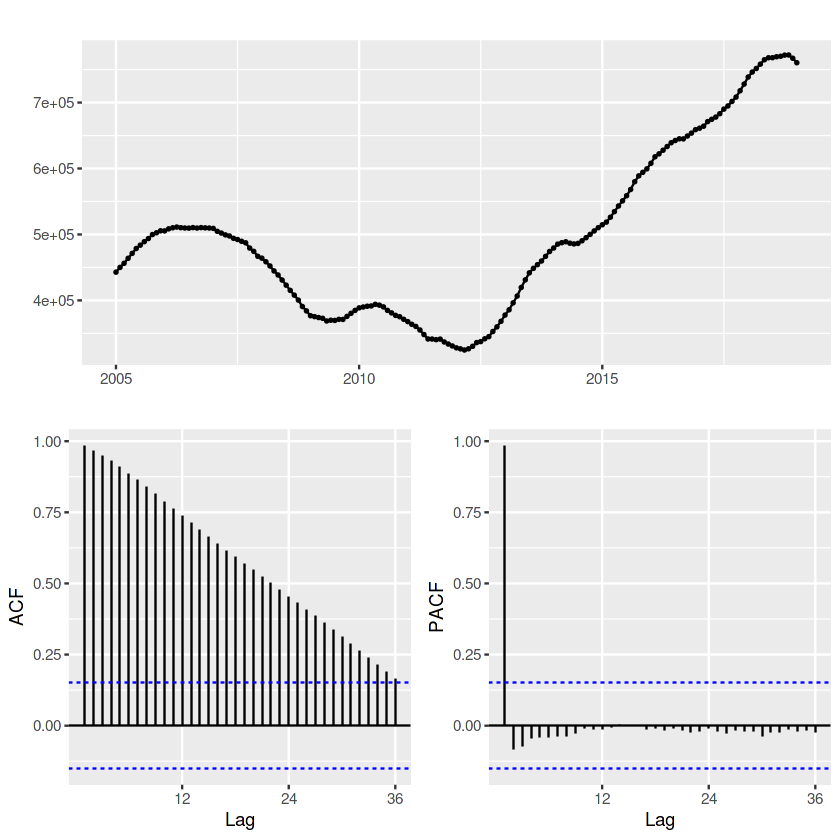

In [40]:
# Oakland Autocorrelation Check
ggtsdisplay(datOKts2)

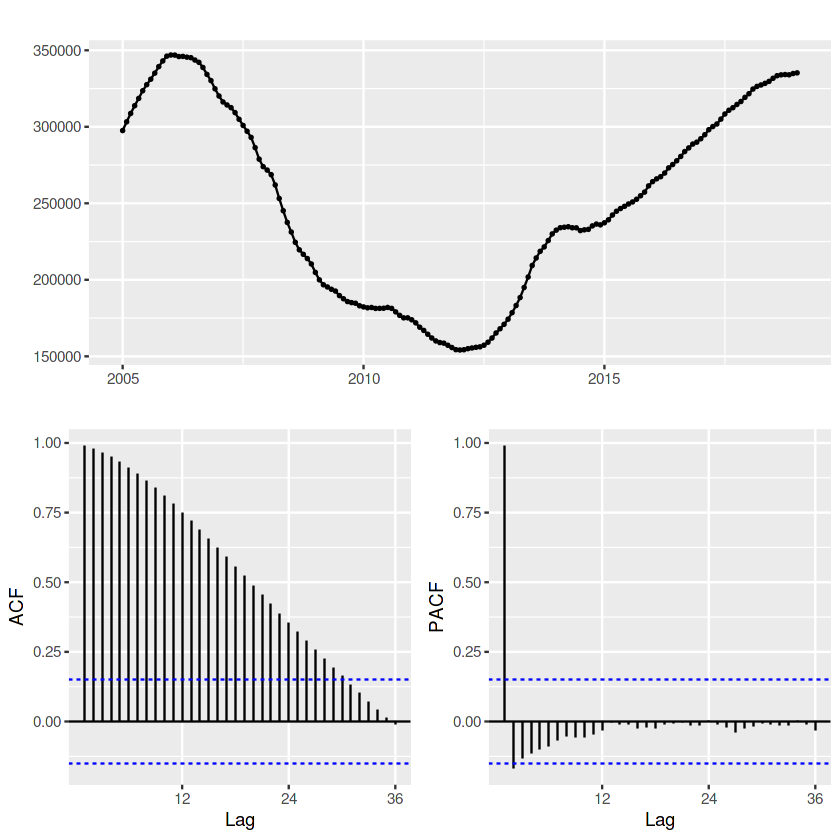

In [41]:
# Sacramento Autocorrelation Check
ggtsdisplay(datSACts2)

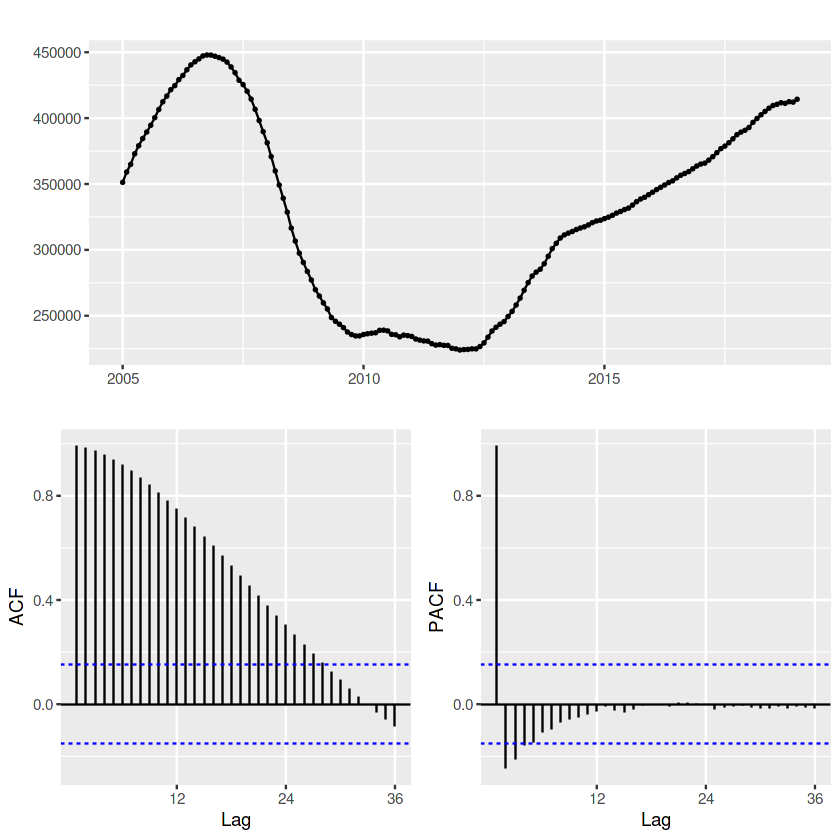

In [42]:
# Riverside Autocorrelation Check
ggtsdisplay(datRVts2)

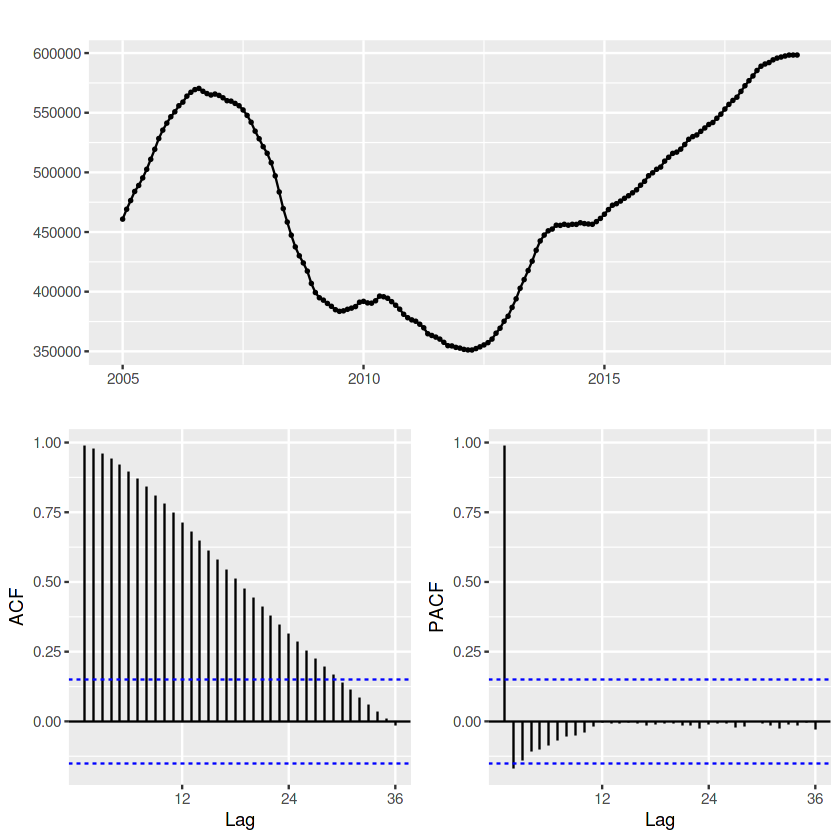

In [43]:
# Long Beach Autocorrelation Check
ggtsdisplay(datLBts2)

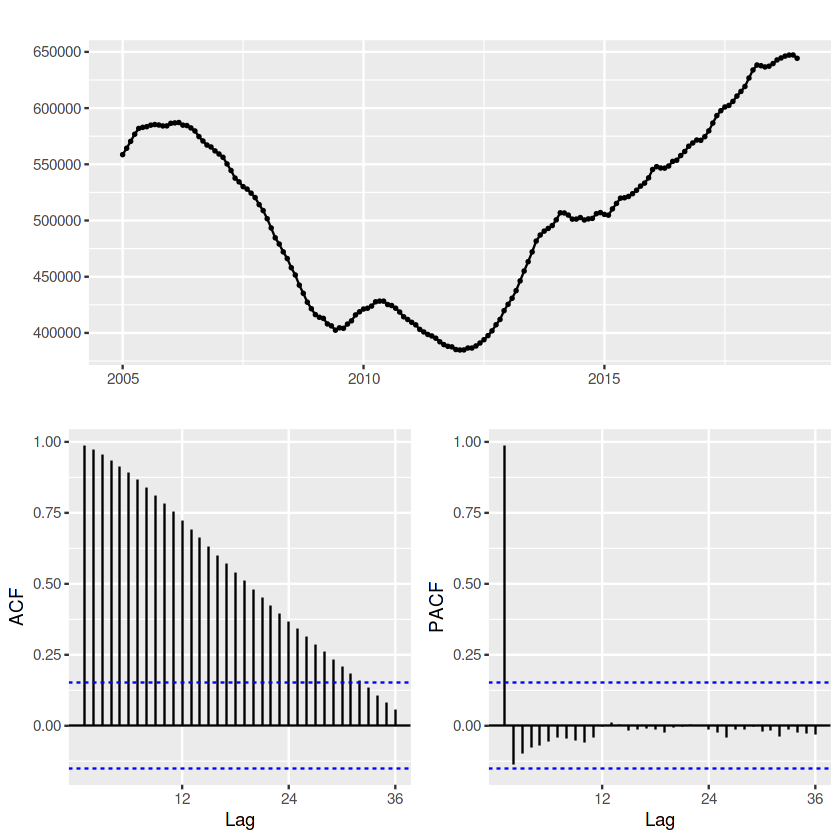

In [44]:
# San Diego Autocorrelation Check
ggtsdisplay(datSDts2)

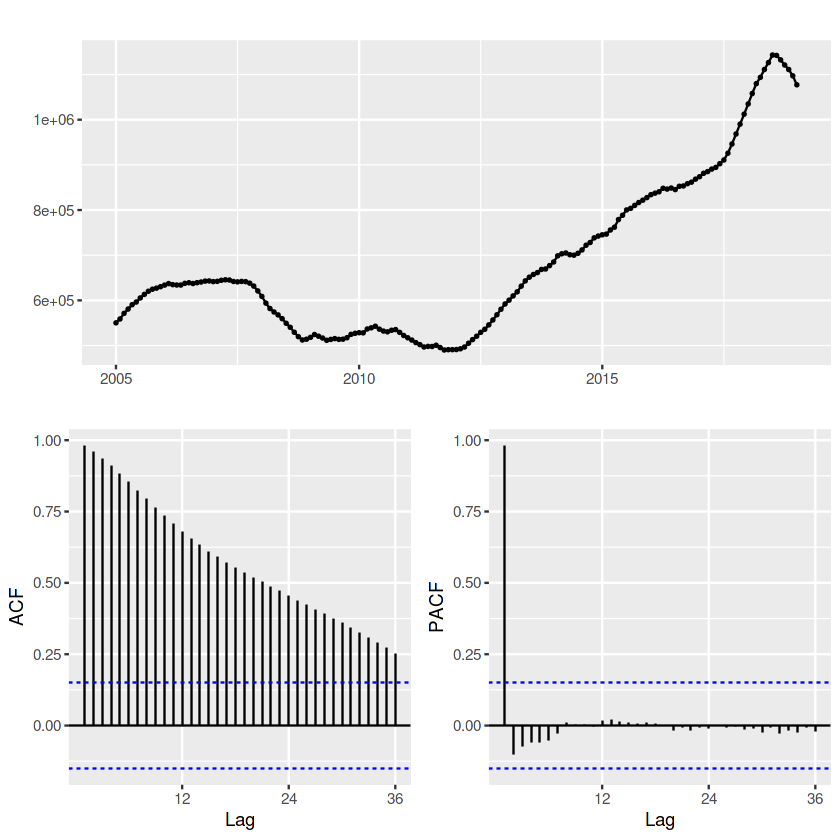

In [45]:
# San Jose Autocorrelation Check
ggtsdisplay(datSJts2)

# Fitting & Testing Data to Models

**Models for Los Angeles: All-In Regression, Step-Wise Regression, Self-Selected 'Optimal' Regression, Seasonal Regression,ARIMA**

In [46]:
# All-in model for LA:
str(datLA)
reg.LA.all <- lm(AveragePrice ~ .-Date, data = datLA)
summary(reg.LA.all)

'data.frame':	180 obs. of  16 variables:
 $ AveragePrice                               : int  520987 530077 538362 547026 553155 561053 570253 580514 590751 601842 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Population                                 : int  3769131 3769131 3769131 3769131 3769131 3769131 3769131 3769131 3769131 3769131 ...
 $ Employment                                 : int  4446300 4491600 4499300 4538300 4521900 4512100 4534300 4545700 4555500 4581100 ...
 $ Unemployment                               : int  286100 282200 262900 249300 243300 253900 271000 249300 244100 234700 ...
 $ UnemploymentRate                           : num  6 5.9 5.5 5.2 5.1 5.3 5.6 5.2 5.1 4.9 ...
 $ HouseholdIncome                            : int  63316 63316 63316 63316 63316 63316 63316 63316 63316 63316 ...
 $ 10YearBondRate                    


Call:
lm(formula = AveragePrice ~ . - Date, data = datLA)

Residuals:
   Min     1Q Median     3Q    Max 
-39762  -8176   2043   9335  26877 

Coefficients: (2 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                  4.757e+06  9.958e+05   4.777
PoliticalParty                                      NA         NA      NA
Population                                   1.144e-01  8.605e-02   1.330
Employment                                   3.246e-02  5.995e-02   0.541
Unemployment                                 4.446e-01  5.735e-01   0.775
UnemploymentRate                            -4.573e+04  3.019e+04  -1.515
HouseholdIncome                              1.105e+01  9.429e-01  11.717
`10YearBondRate`                             4.262e+04  5.258e+03   8.107
`30YearFixedMortgageRate`                   -1.801e+04  6.488e+03  -2.775
ViolentCrimesRate                           -1.122e+02  3.355

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2  linear dependencies found”


Reordering variables and trying again:


[1] 0.8749755 0.9356803 0.9441166 0.9607707 0.9711021 0.9734538 0.9754518
 [8] 0.9776504 0.9793794 0.9805633 0.9816360 0.9824747 0.9831393 0.9834848
[15] 0.9837707 0.9839270

(Intercept) PoliticalParty Population Employment Unemployment
1  TRUE        FALSE          FALSE      FALSE      FALSE       
2  TRUE        FALSE          FALSE      FALSE      FALSE       
3  TRUE        FALSE          FALSE      FALSE      FALSE       
4  TRUE        FALSE          FALSE      FALSE      FALSE       
5  TRUE        FALSE          FALSE      FALSE      FALSE       
6  TRUE        FALSE          FALSE      FALSE      FALSE       
7  TRUE        FALSE          FALSE      FALSE      FALSE       
8  TRUE        FALSE          FALSE      FALSE      FALSE       
9  TRUE        FALSE          FALSE      FALSE      FALSE       
10 TRUE        FALSE          FALSE      FALSE      FALSE       
11 TRUE        FALSE          FALSE      FALSE      FALSE       
12 TRUE        FALSE          FALSE      FALSE       TRUE       
13 TRUE        FALSE          FALSE      FALSE       TRUE       
14 TRUE        FALSE           TRUE      FALSE       TRUE       
15 TRUE        FALSE           TRUE      FALSE       TRUE       
16 TRUE        FALSE           TRUE      FALSE       TRUE       
   UnemploymentRate HouseholdIncome `10YearBondRate` `30YearFixedMortgageRate`
1  TRUE             FALSE           FALSE            FALSE                    
2  TRUE              TRUE           FALSE            FALSE                    
3  TRUE              TRUE           FALSE            FALSE                    
4  TRUE              TRUE            TRUE            FALSE                    
5  TRUE              TRUE            TRUE            FALSE                    
6  TRUE              TRUE            TRUE            FALSE                    
7  TRUE              TRUE            TRUE            FALSE                    
8  TRUE              TRUE            TRUE            FALSE                    
9  TRUE              TRUE            TRUE            FALSE                    
10 TRUE              TRUE            TRUE            FALSE                    
11 TRUE              TRUE            TRUE             TRUE                    
12 TRUE              TRUE            TRUE             TRUE                    
13 TRUE              TRUE            TRUE             TRUE                    
14 TRUE              TRUE            TRUE             TRUE                    
15 TRUE              TRUE            TRUE             TRUE                    
16 TRUE              TRUE            TRUE             TRUE                    
   ViolentCrimesRate ⋯ Month3 Month4 Month5 Month6 Month7 Month8 Month9 Month10
1  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
2  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
3  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
4  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
5  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
6   TRUE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
7   TRUE             ⋯ FALSE  FALSE  FALSE  FALSE   TRUE  FALSE  FALSE  FALSE  
8   TRUE             ⋯ FALSE  FALSE  FALSE  FALSE   TRUE   TRUE  FALSE  FALSE  
9   TRUE             ⋯ FALSE   TRUE  FALSE  FALSE   TRUE   TRUE  FALSE  FALSE  
10  TRUE             ⋯ FALSE   TRUE   TRUE  FALSE   TRUE   TRUE  FALSE  FALSE  
11  TRUE             ⋯ FALSE   TRUE   TRUE  FALSE   TRUE   TRUE  FALSE  FALSE  
12  TRUE             ⋯ FALSE   TRUE   TRUE  FALSE   TRUE   TRUE  FALSE  FALSE  
13  TRUE             ⋯  TRUE   TRUE   TRUE  FALSE   TRUE   TRUE  FALSE  FALSE  
14  TRUE             ⋯  TRUE   TRUE   TRUE  FALSE   TRUE   TRUE  FALSE  FALSE  
15  TRUE             ⋯  TRUE   TRUE   TRUE  FALSE   TRUE   TRUE  FALSE  FALSE  
16  TRUE             ⋯  TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE  FALSE  
   Month11 Month12
1  FALSE   FALSE  
2  FALSE   FALSE  
3  FALSE   FALSE  
4  FALSE   FALSE  
5  FALSE   FALSE  
6  FALSE   FALSE  
7  FALSE   FALSE  
8  FALSE   FALSE  
9  FALSE   FALSE  
10 FA

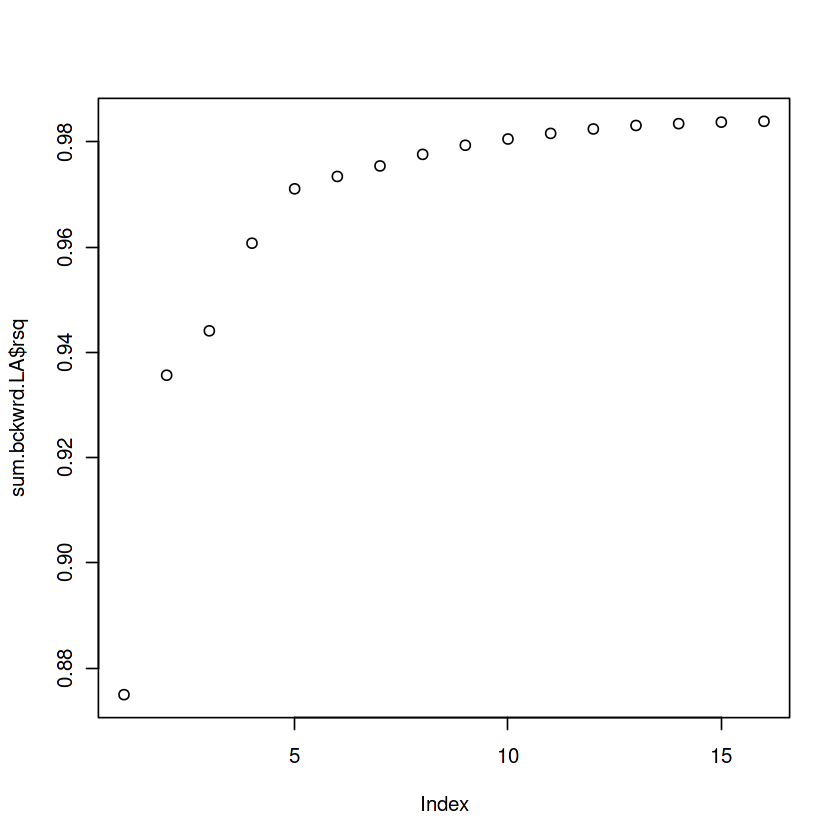

In [47]:
# Step-wise:
# install.packages("leaps")
library(leaps)
out.bckwrd.LA <- regsubsets(AveragePrice ~ . -Date, data = datLA, nvmax = 15,
                         method = "backward", really.big = T)
sum.bckwrd.LA <- summary(out.bckwrd.LA)
sum.bckwrd.LA$rsq
sum.bckwrd.LA$which
plot(sum.bckwrd.LA$rsq)

In [48]:
# Optimal Model for LA:
reg.LA.all.opt <- lm(AveragePrice ~ +UnemploymentRate +HouseholdIncome +EducationAttainmentHighSchoolORless, data = datLA)
summary(reg.LA.all.opt)

# Based on the backward step-wise model above, the 3 above variables appear to be the most significant at all alpha levels and thus were
# (subjectively) selected as the most contributable.


Call:
lm(formula = AveragePrice ~ +UnemploymentRate + HouseholdIncome + 
    EducationAttainmentHighSchoolORless, data = datLA)

Residuals:
   Min     1Q Median     3Q    Max 
-52095 -18694   -415  18400  49171 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          7.632e+05  1.314e+05   5.807 2.92e-08 ***
UnemploymentRate                    -2.357e+04  8.451e+02 -27.890  < 2e-16 ***
HouseholdIncome                      8.884e+00  6.845e-01  12.979  < 2e-16 ***
EducationAttainmentHighSchoolORless -3.339e-01  6.478e-02  -5.155 6.78e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24400 on 176 degrees of freedom
Multiple R-squared:  0.9441,	Adjusted R-squared:  0.9432 
F-statistic: 991.1 on 3 and 176 DF,  p-value: < 2.2e-16


In [49]:
# Optimal Model w/ Training / Test Data:
dat.LA.tr <- datLA[1:144,]
dat.LA.tst <- datLA[145:180,]
reg.LA.all.opt.tr <- lm(AveragePrice ~ +UnemploymentRate +HouseholdIncome +EducationAttainmentHighSchoolORless, data = dat.LA.tr)
summary(reg.LA.all.opt.tr)
sum_regmnth.tr <- summary(reg.LA.all.opt.tr)
reg.LA.all.opt.tst <- lm(AveragePrice ~ +UnemploymentRate +HouseholdIncome +EducationAttainmentHighSchoolORless, data = dat.LA.tst)
summary(reg.LA.all.opt.tst)

yhat_mnth.tst <- predict(reg.LA.all.opt.tr, dat.LA.tst)
MSE_mnth.tst <- mean((dat.LA.tst$AveragePrice - yhat_mnth.tst)^2)
RMSE_mnth.tst <- MSE_mnth.tst^0.5
RMSE_mnth.tst

MSE_mnth.tr <- mean(reg.LA.all.opt.tr$residuals^2)
RMSE_mnth.tr <- sum_regmnth.tr$sigma
MSE_mnth.tr
MSE_mnth.tst
RMSE_mnth.tr
RMSE_mnth.tst


Call:
lm(formula = AveragePrice ~ +UnemploymentRate + HouseholdIncome + 
    EducationAttainmentHighSchoolORless, data = dat.LA.tr)

Residuals:
   Min     1Q Median     3Q    Max 
-57154 -18165   2839  19196  49406 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          5.976e+05  1.452e+05   4.116 6.55e-05 ***
UnemploymentRate                    -2.429e+04  8.998e+02 -27.000  < 2e-16 ***
HouseholdIncome                      5.885e+00  1.117e+00   5.271 5.02e-07 ***
EducationAttainmentHighSchoolORless -1.346e-01  8.822e-02  -1.525    0.129    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24770 on 140 degrees of freedom
Multiple R-squared:  0.9156,	Adjusted R-squared:  0.9138 
F-statistic: 506.6 on 3 and 140 DF,  p-value: < 2.2e-16



Call:
lm(formula = AveragePrice ~ +UnemploymentRate + HouseholdIncome + 
    EducationAttainmentHighSchoolORless, data = dat.LA.tst)

Residuals:
   Min     1Q Median     3Q    Max 
-29133 -10092  -1467  10482  30821 

Coefficients: (1 not defined because of singularities)
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          34724.602 125735.619   0.276    0.784    
UnemploymentRate                    -12084.423   9086.786  -1.330    0.193    
HouseholdIncome                         10.206      1.525   6.693 1.28e-07 ***
EducationAttainmentHighSchoolORless         NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18330 on 33 degrees of freedom
Multiple R-squared:  0.6305,	Adjusted R-squared:  0.6081 
F-statistic: 28.15 on 2 and 33 DF,  p-value: 7.339e-08


[1] 38849.33

[1] 596554950

[1] 1509270191

[1] 24770.94

[1] 38849.33

In [50]:
# Optimal Model Training v. Test RMSE (%):
24770.94 / 38849.33 # 63.76% increase in RMSE!

[1] 0.6376156

In [51]:
# seasonal Regression:
dat.LA.ts.tr <- datLAts[1:144,]
dat.LA.ts.tst <- datLAts[145:180,]
reg.LA.seas.tr <- lm(AveragePrice ~ Month + timetr + timetrsq, data = dat.LA.ts.tr)
summary(reg.LA.seas.tr)
sum_regmnth.tr2 <- summary(reg.LA.seas.tr)
reg.LA.seas.tst <- lm(AveragePrice ~ Month + timetr + timetrsq, data = dat.LA.ts.tst)
summary(reg.LA.seas.tst)

yhat_mnth.tst2 <- predict(reg.LA.seas.tr, dat.LA.ts.tst)
MSE_mnth.tst2 <- mean((dat.LA.ts.tst$AveragePrice - yhat_mnth.tst2)^2)
RMSE_mnth.tst2 <- MSE_mnth.tst2^0.5
RMSE_mnth.tst2

MSE_mnth.tr2 <- mean(reg.LA.seas.tr$residuals^2)
RMSE_mnth.tr2 <- sum_regmnth.tr2$sigma
MSE_mnth.tr2
MSE_mnth.tst2
RMSE_mnth.tr2
RMSE_mnth.tst2


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.LA.ts.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-164015  -31521    -724   26394  101443 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 691399.59   20066.84  34.455   <2e-16 ***
Month2        1817.33   22107.16   0.082    0.935    
Month3        3406.30   22108.01   0.154    0.878    
Month4        4916.84   22109.40   0.222    0.824    
Month5        6177.36   22111.31   0.279    0.780    
Month6        7454.35   22113.75   0.337    0.737    
Month7        8584.91   22116.70   0.388    0.699    
Month8        9732.11   22120.17   0.440    0.661    
Month9       10676.88   22124.15   0.483    0.630    
Month10      11652.70   22128.66   0.527    0.599    
Month11      12412.42   22133.71   0.561    0.576    
Month12      13110.37   22139.32   0.592    0.555    
timetr       -6439.56     437.20 -14.729   <2e-16 ***
timetrsq        41.64       2.92  14.258   <2e-16 **


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.LA.ts.tst)

Residuals:
    Min      1Q  Median      3Q     Max 
-7463.6 -4115.1  -831.3  4267.3  8422.7 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.284e+06  2.813e+05  -8.118 4.63e-08 ***
Month2      -1.371e+03  5.019e+03  -0.273    0.787    
Month3      -2.028e+03  5.025e+03  -0.404    0.690    
Month4      -3.258e+03  5.033e+03  -0.647    0.524    
Month5      -3.679e+03  5.043e+03  -0.730    0.473    
Month6      -4.026e+03  5.054e+03  -0.797    0.434    
Month7      -3.679e+03  5.066e+03  -0.726    0.475    
Month8      -3.314e+03  5.079e+03  -0.653    0.521    
Month9      -2.734e+03  5.092e+03  -0.537    0.597    
Month10     -1.996e+03  5.108e+03  -0.391    0.700    
Month11     -2.521e+02  5.126e+03  -0.049    0.961    
Month12      1.826e+03  5.147e+03   0.355    0.726    
timetr       3.421e+04  3.474e+03   9.845 1.60e-09 ***
timetrsq    -9.732e+01  1.069e+01  -9

[1] 81480.68

[1] 2647199259

[1] 6639101068

[1] 54150.55

[1] 81480.68

In [52]:
# Seasonal Regression Model Training v. Test RMSE (%):
54150.55 / 81480.68 # 66.46% increase in RMSE!

[1] 0.6645815

Series: datLA[, 1] 
ARIMA(5,2,2) 

Coefficients:
          ar1     ar2      ar3      ar4     ar5     ma1      ma2
      -0.5724  0.4537  -0.2965  -0.0558  0.3897  0.6253  -0.3518
s.e.   0.3347  0.3470   0.0857   0.0980  0.1227  0.3698   0.3680

sigma^2 = 2360419:  log likelihood = -1556.11
AIC=3128.22   AICc=3129.07   BIC=3153.67

Training set error measures:
                    ME     RMSE      MAE         MPE      MAPE      MASE
Training set -19.88188 1497.464 1170.106 0.003406052 0.2212721 0.2737827
                    ACF1
Training set 0.005372854


	Ljung-Box test

data:  Residuals from ARIMA(5,2,2)
Q* = 9.4914, df = 3, p-value = 0.02342

Model df: 7.   Total lags used: 10



ME        RMSE     MAE      MPE         MAPE      MASE     
Training set -19.88188 1497.464 1170.106 0.003406052 0.2212721 0.2737827
             ACF1       
Training set 0.005372854

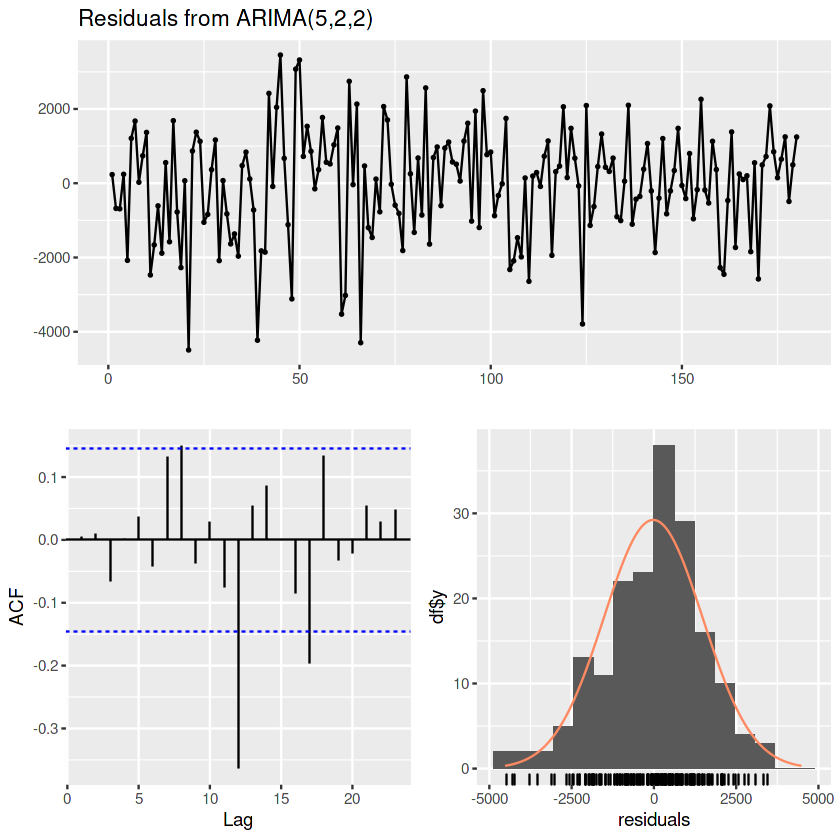

In [53]:
# ARIMA Model:
# install.packages("fpp2")
library(fpp2)

mreg.arima <- auto.arima(datLA[,1])
summary(mreg.arima)
checkresiduals(mreg.arima)
accuracy(mreg.arima)
# lowest RMSE out of all models: 1497.464.

**Models for San Franciscco: All-In Regression, Step-Wise Regression, Self-Selected 'Optimal' Regression, Seasonal Regression,ARIMA**

In [54]:
# All-in model for SF:
str(datSF)
reg.SF.all <- lm(AveragePrice ~ .-Date, data = datSF)
summary(reg.SF.all)

'data.frame':	180 obs. of  16 variables:
 $ AveragePrice                               : int  808703 821536 831583 842577 850977 859748 868253 874735 882374 889915 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Population                                 : int  780187 780187 780187 780187 780187 780187 780187 780187 780187 780187 ...
 $ Employment                                 : int  735600 737500 735100 733300 734200 735100 740100 739500 739300 742300 ...
 $ Unemployment                               : int  38700 39300 38400 35300 33300 37100 37400 36100 34600 34000 ...
 $ UnemploymentRate                           : num  5 5.1 5 4.6 4.3 4.8 4.8 4.6 4.5 4.4 ...
 $ HouseholdIncome                            : int  85801 85801 85801 85801 85801 85801 85801 85801 85801 85801 ...
 $ 10YearBondRate                             : num  4.22 4.17 4.5 4.


Call:
lm(formula = AveragePrice ~ . - Date, data = datSF)

Residuals:
   Min     1Q Median     3Q    Max 
-52527 -20231  -2318  18361  61633 

Coefficients: (2 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                 -2.697e+06  3.923e+05  -6.874
PoliticalParty                                      NA         NA      NA
Population                                   1.354e+00  6.679e-01   2.027
Employment                                   1.125e+00  4.772e-01   2.357
Unemployment                                -3.152e+01  4.343e+00  -7.257
UnemploymentRate                             2.485e+05  3.881e+04   6.403
HouseholdIncome                              7.834e+00  1.347e+00   5.817
`10YearBondRate`                             3.849e+04  1.088e+04   3.537
`30YearFixedMortgageRate`                   -5.080e+03  1.265e+04  -0.401
ViolentCrimesRate                            4.403e+01  5.644

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2  linear dependencies found”


Reordering variables and trying again:


[1] 0.7330907 0.9107421 0.9724115 0.9806191 0.9845628 0.9865819 0.9868856
 [8] 0.9871257 0.9873813 0.9877267 0.9879586 0.9881198 0.9883027 0.9884450
[15] 0.9885798 0.9887217

(Intercept) PoliticalParty Population Employment Unemployment
1  TRUE        FALSE          FALSE      TRUE       FALSE       
2  TRUE        FALSE          FALSE      TRUE        TRUE       
3  TRUE        FALSE          FALSE      TRUE        TRUE       
4  TRUE        FALSE          FALSE      TRUE        TRUE       
5  TRUE        FALSE          FALSE      TRUE        TRUE       
6  TRUE        FALSE          FALSE      TRUE        TRUE       
7  TRUE        FALSE          FALSE      TRUE        TRUE       
8  TRUE        FALSE          FALSE      TRUE        TRUE       
9  TRUE        FALSE           TRUE      TRUE        TRUE       
10 TRUE        FALSE           TRUE      TRUE        TRUE       
11 TRUE        FALSE           TRUE      TRUE        TRUE       
12 TRUE        FALSE           TRUE      TRUE        TRUE       
13 TRUE        FALSE           TRUE      TRUE        TRUE       
14 TRUE        FALSE           TRUE      TRUE        TRUE       
15 TRUE        FALSE           TRUE      TRUE        TRUE       
16 TRUE        FALSE           TRUE      TRUE        TRUE       
   UnemploymentRate HouseholdIncome `10YearBondRate` `30YearFixedMortgageRate`
1  FALSE            FALSE           FALSE            FALSE                    
2  FALSE            FALSE           FALSE            FALSE                    
3   TRUE            FALSE           FALSE            FALSE                    
4   TRUE            FALSE            TRUE            FALSE                    
5   TRUE             TRUE            TRUE            FALSE                    
6   TRUE             TRUE            TRUE            FALSE                    
7   TRUE             TRUE            TRUE            FALSE                    
8   TRUE             TRUE            TRUE            FALSE                    
9   TRUE             TRUE            TRUE            FALSE                    
10  TRUE             TRUE            TRUE            FALSE                    
11  TRUE             TRUE            TRUE            FALSE                    
12  TRUE             TRUE            TRUE            FALSE                    
13  TRUE             TRUE            TRUE            FALSE                    
14  TRUE             TRUE            TRUE            FALSE                    
15  TRUE             TRUE            TRUE            FALSE                    
16  TRUE             TRUE            TRUE            FALSE                    
   ViolentCrimesRate ⋯ Month3 Month4 Month5 Month6 Month7 Month8 Month9 Month10
1  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
2  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
3  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
4  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
5  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
6  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
7  FALSE             ⋯ FALSE  FALSE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
8  FALSE             ⋯ FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
9  FALSE             ⋯ FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
10 FALSE             ⋯ FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
11 FALSE             ⋯ FALSE   TRUE   TRUE  FALSE  FALSE   TRUE  FALSE  FALSE  
12 FALSE             ⋯ FALSE   TRUE   TRUE  FALSE  FALSE   TRUE  FALSE  FALSE  
13 FALSE             ⋯ FALSE   TRUE   TRUE  FALSE   TRUE   TRUE  FALSE  FALSE  
14 FALSE             ⋯ FALSE   TRUE   TRUE  FALSE   TRUE   TRUE  FALSE  FALSE  
15 FALSE             ⋯  TRUE   TRUE   TRUE  FALSE   TRUE   TRUE  FALSE  FALSE  
16 FALSE             ⋯  TRUE   TRUE   TRUE  FALSE   TRUE   TRUE  FALSE  FALSE  
   Month11 Month12
1  FALSE   FALSE  
2  FALSE   FALSE  
3  FALSE   FALSE  
4  FALSE   FALSE  
5  FALSE   FALSE  
6  FALSE   FALSE  
7  FALSE   FALSE  
8  FALSE   FALSE  
9  FALSE   FALSE  
10 FA

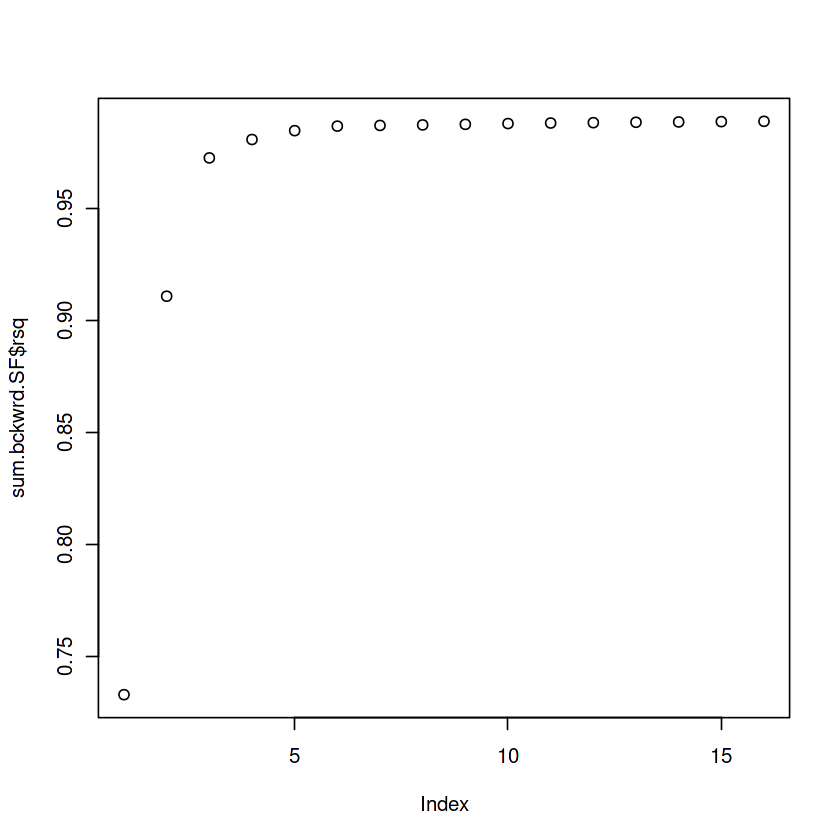

In [55]:
# Step-wise:
#install.packages("leaps")
library(leaps)
out.bckwrd.SF <- regsubsets(AveragePrice ~ . -Date, data = datSF, nvmax = 15,
                            method = "backward", really.big = T)
sum.bckwrd.SF <- summary(out.bckwrd.SF)
sum.bckwrd.SF$rsq
sum.bckwrd.SF$which
plot(sum.bckwrd.SF$rsq)

In [56]:
# Optimal Model for SF:
reg.SF.all.opt <- lm(AveragePrice ~ + Employment + UnemploymentRate + Unemployment, data = datSF)
summary(reg.SF.all.opt)

# Based on the backward step-wise model above, the 3 above variables appear to be the most significant at all alpha levels and thus were
# (subjectively) selected as the most contributable.


Call:
lm(formula = AveragePrice ~ +Employment + UnemploymentRate + 
    Unemployment, data = datSF)

Residuals:
   Min     1Q Median     3Q    Max 
-85493 -25832   1780  23914 100267 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.842e+06  9.602e+04  -19.19   <2e-16 ***
Employment        3.458e+00  1.037e-01   33.35   <2e-16 ***
UnemploymentRate  4.727e+05  2.383e+04   19.84   <2e-16 ***
Unemployment     -5.676e+01  2.566e+00  -22.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38350 on 176 degrees of freedom
Multiple R-squared:  0.9724,	Adjusted R-squared:  0.9719 
F-statistic:  2068 on 3 and 176 DF,  p-value: < 2.2e-16


In [57]:
# Optimal Model w/ Training / Test Data:
dat.SF.tr <- datSF[1:144,]
dat.SF.tst <- datSF[145:180,]
reg.SF.all.opt.tr <- lm(AveragePrice ~ + Employment + UnemploymentRate + Unemployment, data = dat.SF.tr)
summary(reg.SF.all.opt.tr)
sum_regmnth.tr <- summary(reg.SF.all.opt.tr)
reg.SF.all.opt.tst <- lm(AveragePrice ~ + Employment + UnemploymentRate + Unemployment, data = dat.SF.tst)
summary(reg.SF.all.opt.tst)

yhat_mnth.tst <- predict(reg.SF.all.opt.tr, dat.SF.tst)
MSE_mnth.tst <- mean((dat.SF.tst$AveragePrice - yhat_mnth.tst)^2)
RMSE_mnth.tst <- MSE_mnth.tst^0.5
RMSE_mnth.tst

MSE_mnth.tr <- mean(reg.SF.all.opt.tr$residuals^2)
RMSE_mnth.tr <- sum_regmnth.tr$sigma
MSE_mnth.tr
MSE_mnth.tst
RMSE_mnth.tr
RMSE_mnth.tst


Call:
lm(formula = AveragePrice ~ +Employment + UnemploymentRate + 
    Unemployment, data = dat.SF.tr)

Residuals:
   Min     1Q Median     3Q    Max 
-85925 -22934   -155  25468  95811 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.750e+06  1.405e+05  -12.46   <2e-16 ***
Employment        3.347e+00  1.588e-01   21.08   <2e-16 ***
UnemploymentRate  4.562e+05  3.185e+04   14.32   <2e-16 ***
Unemployment     -5.490e+01  3.473e+00  -15.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38160 on 140 degrees of freedom
Multiple R-squared:  0.9365,	Adjusted R-squared:  0.9352 
F-statistic: 688.8 on 3 and 140 DF,  p-value: < 2.2e-16



Call:
lm(formula = AveragePrice ~ +Employment + UnemploymentRate + 
    Unemployment, data = dat.SF.tst)

Residuals:
   Min     1Q Median     3Q    Max 
-68042 -22394   3412  17057  62229 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)      -2.846e+05  6.840e+05  -0.416  0.68012   
Employment        1.877e+00  6.571e-01   2.856  0.00748 **
UnemploymentRate -2.695e+05  2.363e+05  -1.140  0.26257   
Unemployment      1.714e+01  2.373e+01   0.722  0.47530   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35000 on 32 degrees of freedom
Multiple R-squared:  0.8033,	Adjusted R-squared:  0.7848 
F-statistic: 43.56 on 3 and 32 DF,  p-value: 2.096e-11


[1] 41764.6

[1] 1416014461

[1] 1744281543

[1] 38163.75

[1] 41764.6

In [58]:
# Optimal Model Training v. Test RMSE (%):
38163.75 / 41764.6 # 9.43% increase in RMSE!

[1] 0.9137822

In [59]:
# seasonal Regression:
dat.SF.ts.tr <- datSFts[1:144,]
dat.SF.ts.tst <- datSFts[145:180,]
reg.SF.seas.tr <- lm(AveragePrice ~ Month + timetr + timetrsq, data = dat.SF.ts.tr)
summary(reg.SF.seas.tr)
sum_regmnth.tr2 <- summary(reg.SF.seas.tr)
reg.SF.seas.tst <- lm(AveragePrice ~ Month + timetr + timetrsq, data = dat.SF.ts.tst)
summary(reg.SF.seas.tst)

yhat_mnth.tst2 <- predict(reg.SF.seas.tr, dat.SF.ts.tst)
MSE_mnth.tst2 <- mean((dat.SF.ts.tst$AveragePrice - yhat_mnth.tst2)^2)
RMSE_mnth.tst2 <- MSE_mnth.tst2^0.5
RMSE_mnth.tst2

MSE_mnth.tr2 <- mean(reg.SF.seas.tr$residuals^2)
RMSE_mnth.tr2 <- sum_regmnth.tr2$sigma
MSE_mnth.tr2
MSE_mnth.tst2
RMSE_mnth.tr2
RMSE_mnth.tst2


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.SF.ts.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-175303  -39742    5078   40790  113515 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 992106.057  24438.998  40.595   <2e-16 ***
Month2        2010.419  26923.857   0.075    0.941    
Month3        3470.118  26924.890   0.129    0.898    
Month4        4365.931  26926.583   0.162    0.871    
Month5        5497.523  26928.920   0.204    0.839    
Month6        6203.646  26931.888   0.230    0.818    
Month7        6669.383  26935.482   0.248    0.805    
Month8        6881.816  26939.702   0.255    0.799    
Month9        7504.280  26944.553   0.279    0.781    
Month10       8182.190  26950.046   0.304    0.762    
Month11       8903.464  26956.197   0.330    0.742    
Month12       9200.935  26963.028   0.341    0.733    
timetr       -8169.882    532.458 -15.344   <2e-16 ***
timetrsq        69.902      3.556  19.


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.SF.ts.tst)

Residuals:
   Min     1Q Median     3Q    Max 
-20853 -10754  -6540  15781  29768 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.431e+06  8.751e+05  -8.492 2.16e-08 ***
Month2      -6.385e+03  1.561e+04  -0.409    0.687    
Month3      -7.867e+03  1.563e+04  -0.503    0.620    
Month4      -7.605e+03  1.566e+04  -0.486    0.632    
Month5      -7.268e+03  1.569e+04  -0.463    0.648    
Month6      -6.624e+03  1.572e+04  -0.421    0.678    
Month7      -5.474e+03  1.576e+04  -0.347    0.732    
Month8      -3.095e+03  1.580e+04  -0.196    0.846    
Month9      -1.915e+03  1.584e+04  -0.121    0.905    
Month10     -1.594e+03  1.589e+04  -0.100    0.921    
Month11     -1.450e+03  1.594e+04  -0.091    0.928    
Month12     -7.925e+02  1.601e+04  -0.049    0.961    
timetr       1.021e+05  1.081e+04   9.446 3.37e-09 ***
timetrsq    -2.944e+02  3.324e+01  -8.856 1.05e

[1] 197780.6

[1] 3926407294

[1] 39117152488

[1] 65948.85

[1] 197780.6

In [60]:
# Seasonal Regression Model Training v. Test RMSE (%):
65948.85 / 197780.6 # 199.89% increase in RMSE!

[1] 0.3334445

Series: datSF[, 1] 
ARIMA(1,2,1) 

Coefficients:
         ar1      ma1
      0.7959  -0.9716
s.e.  0.0848   0.0499

sigma^2 = 23669384:  log likelihood = -1763.19
AIC=3532.38   AICc=3532.52   BIC=3541.93

Training set error measures:
                   ME     RMSE      MAE           MPE      MAPE      MASE
Training set -38.0952 4810.759 3831.205 -0.0002894726 0.3900524 0.5263262
                    ACF1
Training set -0.01330509


	Ljung-Box test

data:  Residuals from ARIMA(1,2,1)
Q* = 31.69, df = 8, p-value = 0.0001058

Model df: 2.   Total lags used: 10



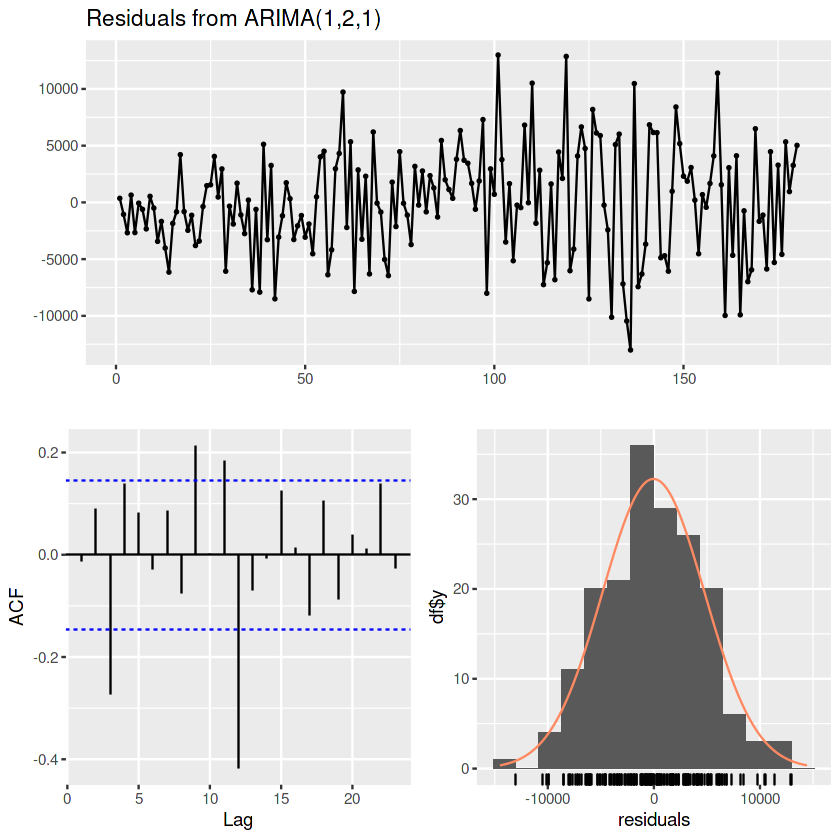

In [61]:
# install.packages("fpp2")
library(fpp2)

mreg.arima <- auto.arima(datSF[,1])
summary(mreg.arima)
checkresiduals(mreg.arima)
# lowest RMSE out of all models: 4810.759.

**Models for Fresno: All-In Regression, Step-Wise Regression, Self-Selected 'Optimal' Regression, Seasonal Regression,ARIMA**

In [62]:
#  All-in model for FRS:
str(datFRS)
reg.FRS.all <- lm(AveragePrice ~ .-Date, data = datFRS)
summary(reg.FRS.all)

'data.frame':	180 obs. of  16 variables:
 $ AveragePrice                               : int  235064 239902 245376 251026 256245 261129 265804 271174 275818 280802 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Population                                 : int  457786 457786 457786 457786 457786 457786 457786 457786 457786 457786 ...
 $ Employment                                 : int  352400 354900 353300 369400 373400 374200 384000 385400 381800 377900 ...
 $ Unemployment                               : int  44700 45100 43900 38400 33900 34700 34300 31000 30500 32300 ...
 $ UnemploymentRate                           : num  11.3 11.3 11 9.4 8.3 8.5 8.2 7.4 7.4 7.9 ...
 $ HouseholdIncome                            : int  61340 61340 61340 61340 61340 61340 61340 61340 61340 61340 ...
 $ 10YearBondRate                             : num  4.22 4.17 4


Call:
lm(formula = AveragePrice ~ . - Date, data = datFRS)

Residuals:
     Min       1Q   Median       3Q      Max 
-19865.1  -5082.0   -681.9   3819.4  18905.3 

Coefficients: (1 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                  1.124e+05  1.779e+05   0.631
PoliticalParty                               8.429e+03  5.444e+03   1.548
Population                                  -3.849e-01  2.247e-01  -1.713
Employment                                  -5.476e-01  4.237e-01  -1.293
Unemployment                                 4.633e+00  2.457e+00   1.886
UnemploymentRate                            -3.434e+04  1.232e+04  -2.787
HouseholdIncome                              3.298e+00  3.423e-01   9.637
`10YearBondRate`                             3.678e+03  3.757e+03   0.979
`30YearFixedMortgageRate`                    5.629e+03  4.739e+03   1.188
ViolentCrimesRate                       

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


[1] 0.6873802 0.8589392 0.9320177 0.9446886 0.9539165 0.9559975 0.9584325
 [8] 0.9600989 0.9618595 0.9638958 0.9656330 0.9668710 0.9682901 0.9702357
[15] 0.9725379

(Intercept) PoliticalParty Population Employment Unemployment
1  TRUE        FALSE          FALSE      FALSE      FALSE       
2  TRUE        FALSE          FALSE       TRUE      FALSE       
3  TRUE        FALSE          FALSE       TRUE      FALSE       
4  TRUE        FALSE          FALSE       TRUE      FALSE       
5  TRUE        FALSE          FALSE       TRUE      FALSE       
6  TRUE        FALSE          FALSE       TRUE      FALSE       
7  TRUE        FALSE          FALSE       TRUE      FALSE       
8  TRUE        FALSE          FALSE       TRUE      FALSE       
9  TRUE        FALSE          FALSE       TRUE      FALSE       
10 TRUE        FALSE          FALSE       TRUE      FALSE       
11 TRUE        FALSE          FALSE       TRUE       TRUE       
12 TRUE        FALSE          FALSE       TRUE       TRUE       
13 TRUE        FALSE          FALSE       TRUE       TRUE       
14 TRUE        FALSE          FALSE       TRUE       TRUE       
15 TRUE        FALSE          FALSE       TRUE       TRUE       
   UnemploymentRate HouseholdIncome `10YearBondRate` `30YearFixedMortgageRate`
1  TRUE             FALSE           FALSE            FALSE                    
2  TRUE             FALSE           FALSE            FALSE                    
3  TRUE              TRUE           FALSE            FALSE                    
4  TRUE              TRUE           FALSE             TRUE                    
5  TRUE              TRUE           FALSE             TRUE                    
6  TRUE              TRUE           FALSE             TRUE                    
7  TRUE              TRUE           FALSE             TRUE                    
8  TRUE              TRUE           FALSE             TRUE                    
9  TRUE              TRUE           FALSE             TRUE                    
10 TRUE              TRUE           FALSE             TRUE                    
11 TRUE              TRUE           FALSE             TRUE                    
12 TRUE              TRUE           FALSE             TRUE                    
13 TRUE              TRUE           FALSE             TRUE                    
14 TRUE              TRUE           FALSE             TRUE                    
15 TRUE              TRUE           FALSE             TRUE                    
   ViolentCrimesRate ⋯ Month3 Month4 Month5 Month6 Month7 Month8 Month9 Month10
1  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
2  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
3  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
4  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
5  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
6  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE   TRUE  FALSE  
7  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE   TRUE   TRUE  
8  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE   TRUE   TRUE   TRUE  
9  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE   TRUE   TRUE   TRUE  
10 FALSE             ⋯ FALSE  FALSE   TRUE  FALSE  FALSE   TRUE   TRUE   TRUE  
11 FALSE             ⋯ FALSE  FALSE   TRUE  FALSE  FALSE   TRUE   TRUE   TRUE  
12 FALSE             ⋯ FALSE  FALSE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE  
13 FALSE             ⋯ FALSE  FALSE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE  
14 FALSE             ⋯ FALSE  FALSE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE  
15 FALSE             ⋯ FALSE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE  
   Month11 Month12
1  FALSE   FALSE  
2  FALSE   FALSE  
3  FALSE   FALSE  
4  FALSE   FALSE  
5  FALSE   FALSE  
6  FALSE   FALSE  
7  FALSE   FALSE  
8  FALSE   FALSE  
9   TRUE   FALSE  
10  TRUE   FALSE  
11  TRUE   FALSE  
12  TRUE   FALSE  
13  TRUE   FALSE  
14  TRUE   FALSE  
15  TRUE   FALSE

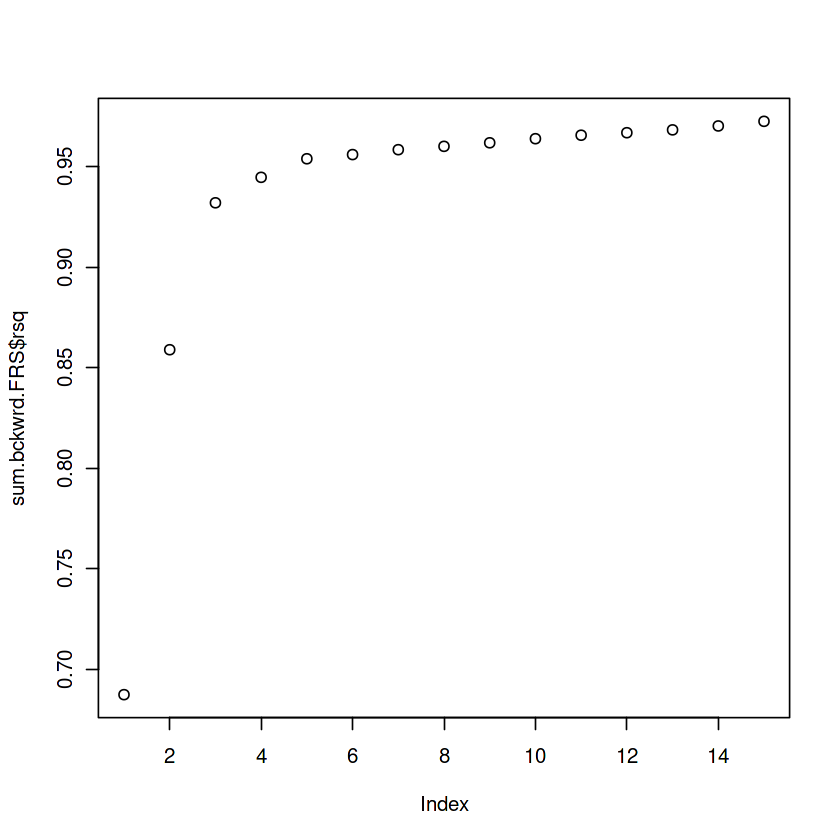

In [63]:
# Step-wise:
#install.packages("leaps")
library(leaps)

out.bckwrd.FRS <- regsubsets(AveragePrice ~ . -Date, data = datFRS, nvmax = 15,
                             method = "backward", really.big = T)
sum.bckwrd.FRS <- summary(out.bckwrd.FRS)
sum.bckwrd.FRS$rsq
sum.bckwrd.FRS$which
plot(sum.bckwrd.FRS$rsq)

In [64]:
# Optimal Model for FRS:
reg.FRS.all.opt <- lm(AveragePrice ~ +UnemploymentRate +HouseholdIncome +Employment, data = datFRS)
summary(reg.FRS.all.opt)

# Based on the backward step-wise model above, the 3 above variables appear to be the most significant at all alpha levels and thus were
# (subjectively) selected as the most contributable.


Call:
lm(formula = AveragePrice ~ +UnemploymentRate + HouseholdIncome + 
    Employment, data = datFRS)

Residuals:
   Min     1Q Median     3Q    Max 
-36149  -8682   -576   8792  38237 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       7.702e+05  4.128e+04   18.66   <2e-16 ***
UnemploymentRate -1.517e+04  4.694e+02  -32.31   <2e-16 ***
HouseholdIncome   3.586e+00  2.607e-01   13.76   <2e-16 ***
Employment       -1.554e+00  8.177e-02  -19.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13090 on 176 degrees of freedom
Multiple R-squared:  0.932,	Adjusted R-squared:  0.9309 
F-statistic: 804.3 on 3 and 176 DF,  p-value: < 2.2e-16


In [65]:
# Optimal Model w/ Training / Test Data:
dat.FRS.tr <- datFRS[1:144,]
dat.FRS.tst <- datFRS[145:180,]
reg.FRS.all.opt.tr <- lm(AveragePrice ~ +UnemploymentRate +HouseholdIncome +Employment, data = dat.FRS.tr)
summary(reg.FRS.all.opt.tr)
sum_regmnth.tr <- summary(reg.FRS.all.opt.tr)
reg.FRS.all.opt.tst <- lm(AveragePrice ~ +UnemploymentRate +HouseholdIncome +Employment, data = dat.FRS.tst)
summary(reg.FRS.all.opt.tst)

yhat_mnth.tst <- predict(reg.FRS.all.opt.tr, dat.FRS.tst)
MSE_mnth.tst <- mean((dat.FRS.tst$AveragePrice - yhat_mnth.tst)^2)
RMSE_mnth.tst <- MSE_mnth.tst^0.5
RMSE_mnth.tst

MSE_mnth.tr <- mean(reg.FRS.all.opt.tr$residuals^2)
RMSE_mnth.tr <- sum_regmnth.tr$sigma
MSE_mnth.tr
MSE_mnth.tst
RMSE_mnth.tr
RMSE_mnth.tst


Call:
lm(formula = AveragePrice ~ +UnemploymentRate + HouseholdIncome + 
    Employment, data = dat.FRS.tr)

Residuals:
   Min     1Q Median     3Q    Max 
-40117  -9028   -429   8062  39444 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.836e+05  6.187e+04  14.282   <2e-16 ***
UnemploymentRate -1.584e+04  5.357e+02 -29.564   <2e-16 ***
HouseholdIncome   3.128e+00  3.194e-01   9.795   <2e-16 ***
Employment       -1.763e+00  1.222e-01 -14.430   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13740 on 140 degrees of freedom
Multiple R-squared:  0.9344,	Adjusted R-squared:  0.933 
F-statistic: 665.2 on 3 and 140 DF,  p-value: < 2.2e-16



Call:
lm(formula = AveragePrice ~ +UnemploymentRate + HouseholdIncome + 
    Employment, data = dat.FRS.tst)

Residuals:
     Min       1Q   Median       3Q      Max 
-10598.7  -5683.1   -869.2   3878.4  13686.6 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.154e+05  1.364e+05   0.846  0.40384    
UnemploymentRate -5.460e+03  1.770e+03  -3.084  0.00418 ** 
HouseholdIncome   4.174e+00  6.115e-01   6.826 1.02e-07 ***
Employment       -2.337e-01  3.456e-01  -0.676  0.50382    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6289 on 32 degrees of freedom
Multiple R-squared:  0.7932,	Adjusted R-squared:  0.7738 
F-statistic: 40.91 on 3 and 32 DF,  p-value: 4.642e-11


[1] 13151.15

[1] 183418979

[1] 172952817

[1] 13735.34

[1] 13151.15

Series: datFRS[, 1] 
ARIMA(0,2,0) 

sigma^2 = 763857:  log likelihood = -1458.11
AIC=2918.22   AICc=2918.24   BIC=2921.4

Training set error measures:
                    ME   RMSE      MAE         MPE      MAPE      MASE
Training set -23.20794 869.12 654.6538 0.005083226 0.3250893 0.3199152
                    ACF1
Training set -0.07912232


	Ljung-Box test

data:  Residuals from ARIMA(0,2,0)
Q* = 81.942, df = 10, p-value = 2.088e-13

Model df: 0.   Total lags used: 10



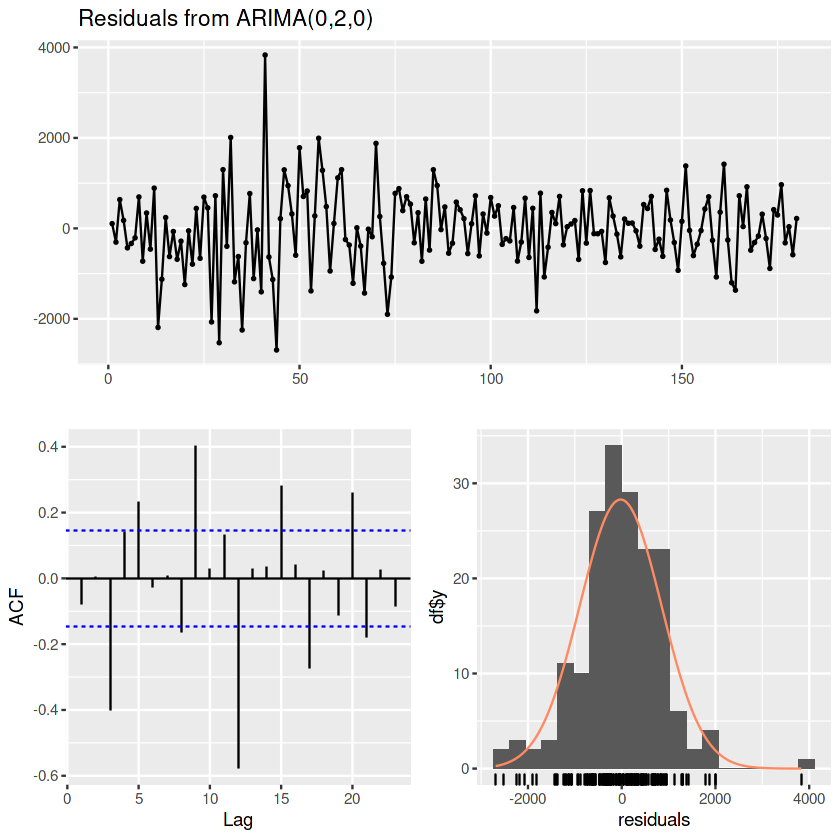

In [66]:
# ARIMA Model:
#install.packages("fpp2")
library(fpp2)
mreg.arima <- auto.arima(datFRS[,1])
summary(mreg.arima)
checkresiduals(mreg.arima)
# Lowest RMSE of 869.12

**Models for Bakersfield: All-In Regression, Step-Wise Regression, Self-Selected 'Optimal' Regression, Seasonal Regression,ARIMA**

In [67]:
# All-in model for BKRS:
str(datBKRS)
reg.BKRS.all <- lm(AveragePrice ~ .-Date, data = datBKRS)
summary(reg.BKRS.all)

'data.frame':	180 obs. of  16 variables:
 $ AveragePrice                               : int  239945 245888 251262 257174 263172 270552 276272 279834 283473 289720 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Population                                 : int  299363 299363 299363 299363 299363 299363 299363 299363 299363 299363 ...
 $ Employment                                 : int  283000 283400 280200 290400 298200 302400 309200 311800 311900 310700 ...
 $ Unemployment                               : int  32300 32700 32900 28400 25400 26800 26300 24200 23300 23000 ...
 $ UnemploymentRate                           : num  10.2 10.3 10.5 8.9 7.8 8.1 7.8 7.2 7 6.9 ...
 $ HouseholdIncome                            : int  59200 59200 59200 59200 59200 59200 59200 59200 59200 59200 ...
 $ 10YearBondRate                             : num  4.22 4.17 4


Call:
lm(formula = AveragePrice ~ . - Date, data = datBKRS)

Residuals:
     Min       1Q   Median       3Q      Max 
-29337.8  -8059.5   -567.1   7633.1  23124.8 

Coefficients: (2 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                  6.774e+05  1.240e+05   5.464
PoliticalParty                                      NA         NA      NA
Population                                   1.327e-01  2.000e-01   0.663
Employment                                  -1.325e+00  4.521e-01  -2.930
Unemployment                                 8.151e+00  2.772e+00   2.941
UnemploymentRate                            -4.781e+04  1.157e+04  -4.133
HouseholdIncome                              3.683e+00  6.151e-01   5.987
`10YearBondRate`                             1.631e+04  4.694e+03   3.474
`30YearFixedMortgageRate`                   -2.774e+03  5.275e+03  -0.526
ViolentCrimesRate                      

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2  linear dependencies found”


Reordering variables and trying again:


[1] 0.7191409 0.8841626 0.8987863 0.9206667 0.9328930 0.9362650 0.9407860
 [8] 0.9428775 0.9454236 0.9472093 0.9489149 0.9504776 0.9517433 0.9520342
[15] 0.9532310 0.9543829

(Intercept) PoliticalParty Population Employment Unemployment
1  TRUE        FALSE          FALSE      FALSE      FALSE       
2  TRUE        FALSE          FALSE       TRUE      FALSE       
3  TRUE        FALSE          FALSE       TRUE      FALSE       
4  TRUE        FALSE          FALSE       TRUE      FALSE       
5  TRUE        FALSE          FALSE       TRUE      FALSE       
6  TRUE        FALSE          FALSE       TRUE      FALSE       
7  TRUE        FALSE          FALSE       TRUE      FALSE       
8  TRUE        FALSE          FALSE       TRUE      FALSE       
9  TRUE        FALSE          FALSE       TRUE       TRUE       
10 TRUE        FALSE          FALSE       TRUE       TRUE       
11 TRUE        FALSE          FALSE       TRUE       TRUE       
12 TRUE        FALSE          FALSE       TRUE       TRUE       
13 TRUE        FALSE          FALSE       TRUE       TRUE       
14 TRUE        FALSE          FALSE       TRUE       TRUE       
15 TRUE        FALSE          FALSE       TRUE       TRUE       
16 TRUE        FALSE          FALSE       TRUE       TRUE       
   UnemploymentRate HouseholdIncome `10YearBondRate` `30YearFixedMortgageRate`
1  TRUE             FALSE           FALSE            FALSE                    
2  TRUE             FALSE           FALSE            FALSE                    
3  TRUE             FALSE           FALSE            FALSE                    
4  TRUE              TRUE           FALSE            FALSE                    
5  TRUE              TRUE            TRUE            FALSE                    
6  TRUE              TRUE            TRUE            FALSE                    
7  TRUE              TRUE            TRUE            FALSE                    
8  TRUE              TRUE            TRUE            FALSE                    
9  TRUE              TRUE            TRUE            FALSE                    
10 TRUE              TRUE            TRUE            FALSE                    
11 TRUE              TRUE            TRUE            FALSE                    
12 TRUE              TRUE            TRUE            FALSE                    
13 TRUE              TRUE            TRUE            FALSE                    
14 TRUE              TRUE            TRUE            FALSE                    
15 TRUE              TRUE            TRUE            FALSE                    
16 TRUE              TRUE            TRUE            FALSE                    
   ViolentCrimesRate ⋯ Month3 Month4 Month5 Month6 Month7 Month8 Month9 Month10
1  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
2  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
3   TRUE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
4   TRUE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
5   TRUE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
6   TRUE             ⋯  TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
7   TRUE             ⋯  TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
8   TRUE             ⋯  TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
9   TRUE             ⋯  TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
10  TRUE             ⋯  TRUE  FALSE  FALSE  FALSE   TRUE  FALSE  FALSE  FALSE  
11  TRUE             ⋯  TRUE  FALSE  FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  
12  TRUE             ⋯  TRUE  FALSE  FALSE   TRUE   TRUE   TRUE  FALSE  FALSE  
13  TRUE             ⋯  TRUE   TRUE  FALSE   TRUE   TRUE   TRUE  FALSE  FALSE  
14  TRUE             ⋯  TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  FALSE  
15  TRUE             ⋯  TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE  FALSE  
16  TRUE             ⋯  TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE  
   Month11 Month12
1  FALSE   FALSE  
2  FALSE   FALSE  
3  FALSE   FALSE  
4  FALSE   FALSE  
5  FALSE   FALSE  
6  FALSE   FALSE  
7  FALSE   FALSE  
8  FALSE   FALSE  
9  FALSE   FALSE  
10 FA

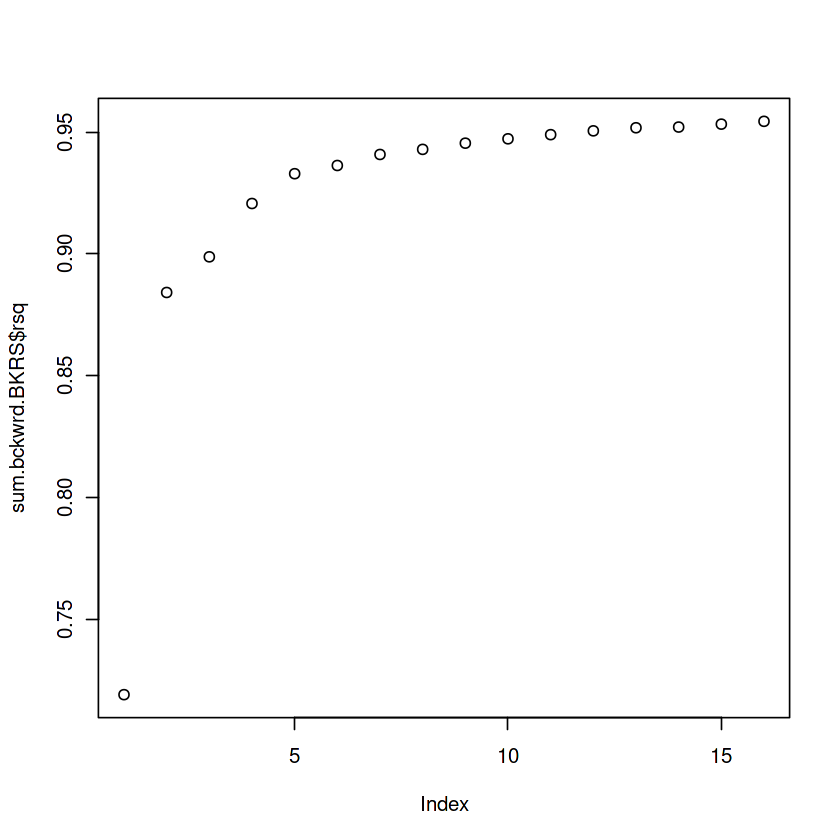

In [68]:
# Step-wise:
#install.packages("leaps")
library(leaps)

out.bckwrd.BKRS <- regsubsets(AveragePrice ~ . -Date, data = datBKRS, nvmax = 15,
                              method = "backward", really.big = T)
sum.bckwrd.BKRS <- summary(out.bckwrd.BKRS)
sum.bckwrd.BKRS$rsq
sum.bckwrd.BKRS$which
plot(sum.bckwrd.BKRS$rsq)

In [69]:
# Optimal Model for BKRS:
reg.BKRS.all.opt <- lm(AveragePrice ~ +UnemploymentRate +ViolentCrimesRate +Employment, data = datBKRS)
summary(reg.BKRS.all.opt)

# Based on the backward step-wise model above, the 3 above variables appear to be the most significant at all alpha levels and thus were
# (subjectively) selected as the most contributable.



Call:
lm(formula = AveragePrice ~ +UnemploymentRate + ViolentCrimesRate + 
    Employment, data = datBKRS)

Residuals:
   Min     1Q Median     3Q    Max 
-52827  -9653    168  10868  47667 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        9.726e+05  4.625e+04  21.031  < 2e-16 ***
UnemploymentRate  -1.708e+04  4.508e+02 -37.889  < 2e-16 ***
ViolentCrimesRate -1.531e+02  3.037e+01  -5.043 1.13e-06 ***
Employment        -1.464e+00  9.713e-02 -15.070  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16740 on 176 degrees of freedom
Multiple R-squared:  0.8988,	Adjusted R-squared:  0.8971 
F-statistic:   521 on 3 and 176 DF,  p-value: < 2.2e-16


In [70]:
# Optimal Model w/ Training / Test Data:
dat.BKRS.tr <- datBKRS[1:144,]
dat.BKRS.tst <- datBKRS[145:180,]

reg.BKRS.all.opt.tr <- lm(AveragePrice ~ +UnemploymentRate +ViolentCrimesRate +Employment, data = dat.BKRS.tr)
summary(reg.BKRS.all.opt.tr)

sum_regmnth.tr <- summary(reg.BKRS.all.opt.tr)

reg.BKRS.all.opt.tst <- lm(AveragePrice ~ +UnemploymentRate +ViolentCrimesRate +Employment, data = dat.BKRS.tst)
summary(reg.BKRS.all.opt.tst)

yhat_mnth.tst <- predict(reg.BKRS.all.opt.tr, dat.BKRS.tst)
MSE_mnth.tst <- mean((dat.BKRS.tst$AveragePrice - yhat_mnth.tst)^2)
RMSE_mnth.tst <- MSE_mnth.tst^0.5
RMSE_mnth.tst

MSE_mnth.tr <- mean(reg.BKRS.all.opt.tr$residuals^2)
RMSE_mnth.tr <- sum_regmnth.tr$sigma
MSE_mnth.tr
MSE_mnth.tst
RMSE_mnth.tr
RMSE_mnth.tst


Call:
lm(formula = AveragePrice ~ +UnemploymentRate + ViolentCrimesRate + 
    Employment, data = dat.BKRS.tr)

Residuals:
   Min     1Q Median     3Q    Max 
-50776 -11174    557  10519  46723 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        9.428e+05  5.143e+04  18.330  < 2e-16 ***
UnemploymentRate  -1.745e+04  5.146e+02 -33.917  < 2e-16 ***
ViolentCrimesRate -1.363e+02  3.390e+01  -4.022 9.41e-05 ***
Employment        -1.387e+00  1.111e-01 -12.493  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17930 on 140 degrees of freedom
Multiple R-squared:  0.9041,	Adjusted R-squared:  0.9021 
F-statistic: 440.1 on 3 and 140 DF,  p-value: < 2.2e-16



Call:
lm(formula = AveragePrice ~ +UnemploymentRate + ViolentCrimesRate + 
    Employment, data = dat.BKRS.tst)

Residuals:
   Min     1Q Median     3Q    Max 
 -9881  -3056   1346   3317   7384 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.420e+05  1.234e+05   3.581  0.00112 ** 
UnemploymentRate  -3.827e+03  1.647e+03  -2.324  0.02661 *  
ViolentCrimesRate -3.060e+02  5.982e+01  -5.115 1.42e-05 ***
Employment        -7.649e-02  2.853e-01  -0.268  0.79037    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5216 on 32 degrees of freedom
Multiple R-squared:  0.6691,	Adjusted R-squared:  0.6381 
F-statistic: 21.57 on 3 and 32 DF,  p-value: 7.926e-08


[1] 11550.35

[1] 312618038

[1] 133410504

[1] 17931.81

[1] 11550.35

In [71]:
# Optimal Model Training v. Test RMSE (%):
(11550.35-17931.81)/17931.81

[1] -0.3558737

Series: datBKRS[, 1] 
ARIMA(0,2,2) 

Coefficients:
          ma1      ma2
      -0.2229  -0.0812
s.e.   0.0711   0.0534

sigma^2 = 971615:  log likelihood = -1478.56
AIC=2963.13   AICc=2963.27   BIC=2972.67

Training set error measures:
                   ME     RMSE     MAE         MPE      MAPE      MASE
Training set -39.0691 974.6915 684.504 0.009131929 0.3113621 0.3162653
                   ACF1
Training set 0.01235801


	Ljung-Box test

data:  Residuals from ARIMA(0,2,2)
Q* = 81.369, df = 8, p-value = 2.587e-14

Model df: 2.   Total lags used: 10



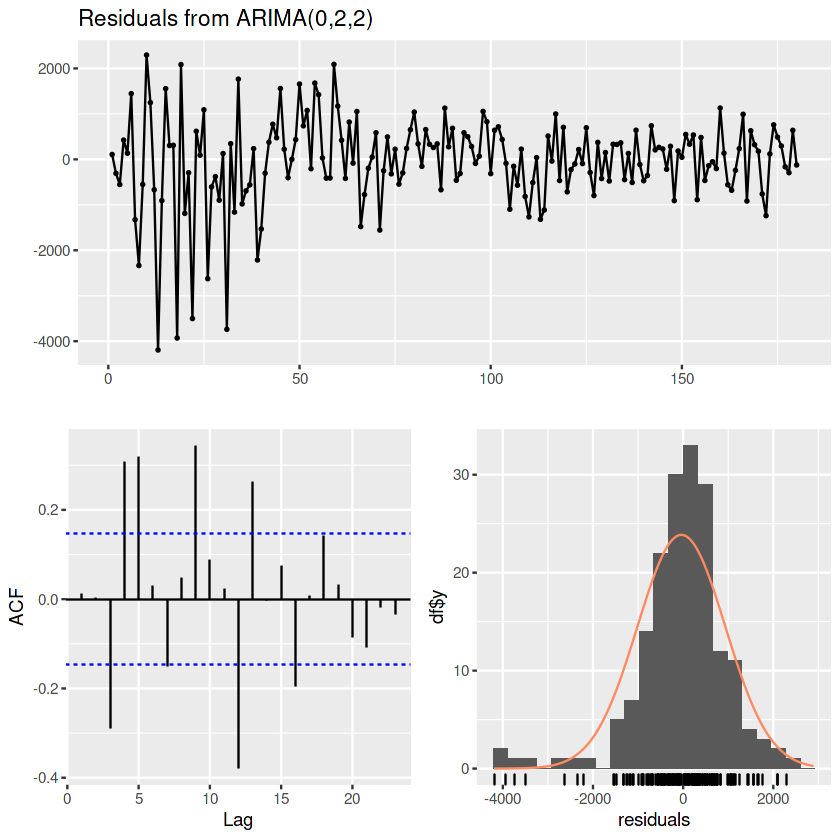

In [72]:
# ARIMA Model:
#install.packages("fpp2")
library(fpp2)

mreg.arima <- auto.arima(datBKRS[,1])
summary(mreg.arima)
checkresiduals(mreg.arima)
# Lowest RMSE of 974.69

**Models for Oakland: All-In Regression, Step-Wise Regression, Self-Selected 'Optimal' Regression, Seasonal Regression,ARIMA**

In [73]:
# MODEL 1: All-in model for Oakland:
str(datOK)
reg.OK.all <- lm(AveragePrice ~ .-Date, data = datOK)
summary(reg.OK.all)

'data.frame':	180 obs. of  16 variables:
 $ AveragePrice                               : int  442792 450062 456256 463803 471294 478663 483756 489037 493784 499869 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Population                                 : int  389937 389937 389937 389937 389937 389937 389937 389937 389937 389937 ...
 $ Employment                                 : int  1177600 1179700 1177200 1173300 1176600 1178400 1184000 1185500 1185800 1190000 ...
 $ Unemployment                               : int  67000 68300 66100 60900 57900 64300 65600 62100 60300 58800 ...
 $ UnemploymentRate                           : num  5.4 5.5 5.3 4.9 4.7 5.2 5.3 5 4.8 4.7 ...
 $ HouseholdIncome                            : int  80069 80069 80069 80069 80069 80069 80069 80069 80069 80069 ...
 $ 10YearBondRate                             : num  4.22


Call:
lm(formula = AveragePrice ~ . - Date, data = datOK)

Residuals:
   Min     1Q Median     3Q    Max 
-29235 -10165      3   9230  34919 

Coefficients: (2 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                 -1.086e+05  2.446e+05  -0.444
PoliticalParty                                      NA         NA      NA
Population                                   3.446e+00  5.793e-01   5.949
Employment                                  -3.116e-01  2.306e-01  -1.351
Unemployment                                -1.605e+00  2.310e+00  -0.695
UnemploymentRate                             6.852e+03  3.138e+04   0.218
HouseholdIncome                              7.659e+00  5.440e-01  14.079
`10YearBondRate`                             3.851e+04  5.934e+03   6.490
`30YearFixedMortgageRate`                   -1.627e+04  7.195e+03  -2.262
ViolentCrimesRate                           -2.696e+01  9.681

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2  linear dependencies found”


Reordering variables and trying again:


[1] 0.9067740 0.9216228 0.9646345 0.9797209 0.9837662 0.9851930 0.9864699
 [8] 0.9869607 0.9880723 0.9884700 0.9888781 0.9893423 0.9895020 0.9896445
[15] 0.9896733 0.9897100

(Intercept) PoliticalParty Population Employment Unemployment
1  TRUE        FALSE          FALSE      FALSE      FALSE       
2  TRUE        FALSE          FALSE      FALSE      FALSE       
3  TRUE        FALSE           TRUE      FALSE      FALSE       
4  TRUE        FALSE           TRUE      FALSE       TRUE       
5  TRUE        FALSE           TRUE      FALSE       TRUE       
6  TRUE        FALSE           TRUE      FALSE       TRUE       
7  TRUE        FALSE           TRUE      FALSE       TRUE       
8  TRUE        FALSE           TRUE      FALSE       TRUE       
9  TRUE        FALSE           TRUE      FALSE       TRUE       
10 TRUE        FALSE           TRUE      FALSE       TRUE       
11 TRUE        FALSE           TRUE      FALSE       TRUE       
12 TRUE        FALSE           TRUE      FALSE       TRUE       
13 TRUE        FALSE           TRUE      FALSE       TRUE       
14 TRUE        FALSE           TRUE      FALSE       TRUE       
15 TRUE        FALSE           TRUE      FALSE       TRUE       
16 TRUE        FALSE           TRUE      FALSE       TRUE       
   UnemploymentRate HouseholdIncome `10YearBondRate` `30YearFixedMortgageRate`
1  FALSE            TRUE            FALSE            FALSE                    
2  FALSE            TRUE             TRUE            FALSE                    
3  FALSE            TRUE             TRUE            FALSE                    
4  FALSE            TRUE             TRUE            FALSE                    
5  FALSE            TRUE             TRUE            FALSE                    
6  FALSE            TRUE             TRUE            FALSE                    
7  FALSE            TRUE             TRUE            FALSE                    
8  FALSE            TRUE             TRUE            FALSE                    
9  FALSE            TRUE             TRUE            FALSE                    
10 FALSE            TRUE             TRUE             TRUE                    
11 FALSE            TRUE             TRUE             TRUE                    
12 FALSE            TRUE             TRUE             TRUE                    
13 FALSE            TRUE             TRUE             TRUE                    
14 FALSE            TRUE             TRUE             TRUE                    
15 FALSE            TRUE             TRUE             TRUE                    
16 FALSE            TRUE             TRUE             TRUE                    
   ViolentCrimesRate ⋯ Month3 Month4 Month5 Month6 Month7 Month8 Month9 Month10
1  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
2  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
3  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
4  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
5   TRUE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
6   TRUE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
7   TRUE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
8   TRUE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
9   TRUE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
10  TRUE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
11  TRUE             ⋯ FALSE  FALSE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
12  TRUE             ⋯ FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
13  TRUE             ⋯ FALSE   TRUE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  
14  TRUE             ⋯  TRUE   TRUE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  
15  TRUE             ⋯  TRUE   TRUE   TRUE   TRUE  FALSE  FALSE   TRUE  FALSE  
16  TRUE             ⋯  TRUE   TRUE   TRUE   TRUE   TRUE  FALSE   TRUE  FALSE  
   Month11 Month12
1  FALSE   FALSE  
2  FALSE   FALSE  
3  FALSE   FALSE  
4  FALSE   FALSE  
5  FALSE   FALSE  
6  FALSE   FALSE  
7  FALSE   FALSE  
8  FALSE   FALSE  
9  FALSE    TRUE  
10 FA

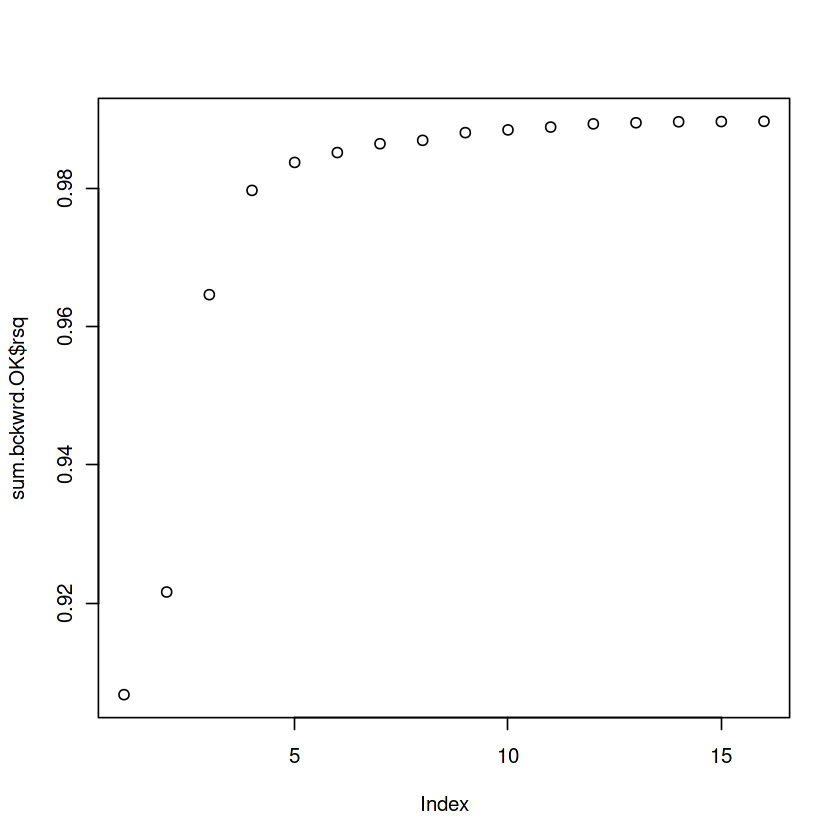

In [74]:
# Step-wise:
#install.packages("leaps")
library(leaps)
out.bckwrd.OK <- regsubsets(AveragePrice ~ . -Date, data = datOK, nvmax = 15,
                            method = "backward", really.big = T)
sum.bckwrd.OK <- summary(out.bckwrd.OK)
sum.bckwrd.OK$rsq
sum.bckwrd.OK$which
plot(sum.bckwrd.OK$rsq)

In [75]:
#Optimal model
reg.OK.all.opt <- lm(AveragePrice ~ HouseholdIncome + `10YearBondRate` 
                     + Employment, data = datOK)

summary(reg.OK.all.opt)
# R-squared = 0.9715
#
# Based on the backward step-wise model above, the 3 above variables appear to be the most significant at all alpha levels and thus were
# (subjectively) selected as the most contributable.


Call:
lm(formula = AveragePrice ~ HouseholdIncome + `10YearBondRate` + 
    Employment, data = datOK)

Residuals:
   Min     1Q Median     3Q    Max 
-71697 -13129   -307  13651  52592 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.769e+06  5.991e+04  -29.54   <2e-16 ***
HouseholdIncome   6.571e+00  4.723e-01   13.91   <2e-16 ***
`10YearBondRate`  4.321e+04  2.358e+03   18.32   <2e-16 ***
Employment        1.270e+00  7.233e-02   17.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23650 on 176 degrees of freedom
Multiple R-squared:  0.9715,	Adjusted R-squared:  0.971 
F-statistic:  2001 on 3 and 176 DF,  p-value: < 2.2e-16


In [76]:
# Optimal Model on training and test Data:
dat.OK.tr <- datOK[1:144,]
dat.OK.tst <- datOK[145:180,]
#
reg.OK.all.opt.tr <- lm(AveragePrice ~ HouseholdIncome + `10YearBondRate` 
                        + Employment, data = dat.OK.tr)
summary(reg.OK.all.opt.tr)
sum_reg.OK.tr <- summary(reg.OK.all.opt.tr)
#
#
reg.OK.all.opt.tst <- lm(AveragePrice ~ HouseholdIncome + `10YearBondRate` 
                         + Employment, 
                         data = dat.OK.tst)
summary(reg.OK.all.opt.tst)
# R Squared = 0.8761 lower but not terrible


Call:
lm(formula = AveragePrice ~ HouseholdIncome + `10YearBondRate` + 
    Employment, data = dat.OK.tr)

Residuals:
   Min     1Q Median     3Q    Max 
-72584 -12958    381  13799  52156 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.822e+06  6.928e+04 -26.302  < 2e-16 ***
HouseholdIncome   6.496e+00  7.565e-01   8.587 1.55e-14 ***
`10YearBondRate`  4.490e+04  2.664e+03  16.856  < 2e-16 ***
Employment        1.315e+00  8.544e-02  15.386  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24990 on 140 degrees of freedom
Multiple R-squared:  0.9199,	Adjusted R-squared:  0.9182 
F-statistic: 536.1 on 3 and 140 DF,  p-value: < 2.2e-16



Call:
lm(formula = AveragePrice ~ HouseholdIncome + `10YearBondRate` + 
    Employment, data = dat.OK.tst)

Residuals:
   Min     1Q Median     3Q    Max 
-31647  -7843    321   9128  22220 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.656e+06  4.057e+05  -6.547 2.25e-07 ***
HouseholdIncome   6.526e+00  9.892e-01   6.597 1.95e-07 ***
`10YearBondRate`  1.964e+04  6.337e+03   3.100  0.00402 ** 
Employment        1.970e+00  3.479e-01   5.662 2.89e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14060 on 32 degrees of freedom
Multiple R-squared:  0.8761,	Adjusted R-squared:  0.8645 
F-statistic: 75.41 on 3 and 32 DF,  p-value: 1.343e-14


In [77]:
#   First compute the MSEs/RMSEs on the test data
#    using the training models
yhat_OK.tst <- predict(reg.OK.all.opt.tr, dat.OK.tst)
MSE_OK.tst <- mean((dat.OK.tst$AveragePrice - yhat_OK.tst)^2)
RMSE_OK.tst <- MSE_OK.tst^0.5
RMSE_OK.tst
# RMSE test = 18225

[1] 18225.04

In [78]:
# RMSE Train
MSE_OK.tr <- mean(reg.OK.all.opt.tr$residuals^2)
RMSE_OK.tr <- sum_reg.OK.tr$sigma
MSE_OK.tr
MSE_OK.tst
RMSE_OK.tr
RMSE_OK.tst
# RMSE train = 24994.24

[1] 607358846

[1] 332152221

[1] 24994.24

[1] 18225.04

In [79]:
# MODEL 3: seasonal Regression:
dat.OK.ts.tr <- datOKts[1:144,]
dat.OK.ts.tst <- datOKts[145:180,]

# Run seasonal trend regression for Oakland
reg.OK.seas.tr <- lm(AveragePrice ~ Month + timetr + timetrsq, 
                     data = dat.OK.ts.tr)
summary(reg.OK.seas.tr)
# R squared for seasonal model = 0.8072 variables regression model
#
#
sum_regmnth.tr2 <- summary(reg.OK.seas.tr)


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.OK.ts.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-125954  -12361    5182   23055   62974 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 575049.15   14913.31  38.559   <2e-16 ***
Month2        1768.08   16429.63   0.108    0.914    
Month3        3066.41   16430.26   0.187    0.852    
Month4        4416.91   16431.30   0.269    0.789    
Month5        5576.74   16432.72   0.339    0.735    
Month6        6625.56   16434.53   0.403    0.688    
Month7        7378.39   16436.73   0.449    0.654    
Month8        8192.05   16439.30   0.498    0.619    
Month9        8788.86   16442.26   0.535    0.594    
Month10       9514.60   16445.61   0.579    0.564    
Month11       9883.17   16449.37   0.601    0.549    
Month12      10263.81   16453.54   0.624    0.534    
timetr       -6350.80     324.92 -19.546   <2e-16 ***
timetrsq        47.92       2.17  22.080   <2e-16 **

In [80]:
# First compute the MSEs/RMSEs on the test data
#    using the training models
reg.OK.seas.tst <- lm(AveragePrice ~ Month + timetr + timetrsq, 
                      data = dat.OK.ts.tst)
summary(reg.OK.seas.tst)
# R squared = 0.9449


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.OK.ts.tst)

Residuals:
     Min       1Q   Median       3Q      Max 
-12640.6  -8867.3    404.9   7409.5  15417.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.055e+06  5.177e+05  -7.833 8.36e-08 ***
Month2      -2.106e+03  9.236e+03  -0.228    0.822    
Month3      -2.383e+03  9.247e+03  -0.258    0.799    
Month4      -2.551e+03  9.262e+03  -0.275    0.786    
Month5      -3.413e+03  9.281e+03  -0.368    0.717    
Month6      -3.738e+03  9.301e+03  -0.402    0.692    
Month7      -3.501e+03  9.323e+03  -0.376    0.711    
Month8      -3.111e+03  9.346e+03  -0.333    0.742    
Month9      -1.903e+03  9.371e+03  -0.203    0.841    
Month10     -5.704e+02  9.400e+03  -0.061    0.952    
Month11      1.570e+03  9.432e+03   0.166    0.869    
Month12      3.786e+03  9.472e+03   0.400    0.693    
timetr       5.609e+04  6.394e+03   8.772 1.24e-08 ***
timetrsq    -1.629e+02  1.9

In [81]:
# RMSE Test
yhat_mnth.tst2 <- predict(reg.OK.seas.tr, dat.OK.ts.tst)
MSE_mnth.tst2 <- mean((dat.OK.ts.tst$AveragePrice - yhat_mnth.tst2)^2)
RMSE_mnth.tst2 <- MSE_mnth.tst2^0.5
RMSE_mnth.tst2
# RMSE for test = 105390.6

[1] 105390.6

In [82]:
# RMSE Train
MSE_mnth.tr2 <- mean(reg.OK.seas.tr$residuals^2)
RMSE_mnth.tr2 <- sum_regmnth.tr2$sigma
MSE_mnth.tr2
MSE_mnth.tst2
RMSE_mnth.tr2
# RMSE for train = 40243.69

[1] 1462098170

[1] 11107171296

[1] 40243.69

Series: datOK[, 1] 
ARIMA(1,2,2) 

Coefficients:
          ar1     ma1     ma2
      -0.8230  0.8060  0.2098
s.e.   0.0697  0.1067  0.1070

sigma^2 = 4498352:  log likelihood = -1614.59
AIC=3237.19   AICc=3237.42   BIC=3249.92

Training set error measures:
                    ME     RMSE      MAE         MPE      MAPE      MASE
Training set -5.759845 2091.267 1597.992 0.006350695 0.3286931 0.3554265
                    ACF1
Training set -0.05153924


	Ljung-Box test

data:  Residuals from ARIMA(1,2,2)
Q* = 41.407, df = 7, p-value = 6.763e-07

Model df: 3.   Total lags used: 10



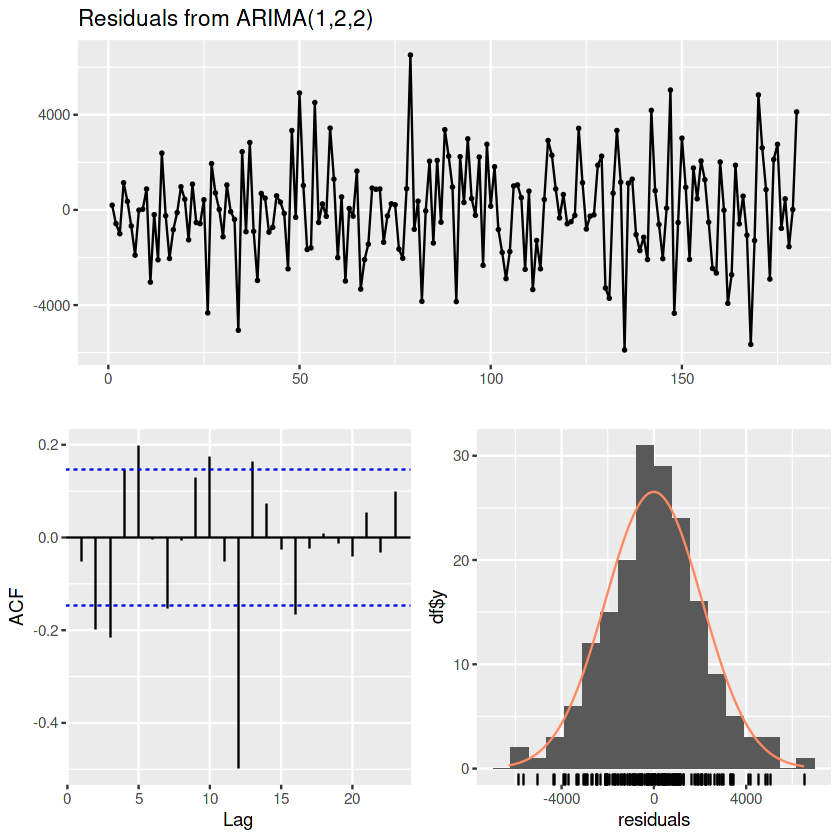

In [83]:
# ARIMA Model:
#install.packages("fpp2")
library(fpp2)

# Run Auto Arima
mreg.arima <- auto.arima(datOK[,1])
summary(mreg.arima)
checkresiduals(mreg.arima)
# Lowest RMSE = 2091.267

**Models for Sacramento: All-In Regression, Step-Wise Regression, Self-Selected 'Optimal' Regression, Seasonal Regression,ARIMA**

In [84]:
# All-in model for Sacramento:
str(datSAC)
reg.SAC.all <- lm(AveragePrice ~ .-Date, data = datSAC)
summary(reg.SAC.all)

'data.frame':	180 obs. of  16 variables:
 $ AveragePrice                               : int  297520 303255 308708 313795 318549 323557 327538 331102 335061 339326 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Population                                 : int  442662 442662 442662 442662 442662 442662 442662 442662 442662 442662 ...
 $ Employment                                 : int  952100 952300 952300 952000 957700 959700 970900 971600 970400 972800 ...
 $ Unemployment                               : int  54800 55100 53200 47600 45300 50200 50900 47600 46700 46300 ...
 $ UnemploymentRate                           : num  5.4 5.5 5.3 4.8 4.5 5 5 4.7 4.6 4.5 ...
 $ HouseholdIncome                            : int  83660 83660 83660 83660 83660 83660 83660 83660 83660 83660 ...
 $ 10YearBondRate                             : num  4.22 4.17 4.5 4.


Call:
lm(formula = AveragePrice ~ . - Date, data = datSAC)

Residuals:
   Min     1Q Median     3Q    Max 
-22960  -6101  -1112   5736  28996 

Coefficients: (2 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                  2.169e+06  5.671e+05   3.824
PoliticalParty                                      NA         NA      NA
Population                                  -1.269e+00  8.083e-01  -1.570
Employment                                   4.204e-01  2.810e-01   1.496
Unemployment                                -3.847e+00  2.365e+00  -1.627
UnemploymentRate                             2.839e+04  2.647e+04   1.072
HouseholdIncome                              3.554e+00  1.129e+00   3.149
`10YearBondRate`                             3.912e+04  4.058e+03   9.640
`30YearFixedMortgageRate`                   -3.708e+04  4.839e+03  -7.663
ViolentCrimesRate                           -8.128e+01  4.31

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2  linear dependencies found”


Reordering variables and trying again:


[1] 0.8649816 0.9099253 0.9381681 0.9583915 0.9630721 0.9654172 0.9677136
 [8] 0.9684842 0.9688344 0.9700162 0.9703518 0.9709844 0.9715611 0.9723083
[15] 0.9727318 0.9731845

(Intercept) PoliticalParty Population Employment Unemployment
1  TRUE        FALSE          FALSE      FALSE      TRUE        
2  TRUE        FALSE          FALSE      FALSE      TRUE        
3  TRUE        FALSE          FALSE      FALSE      TRUE        
4  TRUE        FALSE          FALSE      FALSE      TRUE        
5  TRUE        FALSE          FALSE      FALSE      TRUE        
6  TRUE        FALSE          FALSE      FALSE      TRUE        
7  TRUE        FALSE          FALSE      FALSE      TRUE        
8  TRUE        FALSE          FALSE       TRUE      TRUE        
9  TRUE        FALSE           TRUE       TRUE      TRUE        
10 TRUE        FALSE           TRUE       TRUE      TRUE        
11 TRUE        FALSE           TRUE       TRUE      TRUE        
12 TRUE        FALSE           TRUE       TRUE      TRUE        
13 TRUE        FALSE           TRUE       TRUE      TRUE        
14 TRUE        FALSE           TRUE       TRUE      TRUE        
15 TRUE        FALSE           TRUE       TRUE      TRUE        
16 TRUE        FALSE           TRUE       TRUE      TRUE        
   UnemploymentRate HouseholdIncome `10YearBondRate` `30YearFixedMortgageRate`
1  FALSE            FALSE           FALSE            FALSE                    
2  FALSE             TRUE           FALSE            FALSE                    
3  FALSE             TRUE            TRUE            FALSE                    
4  FALSE             TRUE            TRUE             TRUE                    
5  FALSE             TRUE            TRUE             TRUE                    
6  FALSE             TRUE            TRUE             TRUE                    
7  FALSE             TRUE            TRUE             TRUE                    
8  FALSE             TRUE            TRUE             TRUE                    
9  FALSE             TRUE            TRUE             TRUE                    
10 FALSE             TRUE            TRUE             TRUE                    
11 FALSE             TRUE            TRUE             TRUE                    
12 FALSE             TRUE            TRUE             TRUE                    
13 FALSE             TRUE            TRUE             TRUE                    
14 FALSE             TRUE            TRUE             TRUE                    
15 FALSE             TRUE            TRUE             TRUE                    
16 FALSE             TRUE            TRUE             TRUE                    
   ViolentCrimesRate ⋯ Month3 Month4 Month5 Month6 Month7 Month8 Month9 Month10
1  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
2  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
3  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
4  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
5  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
6  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
7  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
8  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
9  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
10  TRUE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
11  TRUE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
12  TRUE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE   TRUE  FALSE  FALSE  
13  TRUE             ⋯ FALSE  FALSE  FALSE  FALSE   TRUE   TRUE  FALSE  FALSE  
14  TRUE             ⋯ FALSE  FALSE  FALSE   TRUE   TRUE   TRUE  FALSE  FALSE  
15  TRUE             ⋯ FALSE  FALSE  FALSE   TRUE   TRUE   TRUE   TRUE  FALSE  
16  TRUE             ⋯ FALSE  FALSE  FALSE   TRUE   TRUE   TRUE   TRUE  FALSE  
   Month11 Month12
1  FALSE   FALSE  
2  FALSE   FALSE  
3  FALSE   FALSE  
4  FALSE   FALSE  
5  FALSE   FALSE  
6  FALSE   FALSE  
7  FALSE   FALSE  
8  FALSE   FALSE  
9  FALSE   FALSE  
10 FA

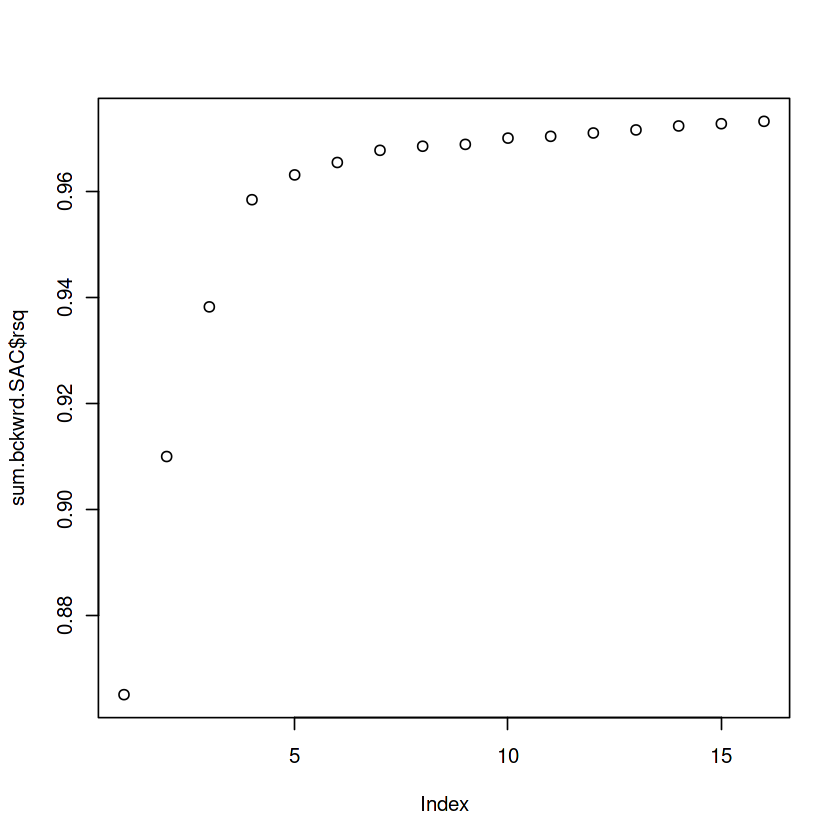

In [85]:
# Step-wise:
#install.packages("leaps")
library(leaps)

out.bckwrd.SAC <- regsubsets(AveragePrice ~ . -Date, data = datSAC, nvmax = 15,
                             method = "backward", really.big = T)
sum.bckwrd.SAC <- summary(out.bckwrd.SAC)
sum.bckwrd.SAC$rsq
sum.bckwrd.SAC$which
plot(sum.bckwrd.SAC$rsq)

In [86]:
# Optimal model
reg.SAC.all.opt <- lm(AveragePrice ~ HouseholdIncome + `10YearBondRate` 
                      + Unemployment, data = datSAC)
#
summary(reg.SAC.all.opt)
# R-squared = 0.9382
#
# Based on the backward step-wise model above, the 3 above variables appear to be the most significant at all alpha levels and thus were
# (subjectively) selected as the most contributable.


Call:
lm(formula = AveragePrice ~ HouseholdIncome + `10YearBondRate` + 
    Unemployment, data = datSAC)

Residuals:
   Min     1Q Median     3Q    Max 
-49769  -8756   1648  10891  27865 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.132e+04  3.553e+04   0.881    0.379    
HouseholdIncome   3.600e+00  3.934e-01   9.151  < 2e-16 ***
`10YearBondRate`  1.122e+04  1.252e+03   8.966 4.43e-16 ***
Unemployment     -1.406e+00  6.025e-02 -23.343  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16260 on 176 degrees of freedom
Multiple R-squared:  0.9382,	Adjusted R-squared:  0.9371 
F-statistic: 890.1 on 3 and 176 DF,  p-value: < 2.2e-16


In [87]:
# Optimal Model on training and test Data:
dat.SAC.tr <- datSAC[1:144,]
dat.SAC.tst <- datSAC[145:180,]
#
reg.SAC.all.opt.tr <- lm(AveragePrice ~ HouseholdIncome + `10YearBondRate` 
                         + Employment, data = dat.SAC.tr)
summary(reg.SAC.all.opt.tr)
sum_reg.SAC.tr <- summary(reg.SAC.all.opt.tr)
#
#
reg.SAC.all.opt.tst <- lm(AveragePrice ~ HouseholdIncome + `10YearBondRate` 
                          + Employment, 
                          data = dat.SAC.tst)
summary(reg.SAC.all.opt.tst)
# R Squared = 0.9386 -- very similar


Call:
lm(formula = AveragePrice ~ HouseholdIncome + `10YearBondRate` + 
    Employment, data = dat.SAC.tr)

Residuals:
   Min     1Q Median     3Q    Max 
-64091  -9729  -1824   9733  57259 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.308e+06  6.426e+04 -20.364   <2e-16 ***
HouseholdIncome  -1.357e+00  9.355e-01  -1.451    0.149    
`10YearBondRate`  3.660e+04  2.701e+03  13.554   <2e-16 ***
Employment        1.607e+00  1.102e-01  14.575   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22200 on 140 degrees of freedom
Multiple R-squared:  0.8681,	Adjusted R-squared:  0.8652 
F-statistic: 307.1 on 3 and 140 DF,  p-value: < 2.2e-16



Call:
lm(formula = AveragePrice ~ HouseholdIncome + `10YearBondRate` + 
    Employment, data = dat.SAC.tst)

Residuals:
    Min      1Q  Median      3Q     Max 
-7214.9 -2840.4  -704.5  2811.0 11106.5 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -6.413e+05  6.729e+04  -9.530 7.26e-11 ***
HouseholdIncome   1.079e+00  5.512e-01   1.958    0.059 .  
`10YearBondRate`  8.135e+01  1.770e+03   0.046    0.964    
Employment        8.349e-01  1.032e-01   8.086 3.11e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4183 on 32 degrees of freedom
Multiple R-squared:  0.9386,	Adjusted R-squared:  0.9329 
F-statistic: 163.1 on 3 and 32 DF,  p-value: < 2.2e-16


In [88]:
#   First compute the MSEs/RMSEs on the test data
#    using the training models
yhat_SAC.tst <- predict(reg.SAC.all.opt.tr, dat.SAC.tst)
MSE_SAC.tst <- mean((dat.SAC.tst$AveragePrice - yhat_SAC.tst)^2)
RMSE_SAC.tst <- MSE_SAC.tst^0.5
RMSE_SAC.tst
# RMSE test = 21086.34

[1] 21086.34

In [89]:
# RMSE Train
MSE_SAC.tr <- mean(reg.SAC.all.opt.tr$residuals^2)
RMSE_SAC.tr <- sum_reg.SAC.tr$sigma
MSE_SAC.tr
MSE_SAC.tst
RMSE_SAC.tr
RMSE_SAC.tst
# RMSE train = 222203.58

[1] 479304499

[1] 444633722

[1] 22203.58

[1] 21086.34

In [90]:
# MODEL 3: seasonal Regression:
dat.SAC.ts.tr <- datSACts[1:144,]
dat.SAC.ts.tst <- datSACts[145:180,]
#
#
# Run seasonal trend regression for Sacramento
reg.SAC.seas.tr <- lm(AveragePrice ~ Month + timetr + timetrsq, 
                      data = dat.SAC.ts.tr)
summary(reg.SAC.seas.tr)
# R squared for seasonal model = 0.8403 variables regression model
#
#
sum_regmnth.tr2 <- summary(reg.SAC.seas.tr)


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.SAC.ts.tr)

Residuals:
   Min     1Q Median     3Q    Max 
-88089 -13840  -3833  18894  40129 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 390796.170   9394.770  41.597   <2e-16 ***
Month2        1019.055  10349.992   0.098    0.922    
Month3        1901.892  10350.390   0.184    0.854    
Month4        2811.845  10351.041   0.272    0.786    
Month5        3592.913  10351.939   0.347    0.729    
Month6        4259.014  10353.080   0.411    0.681    
Month7        4745.480  10354.461   0.458    0.648    
Month8        5237.811  10356.084   0.506    0.614    
Month9        5688.674  10357.948   0.549    0.584    
Month10       6013.736  10360.060   0.580    0.563    
Month11       6275.247  10362.424   0.606    0.546    
Month12       6428.624  10365.051   0.620    0.536    
timetr       -5218.929    204.686 -25.497   <2e-16 ***
timetrsq        31.776      1.367  23.243   <2e

In [91]:
# First compute the MSEs/RMSEs on the test data
#    using the training models
reg.SAC.seas.tst <- lm(AveragePrice ~ Month + timetr + timetrsq, 
                       data = dat.SAC.ts.tst)
summary(reg.SAC.seas.tst)
# R squared = 0.9832


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.SAC.ts.tst)

Residuals:
    Min      1Q  Median      3Q     Max 
-3672.3 -1372.5  -518.2  1859.4  5015.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.508e+05  1.207e+05  -6.218 2.94e-06 ***
Month2       2.335e+02  2.154e+03   0.108    0.915    
Month3       2.907e+02  2.157e+03   0.135    0.894    
Month4       1.074e+02  2.160e+03   0.050    0.961    
Month5      -1.336e+02  2.165e+03  -0.062    0.951    
Month6       1.562e+02  2.169e+03   0.072    0.943    
Month7       5.954e+02  2.174e+03   0.274    0.787    
Month8       9.447e+02  2.180e+03   0.433    0.669    
Month9       1.160e+03  2.186e+03   0.531    0.601    
Month10      1.599e+03  2.192e+03   0.730    0.473    
Month11      2.099e+03  2.200e+03   0.954    0.350    
Month12      3.005e+03  2.209e+03   1.360    0.187    
timetr       1.182e+04  1.491e+03   7.926 6.88e-08 ***
timetrsq    -3.187e+01  4.587e+00  -

In [92]:
# RMSE for Test
yhat_mnth.tst2 <- predict(reg.SAC.seas.tr, dat.SAC.ts.tst)
MSE_mnth.tst2 <- mean((dat.SAC.ts.tst$AveragePrice - yhat_mnth.tst2)^2)
RMSE_mnth.tst2 <- MSE_mnth.tst2^0.5
RMSE_mnth.tst2
# RMSE for test = 74347.91

[1] 74347.91

In [93]:
# RMSE for Train
MSE_mnth.tr2 <- mean(reg.SAC.seas.tr$residuals^2)
RMSE_mnth.tr2 <- sum_regmnth.tr2$sigma
MSE_mnth.tr2
MSE_mnth.tst2
RMSE_mnth.tr2
# RMSE for train = 25351.87

[1] 580230920

[1] 5527612132

[1] 25351.87

Series: datSAC[, 1] 
ARIMA(5,2,1) 

Coefficients:
          ar1     ar2      ar3      ar4     ar5     ma1
      -0.7605  0.0998  -0.4573  -0.2384  0.2547  0.9768
s.e.   0.0737  0.0905   0.0829   0.0900  0.0733  0.0223

sigma^2 = 791636:  log likelihood = -1459.47
AIC=2932.94   AICc=2933.6   BIC=2955.21

Training set error measures:
                    ME     RMSE      MAE         MPE      MAPE      MASE
Training set -17.46788 869.7427 669.6085 0.009721886 0.2746465 0.2671723
                    ACF1
Training set -0.01837582


	Ljung-Box test

data:  Residuals from ARIMA(5,2,1)
Q* = 18.679, df = 4, p-value = 0.0009085

Model df: 6.   Total lags used: 10



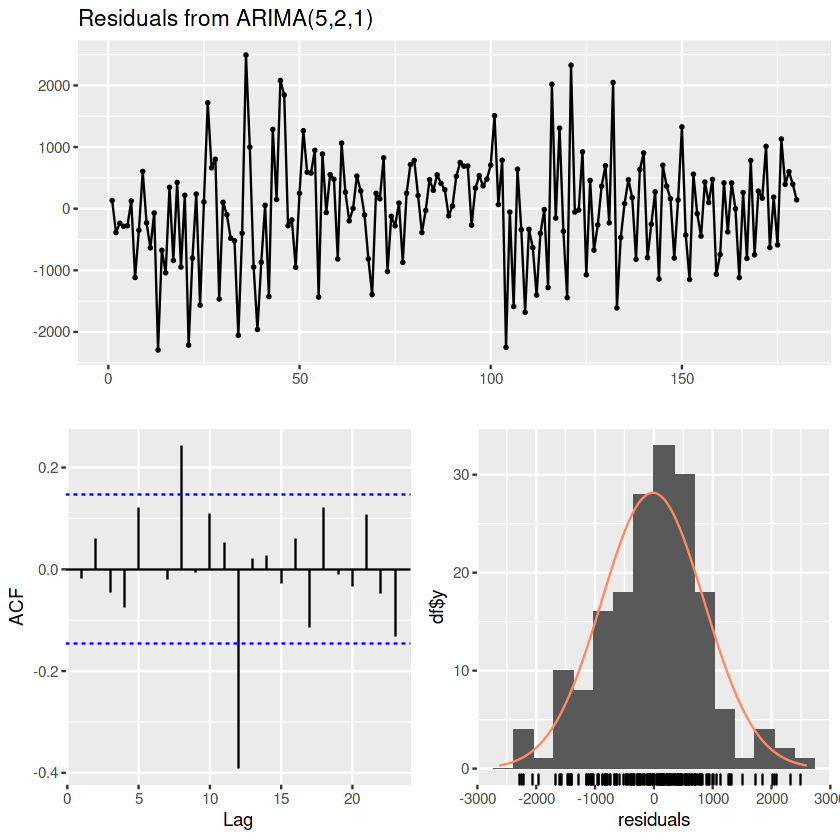

In [94]:
# ARIMA Model:

#install.packages("fpp2")
library(fpp2)

# Run Auto Arima
mreg.arima <- auto.arima(datSAC[,1])
summary(mreg.arima)
checkresiduals(mreg.arima)
# Lowest RMSE = 869.7427

**Models for Riverside: All-In Regression, Step-Wise Regression, Self-Selected 'Optimal' Regression, Seasonal Regression,ARIMA**

In [95]:
# All-in model for Riverside
str(datRV)
reg.RV.all <- lm(AveragePrice ~ .-Date, data = datRV)
summary(reg.RV.all)

'data.frame':	180 obs. of  16 variables:
 $ AveragePrice                               : int  351244 359075 364894 372936 379045 384490 389441 394564 400357 406531 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Population                                 : int  284715 284715 284715 284715 284715 284715 284715 284715 284715 284715 ...
 $ Employment                                 : int  1589700 1594900 1601000 1605400 1608500 1608400 1609500 1609300 1620300 1635100 ...
 $ Unemployment                               : int  94500 95500 92300 84900 82100 93200 97100 92700 90200 88100 ...
 $ UnemploymentRate                           : num  5.6 5.7 5.4 5 4.9 5.5 5.7 5.4 5.3 5.1 ...
 $ HouseholdIncome                            : int  66608 66608 66608 66608 66608 66608 66608 66608 66608 66608 ...
 $ 10YearBondRate                             : num  4.22


Call:
lm(formula = AveragePrice ~ . - Date, data = datRV)

Residuals:
     Min       1Q   Median       3Q      Max 
-25788.0  -5053.2    490.6   6136.4  23440.3 

Coefficients: (1 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                  3.313e+06  6.495e+05   5.102
PoliticalParty                               3.783e+04  6.873e+03   5.503
Population                                  -1.618e+00  6.668e-01  -2.426
Employment                                   4.640e-01  9.788e-02   4.740
Unemployment                                 3.490e+00  8.417e-01   4.147
UnemploymentRate                            -6.959e+04  1.623e+04  -4.288
HouseholdIncome                              9.356e-01  7.080e-01   1.322
`10YearBondRate`                             2.099e+04  3.883e+03   5.406
`30YearFixedMortgageRate`                   -9.061e+03  4.735e+03  -1.914
ViolentCrimesRate                        

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


[1] 0.8832642 0.9479077 0.9568425 0.9636462 0.9711067 0.9758823 0.9793995
 [8] 0.9826394 0.9833707 0.9837045 0.9840552 0.9841045 0.9841546 0.9842182
[15] 0.9842629

(Intercept) PoliticalParty Population Employment Unemployment
1  TRUE        FALSE          FALSE      FALSE      FALSE       
2  TRUE        FALSE          FALSE      FALSE      FALSE       
3  TRUE        FALSE          FALSE       TRUE      FALSE       
4  TRUE         TRUE          FALSE       TRUE      FALSE       
5  TRUE         TRUE          FALSE       TRUE      FALSE       
6  TRUE         TRUE          FALSE       TRUE      FALSE       
7  TRUE         TRUE          FALSE       TRUE      FALSE       
8  TRUE         TRUE          FALSE       TRUE       TRUE       
9  TRUE         TRUE          FALSE       TRUE       TRUE       
10 TRUE         TRUE           TRUE       TRUE       TRUE       
11 TRUE         TRUE           TRUE       TRUE       TRUE       
12 TRUE         TRUE           TRUE       TRUE       TRUE       
13 TRUE         TRUE           TRUE       TRUE       TRUE       
14 TRUE         TRUE           TRUE       TRUE       TRUE       
15 TRUE         TRUE           TRUE       TRUE       TRUE       
   UnemploymentRate HouseholdIncome `10YearBondRate` `30YearFixedMortgageRate`
1  TRUE             FALSE           FALSE            FALSE                    
2  TRUE             FALSE            TRUE            FALSE                    
3  TRUE             FALSE            TRUE            FALSE                    
4  TRUE             FALSE            TRUE            FALSE                    
5  TRUE             FALSE            TRUE            FALSE                    
6  TRUE             FALSE            TRUE            FALSE                    
7  TRUE             FALSE            TRUE            FALSE                    
8  TRUE             FALSE            TRUE            FALSE                    
9  TRUE             FALSE            TRUE            FALSE                    
10 TRUE             FALSE            TRUE            FALSE                    
11 TRUE             FALSE            TRUE            FALSE                    
12 TRUE             FALSE            TRUE            FALSE                    
13 TRUE             FALSE            TRUE            FALSE                    
14 TRUE             FALSE            TRUE            FALSE                    
15 TRUE             FALSE            TRUE            FALSE                    
   ViolentCrimesRate ⋯ Month3 Month4 Month5 Month6 Month7 Month8 Month9 Month10
1  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
2  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
3  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
4  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
5  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
6  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
7  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
8  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
9  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
10 FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
11 FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE   TRUE  
12 FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE   TRUE   TRUE  
13 FALSE             ⋯ FALSE  FALSE  FALSE   TRUE  FALSE  FALSE   TRUE   TRUE  
14 FALSE             ⋯ FALSE  FALSE  FALSE   TRUE   TRUE  FALSE   TRUE   TRUE  
15 FALSE             ⋯ FALSE   TRUE  FALSE   TRUE   TRUE  FALSE   TRUE   TRUE  
   Month11 Month12
1  FALSE   FALSE  
2  FALSE   FALSE  
3  FALSE   FALSE  
4  FALSE   FALSE  
5  FALSE   FALSE  
6  FALSE   FALSE  
7  FALSE   FALSE  
8  FALSE   FALSE  
9   TRUE   FALSE  
10  TRUE   FALSE  
11  TRUE   FALSE  
12  TRUE   FALSE  
13  TRUE   FALSE  
14  TRUE   FALSE  
15  TRUE   FALSE

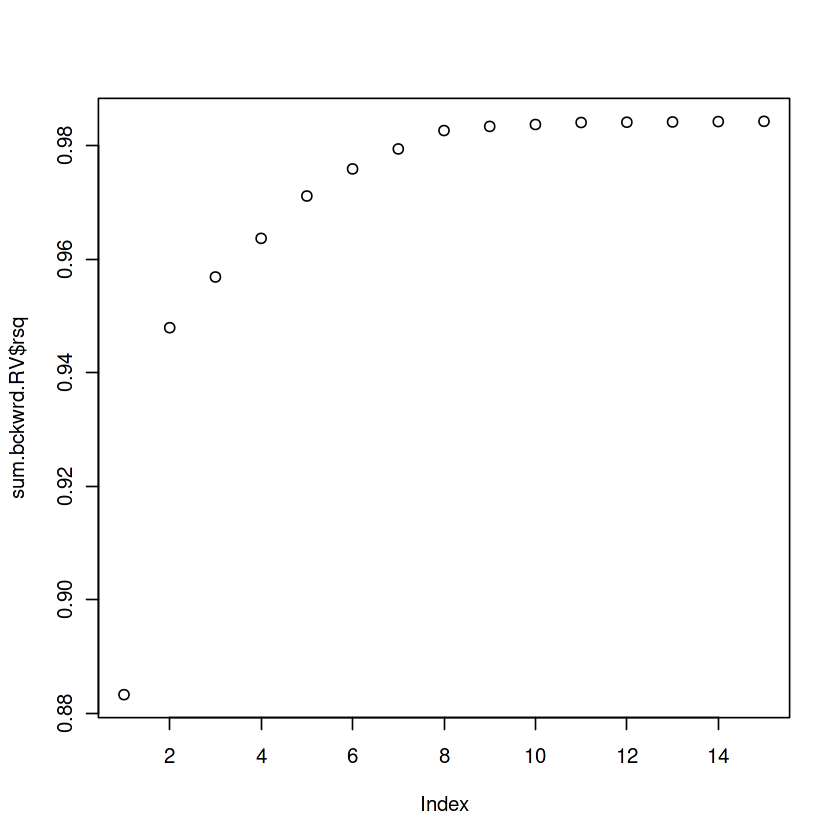

In [96]:
# Step-wise:
#install.packages("leaps")
library(leaps)
#
out.bckwrd.RV <- regsubsets(AveragePrice ~ . -Date, data = datRV, nvmax = 15,
                            method = "backward", really.big = T)

sum.bckwrd.RV <- summary(out.bckwrd.RV)
sum.bckwrd.RV$rsq
sum.bckwrd.RV$which
plot(sum.bckwrd.RV$rsq)

In [97]:
# Optimal model
reg.RV.all.opt <- lm(AveragePrice ~ UnemploymentRate + `10YearBondRate` 
                     + EducationAttainmentHighSchoolORless, data = datRV)
summary(reg.RV.all.opt)
# R-squared = 0.9488
#
# Based on the backward step-wise model above, the 3 above variables appear to be the most significant at all alpha levels and thus were
# (subjectively) selected as the most contributable.


Call:
lm(formula = AveragePrice ~ UnemploymentRate + `10YearBondRate` + 
    EducationAttainmentHighSchoolORless, data = datRV)

Residuals:
   Min     1Q Median     3Q    Max 
-49622 -11645   -986  10723  43135 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          2.486e+05  7.313e+04   3.399 0.000836 ***
UnemploymentRate                    -1.845e+04  4.409e+02 -41.846  < 2e-16 ***
`10YearBondRate`                     2.367e+04  2.288e+03  10.346  < 2e-16 ***
EducationAttainmentHighSchoolORless  1.292e+00  5.172e-01   2.499 0.013386 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16700 on 176 degrees of freedom
Multiple R-squared:  0.9497,	Adjusted R-squared:  0.9488 
F-statistic:  1107 on 3 and 176 DF,  p-value: < 2.2e-16


In [98]:
# Optimal Model on training and test Data:
dat.RV.tr <- datRV[1:144,]
dat.RV.tst <- datRV[145:180,]
#
reg.RV.all.opt.tr <- lm(AveragePrice ~ UnemploymentRate + `10YearBondRate` 
                        + EducationAttainmentHighSchoolORless, data = dat.RV.tr)
summary(reg.RV.all.opt.tr)
sum_reg.RV.tr <- summary(reg.RV.all.opt.tr)
#
#
reg.RV.all.opt.tst <- lm(AveragePrice ~ UnemploymentRate + `10YearBondRate` 
                         + EducationAttainmentHighSchoolORless, 
                         data = dat.RV.tst)
summary(reg.RV.all.opt.tst)
# R Squared = 0.6511


Call:
lm(formula = AveragePrice ~ UnemploymentRate + `10YearBondRate` + 
    EducationAttainmentHighSchoolORless, data = dat.RV.tr)

Residuals:
   Min     1Q Median     3Q    Max 
-48367  -8741  -1451  10437  33891 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          2.911e+05  8.088e+04   3.600 0.000441 ***
UnemploymentRate                    -1.748e+04  4.503e+02 -38.807  < 2e-16 ***
`10YearBondRate`                     2.531e+04  2.363e+03  10.714  < 2e-16 ***
EducationAttainmentHighSchoolORless  8.260e-01  5.863e-01   1.409 0.161147    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15890 on 140 degrees of freedom
Multiple R-squared:  0.9534,	Adjusted R-squared:  0.9524 
F-statistic: 953.9 on 3 and 140 DF,  p-value: < 2.2e-16



Call:
lm(formula = AveragePrice ~ UnemploymentRate + `10YearBondRate` + 
    EducationAttainmentHighSchoolORless, data = dat.RV.tst)

Residuals:
   Min     1Q Median     3Q    Max 
-22874  -8067   1673   7163  19232 

Coefficients: (1 not defined because of singularities)
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           523100      18229  28.696  < 2e-16 ***
UnemploymentRate                      -25094       3062  -8.196 1.83e-09 ***
`10YearBondRate`                       -3709       4466  -0.830    0.412    
EducationAttainmentHighSchoolORless       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10970 on 33 degrees of freedom
Multiple R-squared:  0.671,	Adjusted R-squared:  0.6511 
F-statistic: 33.65 on 2 and 33 DF,  p-value: 1.081e-08


In [99]:
#   First compute the MSEs/RMSEs on the test data
#    using the training models
yhat_RV.tst <- predict(reg.RV.all.opt.tr, dat.RV.tst)
MSE_RV.tst <- mean((dat.RV.tst$AveragePrice - yhat_RV.tst)^2)
RMSE_RV.tst <- MSE_RV.tst^0.5
RMSE_RV.tst
# RMSE test = 23951.69

[1] 23951.69

In [100]:
# RMSE Train
MSE_RV.tr <- mean(reg.RV.all.opt.tr$residuals^2)
RMSE_RV.tr <- sum_reg.RV.tr$sigma
MSE_RV.tr
MSE_RV.tst
RMSE_RV.tr
RMSE_RV.tst
# RMSE train = 15893.40

[1] 245583385

[1] 573683493

[1] 15893.4

[1] 23951.69

In [101]:
# seasonal Regression:
dat.RV.ts.tr <- datRVts[1:144,]
dat.RV.ts.tst <- datRVts[145:180,]

# Run seasonal trend regression for Riverside
reg.RV.seas.tr <- lm(AveragePrice ~ Month + timetr + timetrsq, 
                     data = dat.RV.ts.tr)
summary(reg.RV.seas.tr)
# R squared for seasonal model = 0.6616 < 3 variables regresison model
#
#
sum_regmnth.tr2 <- summary(reg.RV.seas.tr)


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.RV.ts.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-125676  -26274   -5148   22088   85634 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 482561.941  15697.266  30.742   <2e-16 ***
Month2        1398.288  17293.301   0.081    0.936    
Month3        2541.006  17293.964   0.147    0.883    
Month4        3636.154  17295.052   0.210    0.834    
Month5        4593.564  17296.553   0.266    0.791    
Month6        5358.654  17298.459   0.310    0.757    
Month7        6076.173  17300.768   0.351    0.726    
Month8        6704.539  17303.478   0.387    0.699    
Month9        7334.583  17306.594   0.424    0.672    
Month10       7889.391  17310.122   0.456    0.649    
Month11       8411.462  17314.073   0.486    0.628    
Month12       8769.962  17318.461   0.506    0.613    
timetr       -5676.631    342.000 -16.598   <2e-16 ***
timetrsq        34.369      2.284  15.

In [102]:
# First compute the MSEs/RMSEs on the test data
#    using the training models
reg.RV.seas.tst <- lm(AveragePrice ~ Month + timetr + timetrsq, 
                      data = dat.RV.ts.tst)
summary(reg.RV.seas.tst)
# R squared = 0.9869


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.RV.ts.tst)

Residuals:
    Min      1Q  Median      3Q     Max 
-2467.1 -1156.4  -499.7   872.2  3545.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.034e+06  9.719e+04 -10.638 3.87e-10 ***
Month2      -4.067e+02  1.734e+03  -0.235    0.817    
Month3      -2.510e+02  1.736e+03  -0.145    0.886    
Month4      -2.409e+02  1.739e+03  -0.139    0.891    
Month5      -3.657e+02  1.742e+03  -0.210    0.836    
Month6      -2.325e+02  1.746e+03  -0.133    0.895    
Month7      -3.193e+02  1.750e+03  -0.182    0.857    
Month8      -3.253e+02  1.755e+03  -0.185    0.855    
Month9      -1.406e+02  1.759e+03  -0.080    0.937    
Month10     -1.054e+01  1.765e+03  -0.006    0.995    
Month11      5.725e+01  1.771e+03   0.032    0.974    
Month12     -3.125e+01  1.778e+03  -0.018    0.986    
timetr       1.601e+04  1.200e+03  13.341 5.07e-12 ***
timetrsq    -4.402e+01  3.692e+00 -11

In [103]:
# RMSE for Test
yhat_mnth.tst2 <- predict(reg.RV.seas.tr, dat.RV.ts.tst)
MSE_mnth.tst2 <- mean((dat.RV.ts.tst$AveragePrice - yhat_mnth.tst2)^2)
RMSE_mnth.tst2 <- MSE_mnth.tst2^0.5
RMSE_mnth.tst2
# RMSE for test = 86207.64

[1] 86207.64

In [104]:
# RMSE for Train
MSE_mnth.tr2 <- mean(reg.RV.seas.tr$residuals^2)
RMSE_mnth.tr2 <- sum_regmnth.tr2$sigma
MSE_mnth.tr2
MSE_mnth.tst2
RMSE_mnth.tr2
# RMSE for train = 42359.21

[1] 1619856717

[1] 7431757701

[1] 42359.21

Series: datRV[, 1] 
ARIMA(5,2,0) 

Coefficients:
          ar1     ar2      ar3     ar4     ar5
      -0.1501  0.1585  -0.3075  0.1658  0.2132
s.e.   0.0737  0.0737   0.0710  0.0743  0.0747

sigma^2 = 1017350:  log likelihood = -1481.41
AIC=2974.82   AICc=2975.31   BIC=2993.91

Training set error measures:
                    ME    RMSE     MAE         MPE      MAPE      MASE
Training set -29.28884 988.831 787.605 0.004167138 0.2549127 0.2628914
                    ACF1
Training set 0.002633098


	Ljung-Box test

data:  Residuals from ARIMA(5,2,0)
Q* = 13.185, df = 5, p-value = 0.02171

Model df: 5.   Total lags used: 10



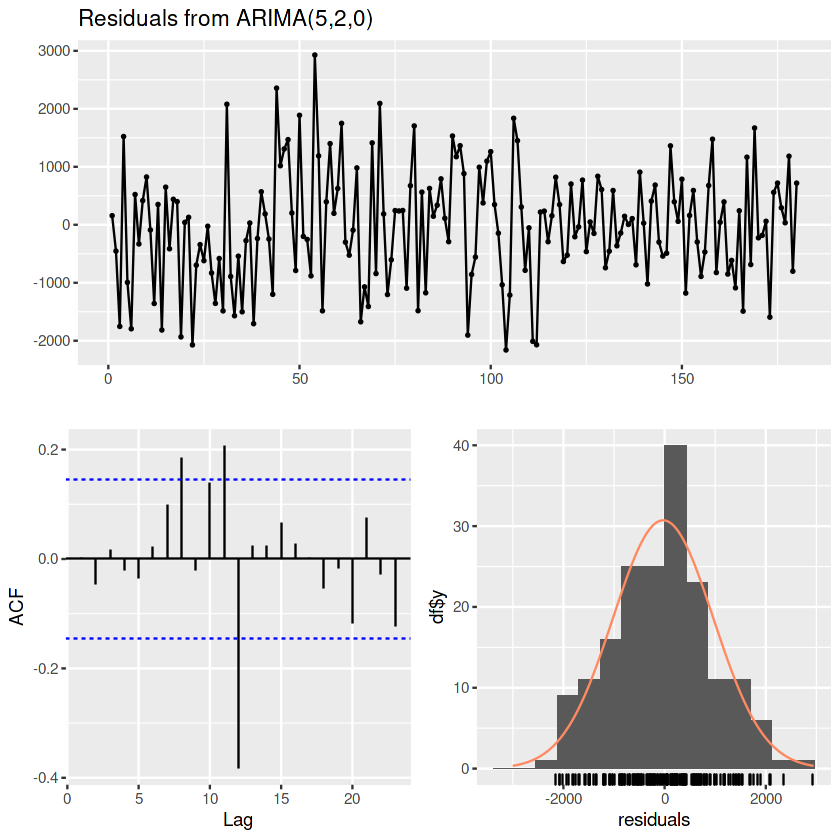

In [105]:
# ARIMA Model:

# install.packages("fpp2")
library(fpp2)
#
# Run Auto Arima
mreg.arima <- auto.arima(datRV[,1])
summary(mreg.arima)
checkresiduals(mreg.arima)
# Lowest RMSE - 988.831

**Models for Long Beach: All-In Regression, Step-Wise Regression, Self-Selected 'Optimal' Regression, Seasonal Regression,ARIMA**

In [106]:
# All-in model for Long Beach:
str(datLB)
reg.LB.all <- lm(AveragePrice ~ .-Date, data = datLB)
summary(reg.LB.all)

'data.frame':	180 obs. of  16 variables:
 $ AveragePrice                               : int  460817 469094 476397 484019 489030 495361 502600 510963 519370 528368 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Population                                 : int  470781 470781 470781 470781 470781 470781 470781 470781 470781 470781 ...
 $ Employment                                 : int  4446300 4491600 4499300 4538300 4521900 4512100 4534300 4545700 4555500 4581100 ...
 $ Unemployment                               : int  286100 282200 262900 249300 243300 253900 271000 249300 244100 234700 ...
 $ UnemploymentRate                           : num  6 5.9 5.5 5.2 5.1 5.3 5.6 5.2 5.1 4.9 ...
 $ HouseholdIncome                            : int  63316 63316 63316 63316 63316 63316 63316 63316 63316 63316 ...
 $ 10YearBondRate                             :


Call:
lm(formula = AveragePrice ~ . - Date, data = datLB)

Residuals:
   Min     1Q Median     3Q    Max 
-37008  -6650    769   8583  25235 

Coefficients: (2 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                  3.832e+06  7.092e+05   5.404
PoliticalParty                                      NA         NA      NA
Population                                  -3.138e-01  7.864e-01  -0.399
Employment                                   1.257e-02  5.410e-02   0.232
Unemployment                                 4.017e-01  5.438e-01   0.739
UnemploymentRate                            -4.026e+04  2.870e+04  -1.403
HouseholdIncome                              8.852e+00  1.149e+00   7.704
`10YearBondRate`                             4.217e+04  4.647e+03   9.074
`30YearFixedMortgageRate`                   -2.437e+04  5.914e+03  -4.121
ViolentCrimesRate                            2.132e+00  2.794

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


[1] 0.8832642 0.9479077 0.9568425 0.9636462 0.9711067 0.9758823 0.9793995
 [8] 0.9826394 0.9833707 0.9837045 0.9840552 0.9841045 0.9841546 0.9842182
[15] 0.9842629

(Intercept) PoliticalParty Population Employment Unemployment
1  TRUE        FALSE          FALSE      FALSE      FALSE       
2  TRUE        FALSE          FALSE      FALSE      FALSE       
3  TRUE        FALSE          FALSE       TRUE      FALSE       
4  TRUE         TRUE          FALSE       TRUE      FALSE       
5  TRUE         TRUE          FALSE       TRUE      FALSE       
6  TRUE         TRUE          FALSE       TRUE      FALSE       
7  TRUE         TRUE          FALSE       TRUE      FALSE       
8  TRUE         TRUE          FALSE       TRUE       TRUE       
9  TRUE         TRUE          FALSE       TRUE       TRUE       
10 TRUE         TRUE           TRUE       TRUE       TRUE       
11 TRUE         TRUE           TRUE       TRUE       TRUE       
12 TRUE         TRUE           TRUE       TRUE       TRUE       
13 TRUE         TRUE           TRUE       TRUE       TRUE       
14 TRUE         TRUE           TRUE       TRUE       TRUE       
15 TRUE         TRUE           TRUE       TRUE       TRUE       
   UnemploymentRate HouseholdIncome `10YearBondRate` `30YearFixedMortgageRate`
1  TRUE             FALSE           FALSE            FALSE                    
2  TRUE             FALSE            TRUE            FALSE                    
3  TRUE             FALSE            TRUE            FALSE                    
4  TRUE             FALSE            TRUE            FALSE                    
5  TRUE             FALSE            TRUE            FALSE                    
6  TRUE             FALSE            TRUE            FALSE                    
7  TRUE             FALSE            TRUE            FALSE                    
8  TRUE             FALSE            TRUE            FALSE                    
9  TRUE             FALSE            TRUE            FALSE                    
10 TRUE             FALSE            TRUE            FALSE                    
11 TRUE             FALSE            TRUE            FALSE                    
12 TRUE             FALSE            TRUE            FALSE                    
13 TRUE             FALSE            TRUE            FALSE                    
14 TRUE             FALSE            TRUE            FALSE                    
15 TRUE             FALSE            TRUE            FALSE                    
   ViolentCrimesRate ⋯ Month3 Month4 Month5 Month6 Month7 Month8 Month9 Month10
1  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
2  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
3  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
4  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
5  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
6  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
7  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
8  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
9  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
10 FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
11 FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE   TRUE  
12 FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE   TRUE   TRUE  
13 FALSE             ⋯ FALSE  FALSE  FALSE   TRUE  FALSE  FALSE   TRUE   TRUE  
14 FALSE             ⋯ FALSE  FALSE  FALSE   TRUE   TRUE  FALSE   TRUE   TRUE  
15 FALSE             ⋯ FALSE   TRUE  FALSE   TRUE   TRUE  FALSE   TRUE   TRUE  
   Month11 Month12
1  FALSE   FALSE  
2  FALSE   FALSE  
3  FALSE   FALSE  
4  FALSE   FALSE  
5  FALSE   FALSE  
6  FALSE   FALSE  
7  FALSE   FALSE  
8  FALSE   FALSE  
9   TRUE   FALSE  
10  TRUE   FALSE  
11  TRUE   FALSE  
12  TRUE   FALSE  
13  TRUE   FALSE  
14  TRUE   FALSE  
15  TRUE   FALSE

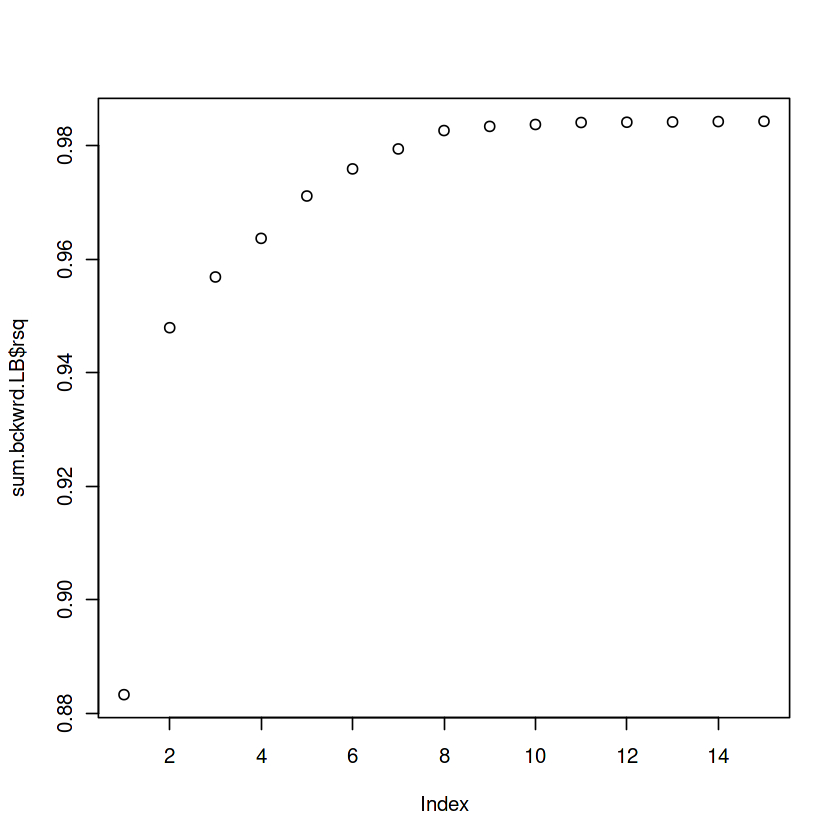

In [107]:
# Step-wise:
#install.packages("leaps")
library(leaps)
#
out.bckwrd.LB <- regsubsets(AveragePrice ~ . -Date, data = datRV, nvmax = 15,
                            method = "backward", really.big = T)
#
#
sum.bckwrd.LB <- summary(out.bckwrd.LB)
sum.bckwrd.LB$rsq
sum.bckwrd.LB$which
plot(sum.bckwrd.LB$rsq)

In [108]:
# Optimal model
reg.LB.all.opt <- lm(AveragePrice ~ UnemploymentRate + `10YearBondRate` 
                     + EducationAttainmentHighSchoolORless, data = datLB)
#
summary(reg.LB.all.opt)
# R-squared = 0.8895
#
# Based on the backward step-wise model above, the 3 above variables appear to be the most significant at all alpha levels and thus were
# (subjectively) selected as the most contributable.


Call:
lm(formula = AveragePrice ~ UnemploymentRate + `10YearBondRate` + 
    EducationAttainmentHighSchoolORless, data = datLB)

Residuals:
   Min     1Q Median     3Q    Max 
-59986 -20300  -1474  19660  64594 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          2.514e+06  5.146e+05   4.885 2.31e-06 ***
UnemploymentRate                    -2.619e+04  7.519e+02 -34.835  < 2e-16 ***
`10YearBondRate`                     1.108e+04  2.939e+03   3.771 0.000222 ***
EducationAttainmentHighSchoolORless -1.029e+01  2.855e+00  -3.604 0.000408 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26950 on 176 degrees of freedom
Multiple R-squared:  0.8914,	Adjusted R-squared:  0.8895 
F-statistic: 481.5 on 3 and 176 DF,  p-value: < 2.2e-16


In [109]:
# Optimal Model on training and test Data:
dat.LB.tr <- datLB[1:144,]
dat.LB.tst <- datLB[145:180,]
#
reg.LB.all.opt.tr <- lm(AveragePrice ~ UnemploymentRate + `10YearBondRate` 
                        + EducationAttainmentHighSchoolORless, data = dat.LB.tr)
summary(reg.LB.all.opt.tr)
sum_reg.LB.tr <- summary(reg.LB.all.opt.tr)


Call:
lm(formula = AveragePrice ~ UnemploymentRate + `10YearBondRate` + 
    EducationAttainmentHighSchoolORless, data = dat.LB.tr)

Residuals:
   Min     1Q Median     3Q    Max 
-53438 -13526   3301  12636  37910 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          1.735e+06  3.821e+05   4.541 1.20e-05 ***
UnemploymentRate                    -2.140e+04  6.632e+02 -32.265  < 2e-16 ***
`10YearBondRate`                     1.720e+04  2.227e+03   7.724 1.96e-12 ***
EducationAttainmentHighSchoolORless -6.365e+00  2.116e+00  -3.008  0.00312 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19300 on 140 degrees of freedom
Multiple R-squared:  0.9244,	Adjusted R-squared:  0.9228 
F-statistic: 570.9 on 3 and 140 DF,  p-value: < 2.2e-16


In [110]:
reg.LB.all.opt.tst <- lm(AveragePrice ~ UnemploymentRate + `10YearBondRate` 
                         + EducationAttainmentHighSchoolORless, 
                         data = dat.LB.tst)
summary(reg.LB.all.opt.tst)
# R Squared = 0.0791, REALLY LOW!!


Call:
lm(formula = AveragePrice ~ UnemploymentRate + `10YearBondRate` + 
    EducationAttainmentHighSchoolORless, data = dat.LB.tst)

Residuals:
   Min     1Q Median     3Q    Max 
-43275 -15691   1486  16075  28060 

Coefficients: (1 not defined because of singularities)
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           685520      54997  12.465 4.97e-14 ***
UnemploymentRate                      -23368      10533  -2.219   0.0335 *  
`10YearBondRate`                        2064       9018   0.229   0.8204    
EducationAttainmentHighSchoolORless       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22170 on 33 degrees of freedom
Multiple R-squared:  0.1321,	Adjusted R-squared:  0.07951 
F-statistic: 2.512 on 2 and 33 DF,  p-value: 0.09653


In [111]:
#   First compute the MSEs/RMSEs on the test data
#    using the training models
yhat_LB.tst <- predict(reg.LB.all.opt.tr, dat.LB.tst)
MSE_LB.tst <- mean((dat.LB.tst$AveragePrice - yhat_LB.tst)^2)
RMSE_LB.tst <- MSE_LB.tst^0.5
RMSE_LB.tst
# RMSE test = 62058.7

[1] 62058.7

In [112]:
# RMSE for Train
MSE_LB.tr <- mean(reg.LB.all.opt.tr$residuals^2)
RMSE_LB.tr <- sum_reg.LB.tr$sigma
MSE_LB.tr
MSE_LB.tst
RMSE_LB.tr
RMSE_LB.tst
# RMSE train = 19297.5

[1] 362049214

[1] 3851282490

[1] 19297.5

[1] 62058.7

In [113]:
# MODEL 3: seasonal Regression:
dat.LB.ts.tr <- datLBts[1:144,]
dat.LB.ts.tst <- datLBts[145:180,]
#
#
# Run seasonal trend regression for Riverside
reg.LB.seas.tr <- lm(AveragePrice ~ Month + timetr + timetrsq, 
                     data = dat.LB.ts.tr)
summary(reg.LB.seas.tr)
# R squared for seasonal model = 0.6475 < 3 variables regression model


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.LB.ts.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-133592  -25758   -2579   21852   80579 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 599749.179  16029.012  37.416   <2e-16 ***
Month2        1516.215  17658.778   0.086    0.932    
Month3        2839.176  17659.455   0.161    0.873    
Month4        4099.300  17660.566   0.232    0.817    
Month5        5126.587  17662.099   0.290    0.772    
Month6        6141.870  17664.045   0.348    0.729    
Month7        7002.150  17666.403   0.396    0.692    
Month8        7892.342  17669.171   0.447    0.656    
Month9        8634.781  17672.352   0.489    0.626    
Month10       9403.217  17675.955   0.532    0.596    
Month11       9986.148  17679.989   0.565    0.573    
Month12      10532.659  17684.470   0.596    0.552    
timetr       -5374.212    349.228 -15.389   <2e-16 ***
timetrsq        34.002      2.333  14.

In [114]:
# First compute the MSEs/RMSEs on the test data
#    using the training models
reg.LB.seas.tst <- lm(AveragePrice ~ Month + timetr + timetrsq, 
                      data = dat.LB.ts.tst)
summary(reg.LB.seas.tst)
# R squared = 0.9749


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.LB.ts.tst)

Residuals:
    Min      1Q  Median      3Q     Max 
-5420.0 -3260.9  -683.2  2568.0  6956.0 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.727e+06  2.114e+05  -8.167 4.18e-08 ***
Month2      -1.040e+03  3.772e+03  -0.276    0.785    
Month3      -1.518e+03  3.776e+03  -0.402    0.692    
Month4      -2.455e+03  3.782e+03  -0.649    0.523    
Month5      -2.688e+03  3.790e+03  -0.709    0.486    
Month6      -2.826e+03  3.798e+03  -0.744    0.465    
Month7      -2.364e+03  3.807e+03  -0.621    0.541    
Month8      -1.904e+03  3.816e+03  -0.499    0.623    
Month9      -1.437e+03  3.827e+03  -0.376    0.711    
Month10     -8.566e+02  3.838e+03  -0.223    0.825    
Month11      5.195e+02  3.852e+03   0.135    0.894    
Month12      2.155e+03  3.868e+03   0.557    0.583    
timetr       2.649e+04  2.611e+03  10.145 9.28e-10 ***
timetrsq    -7.525e+01  8.030e+00  -9

In [115]:
# RMSE for Test
yhat_mnth.tst2 <- predict(reg.LB.seas.tr, dat.LB.ts.tst)
MSE_mnth.tst2 <- mean((dat.LB.ts.tst$AveragePrice - yhat_mnth.tst2)^2)
RMSE_mnth.tst2 <- MSE_mnth.tst2^0.5
RMSE_mnth.tst2
# RMSE for test = 66513.46

[1] 66513.46

In [116]:
# RMSE for Train
MSE_mnth.tr2 <- mean(reg.LB.seas.tr$residuals^2)
RMSE_mnth.tr2 <- sum_regmnth.tr2$sigma
MSE_mnth.tr2
MSE_mnth.tst2
RMSE_mnth.tr2
# RMSE for train = 43254.43

[1] 1689048392

[1] 4424040827

[1] 42359.21

Series: datLB[, 1] 
ARIMA(5,2,2) 

Coefficients:
          ar1     ar2      ar3      ar4     ar5     ma1      ma2
      -0.7163  0.2704  -0.3004  -0.0573  0.3457  0.8014  -0.1799
s.e.   0.2591  0.2659   0.0873   0.1068  0.1096  0.2777   0.2764

sigma^2 = 1733104:  log likelihood = -1528.59
AIC=3073.19   AICc=3074.04   BIC=3098.64

Training set error measures:
                    ME    RMSE      MAE         MPE      MAPE      MASE
Training set -22.90422 1283.14 1003.318 0.002152044 0.2194829 0.2846474
                    ACF1
Training set 0.002162651


	Ljung-Box test

data:  Residuals from ARIMA(5,2,2)
Q* = 11.003, df = 3, p-value = 0.01171

Model df: 7.   Total lags used: 10



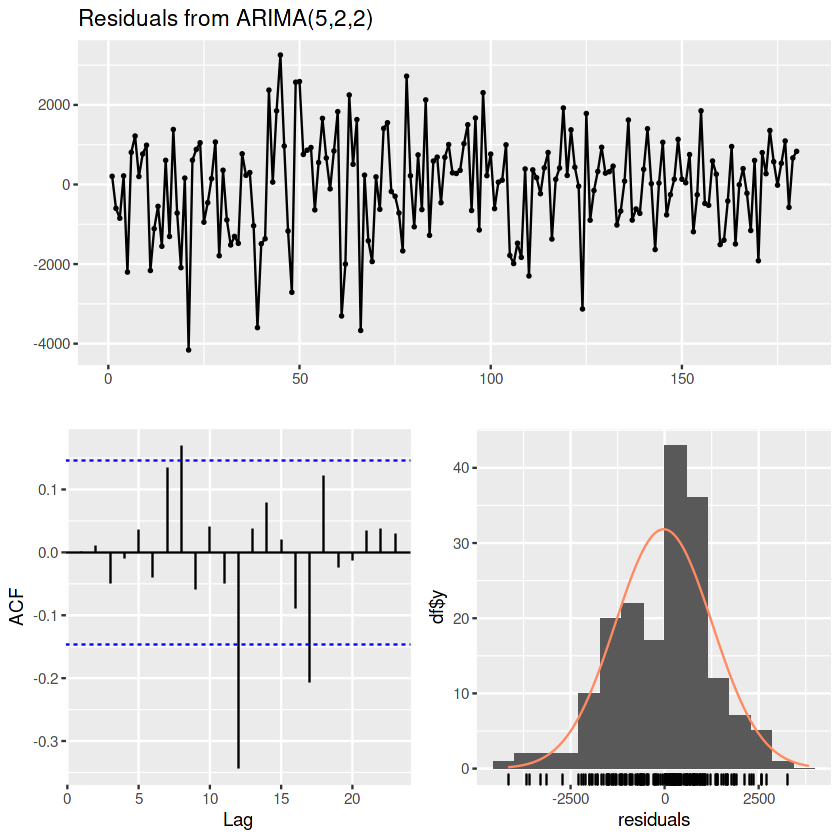

In [117]:
# ARIMA Model:

#install.packages("fpp2")
library(fpp2)
#
# Run Auto Arima
mreg.arima <- auto.arima(datLB[,1])
summary(mreg.arima)
checkresiduals(mreg.arima)
# RMSE = 1283.14

**Models for San Diego: All-In Regression, Step-Wise Regression, Self-Selected 'Optimal' Regression, Seasonal Regression,ARIMA**

In [118]:
# All-in model for SD:
str(datSD)
reg.SD.all <- lm(AveragePrice ~ .-Date, data = datSD)
summary(reg.SD.all)

'data.frame':	180 obs. of  16 variables:
 $ AveragePrice                               : int  558599 564291 570430 576744 581871 582852 583472 584827 585364 584944 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Population                                 : int  1261035 1261035 1261035 1261035 1261035 1261035 1261035 1261035 1261035 1261035 ...
 $ Employment                                 : int  1415500 1418700 1417400 1419300 1424000 1425800 1430000 1433500 1430500 1431400 ...
 $ Unemployment                               : int  67400 68100 66600 61200 59100 67200 68200 64200 62900 62500 ...
 $ UnemploymentRate                           : num  4.5 4.6 4.5 4.1 4 4.5 4.6 4.3 4.2 4.2 ...
 $ HouseholdIncome                            : int  73929 73929 73929 73929 73929 73929 73929 73929 73929 73929 ...
 $ 10YearBondRate                             :


Call:
lm(formula = AveragePrice ~ . - Date, data = datSD)

Residuals:
   Min     1Q Median     3Q    Max 
-21224  -7574  -1709   8063  28520 

Coefficients: (1 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                 -2.640e+05  3.580e+05  -0.738
PoliticalParty                               2.387e+04  7.386e+03   3.232
Population                                   1.558e+00  1.561e-01   9.983
Employment                                  -7.943e-01  1.729e-01  -4.595
Unemployment                                -2.318e+00  1.631e+00  -1.422
UnemploymentRate                             1.109e+04  2.658e+04   0.417
HouseholdIncome                              3.611e+00  6.364e-01   5.673
`10YearBondRate`                             3.191e+04  5.030e+03   6.344
`30YearFixedMortgageRate`                   -2.182e+04  6.183e+03  -3.529
ViolentCrimesRate                            7.082e+01  9.631

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


[1] 0.8585454 0.8937911 0.9315017 0.9530903 0.9672807 0.9687581 0.9716115
 [8] 0.9734486 0.9754012 0.9763006 0.9772433 0.9784915 0.9793320 0.9823543
[15] 0.9836754

(Intercept) PoliticalParty Population Employment Unemployment
1  TRUE        FALSE          FALSE      FALSE      TRUE        
2  TRUE        FALSE           TRUE      FALSE      TRUE        
3  TRUE        FALSE           TRUE      FALSE      TRUE        
4  TRUE        FALSE           TRUE      FALSE      TRUE        
5  TRUE        FALSE           TRUE      FALSE      TRUE        
6  TRUE        FALSE           TRUE      FALSE      TRUE        
7  TRUE        FALSE           TRUE       TRUE      TRUE        
8  TRUE        FALSE           TRUE       TRUE      TRUE        
9  TRUE        FALSE           TRUE       TRUE      TRUE        
10 TRUE        FALSE           TRUE       TRUE      TRUE        
11 TRUE        FALSE           TRUE       TRUE      TRUE        
12 TRUE        FALSE           TRUE       TRUE      TRUE        
13 TRUE        FALSE           TRUE       TRUE      TRUE        
14 TRUE        FALSE           TRUE       TRUE      TRUE        
15 TRUE         TRUE           TRUE       TRUE      TRUE        
   UnemploymentRate HouseholdIncome `10YearBondRate` `30YearFixedMortgageRate`
1  FALSE            FALSE           FALSE            FALSE                    
2  FALSE            FALSE           FALSE            FALSE                    
3  FALSE            FALSE           FALSE            FALSE                    
4  FALSE            FALSE            TRUE            FALSE                    
5  FALSE            FALSE            TRUE             TRUE                    
6  FALSE             TRUE            TRUE             TRUE                    
7  FALSE             TRUE            TRUE             TRUE                    
8  FALSE             TRUE            TRUE             TRUE                    
9  FALSE             TRUE            TRUE             TRUE                    
10 FALSE             TRUE            TRUE             TRUE                    
11 FALSE             TRUE            TRUE             TRUE                    
12 FALSE             TRUE            TRUE             TRUE                    
13 FALSE             TRUE            TRUE             TRUE                    
14 FALSE             TRUE            TRUE             TRUE                    
15 FALSE             TRUE            TRUE             TRUE                    
   ViolentCrimesRate ⋯ Month3 Month4 Month5 Month6 Month7 Month8 Month9 Month10
1  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
2  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
3  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
4  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
5  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
6  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
7  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
8  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE   TRUE  FALSE  FALSE  FALSE  
9  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE   TRUE   TRUE  FALSE  FALSE  
10 FALSE             ⋯ FALSE  FALSE  FALSE  FALSE   TRUE   TRUE  FALSE  FALSE  
11 FALSE             ⋯ FALSE  FALSE  FALSE  FALSE   TRUE   TRUE  FALSE   TRUE  
12 FALSE             ⋯ FALSE  FALSE  FALSE  FALSE   TRUE   TRUE   TRUE   TRUE  
13 FALSE             ⋯ FALSE  FALSE  FALSE   TRUE   TRUE   TRUE   TRUE   TRUE  
14 FALSE             ⋯ FALSE  FALSE  FALSE   TRUE   TRUE   TRUE   TRUE   TRUE  
15 FALSE             ⋯ FALSE  FALSE  FALSE   TRUE   TRUE   TRUE   TRUE   TRUE  
   Month11 Month12
1  FALSE   FALSE  
2  FALSE   FALSE  
3  FALSE   FALSE  
4  FALSE   FALSE  
5  FALSE   FALSE  
6  FALSE   FALSE  
7  FALSE   FALSE  
8  FALSE   FALSE  
9  FALSE   FALSE  
10  TRUE   FALSE  
11  TRUE   FALSE  
12  TRUE   FALSE  
13  TRUE   FALSE  
14  TRUE   FALSE  
15  TRUE   FALSE

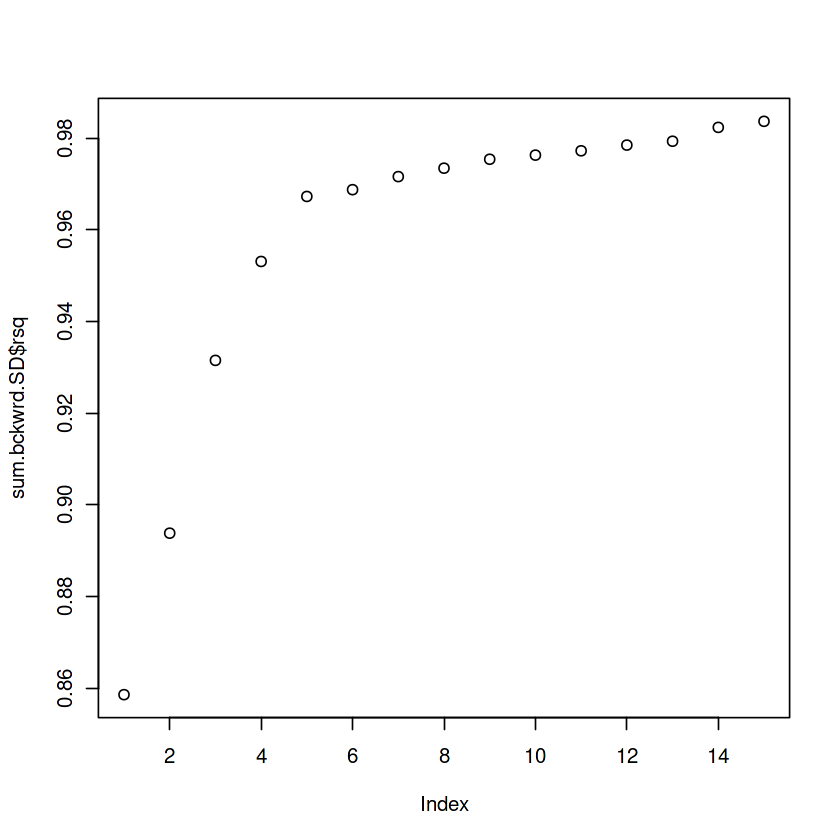

In [119]:
# Step-wise:
#install.packages("leaps")
library(leaps)

out.bckwrd.SD <- regsubsets(AveragePrice ~ . -Date, data = datSD, nvmax = 15,
                            method = "backward", really.big = T)


sum.bckwrd.SD <- summary(out.bckwrd.SD)
sum.bckwrd.SD$rsq
sum.bckwrd.SD$which
plot(sum.bckwrd.SD$rsq)

In [120]:
# Optimal Model for SD:
reg.SD.all.opt <- lm(AveragePrice ~ +Population +Unemployment +RenterPercent, data = datSD)
summary(reg.SD.all.opt)

# Based on the backward step-wise model above, the 3 above variables appear to be the most significant at all alpha levels and thus were
# (subjectively) selected as the most contributable.


Call:
lm(formula = AveragePrice ~ +Population + Unemployment + RenterPercent, 
    data = datSD)

Residuals:
   Min     1Q Median     3Q    Max 
-60540 -13712   3107  15078  47405 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.008e+05  4.338e+04   6.934 7.47e-11 ***
Population     9.459e-01  7.285e-02  12.985  < 2e-16 ***
Unemployment  -1.334e+00  6.413e-02 -20.793  < 2e-16 ***
RenterPercent -2.011e+06  2.043e+05  -9.843  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22270 on 176 degrees of freedom
Multiple R-squared:  0.9315,	Adjusted R-squared:  0.9303 
F-statistic: 797.8 on 3 and 176 DF,  p-value: < 2.2e-16


In [121]:
# Optimal Model w/ Training / Test Data:
dat.SD.tr <- datSD[1:144,]
dat.SD.tst <- datSD[145:180,]

reg.SD.all.opt.tr <- lm(AveragePrice ~ +Population +Unemployment +RenterPercent, data = dat.SD.tr)
summary(reg.SD.all.opt.tr)

sum_regmnth.tr <- summary(reg.SD.all.opt.tr)

reg.SD.all.opt.tst <- lm(AveragePrice ~ +Population +Unemployment +RenterPercent, data = dat.SD.tst)
summary(reg.SD.all.opt.tst)

yhat_mnth.tst <- predict(reg.SD.all.opt.tr, dat.SD.tst)
MSE_mnth.tst <- mean((dat.SD.tst$AveragePrice - yhat_mnth.tst)^2)
RMSE_mnth.tst <- MSE_mnth.tst^0.5
RMSE_mnth.tst

MSE_mnth.tr <- mean(reg.SD.all.opt.tr$residuals^2)
RMSE_mnth.tr <- sum_regmnth.tr$sigma
MSE_mnth.tr
MSE_mnth.tst
RMSE_mnth.tr
RMSE_mnth.tst


Call:
lm(formula = AveragePrice ~ +Population + Unemployment + RenterPercent, 
    data = dat.SD.tr)

Residuals:
   Min     1Q Median     3Q    Max 
-58813 -15418   3018  16631  46111 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.204e+05  8.080e+04   5.203 6.83e-07 ***
Population     6.632e-01  1.799e-01   3.687 0.000323 ***
Unemployment  -1.393e+00  7.899e-02 -17.640  < 2e-16 ***
RenterPercent -1.444e+06  3.975e+05  -3.633 0.000392 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23930 on 140 degrees of freedom
Multiple R-squared:  0.8777,	Adjusted R-squared:  0.8751 
F-statistic: 334.9 on 3 and 140 DF,  p-value: < 2.2e-16



Call:
lm(formula = AveragePrice ~ +Population + Unemployment + RenterPercent, 
    data = dat.SD.tst)

Residuals:
   Min     1Q Median     3Q    Max 
-14795  -7167   2423   5786  12088 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.040e+06  4.440e+05  -4.594 6.44e-05 ***
Population     1.918e+00  2.321e-01   8.262 1.94e-09 ***
Unemployment  -1.151e+00  2.822e-01  -4.077 0.000282 ***
RenterPercent  4.961e+04  4.941e+05   0.100 0.920650    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8669 on 32 degrees of freedom
Multiple R-squared:  0.8966,	Adjusted R-squared:  0.8869 
F-statistic: 92.51 on 3 and 32 DF,  p-value: 7.476e-16


[1] 25353.98

[1] 556807893

[1] 642824508

[1] 23931.5

[1] 25353.98

In [122]:
# Optimal Model Training v. Test RMSE (%):
25353.98 - 23931.5 / 23931.5 # 5.94% increase in RMSE!

[1] 25352.98

In [123]:
# seasonal Regression:
dat.SD.ts.tr <- datSDts[1:144,]
dat.SD.ts.tst <- datSDts[145:180,]

reg.SD.seas.tr <- lm(AveragePrice ~ Month + timetr + timetrsq, data = dat.SD.ts.tr)
summary(reg.SD.seas.tr)

sum_regmnth.tr2 <- summary(reg.SD.seas.tr)

reg.SD.seas.tst <- lm(AveragePrice ~ Month + timetr + timetrsq, data = dat.SD.ts.tst)
summary(reg.SD.seas.tst)

yhat_mnth.tst2 <- predict(reg.SD.seas.tr, dat.SD.ts.tst)
MSE_mnth.tst2 <- mean((dat.SD.ts.tst$AveragePrice - yhat_mnth.tst2)^2)
RMSE_mnth.tst2 <- MSE_mnth.tst2^0.5
RMSE_mnth.tst2

MSE_mnth.tr2 <- mean(reg.SD.seas.tr$residuals^2)
RMSE_mnth.tr2 <- sum_regmnth.tr2$sigma
MSE_mnth.tr2
MSE_mnth.tst2
RMSE_mnth.tr2
RMSE_mnth.tst2


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.SD.ts.tr)

Residuals:
   Min     1Q Median     3Q    Max 
-78628 -21804   -431  21730  47540 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 643213.620  10124.196  63.532   <2e-16 ***
Month2        1065.348  11153.583   0.096    0.924    
Month3        1805.201  11154.011   0.162    0.872    
Month4        2402.644  11154.713   0.215    0.830    
Month5        2964.009  11155.681   0.266    0.791    
Month6        3330.464  11156.911   0.299    0.766    
Month7        3443.507  11158.399   0.309    0.758    
Month8        3737.224  11160.148   0.335    0.738    
Month9        3891.112  11162.157   0.349    0.728    
Month10       3986.424  11164.433   0.357    0.722    
Month11       4032.741  11166.981   0.361    0.719    
Month12       4101.647  11169.811   0.367    0.714    
timetr       -6026.118    220.578 -27.320   <2e-16 ***
timetrsq        39.497      1.473  26.809   <2e-


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.SD.ts.tst)

Residuals:
    Min      1Q  Median      3Q     Max 
-8405.1 -3155.4  -268.9  1903.3 10609.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.907e+06  2.537e+05  -7.515 1.64e-07 ***
Month2      -2.606e+02  4.526e+03  -0.058    0.955    
Month3      -3.049e+02  4.531e+03  -0.067    0.947    
Month4       1.148e+02  4.539e+03   0.025    0.980    
Month5       8.652e+01  4.548e+03   0.019    0.985    
Month6       2.554e+01  4.558e+03   0.006    0.996    
Month7       3.529e+02  4.569e+03   0.077    0.939    
Month8       3.995e+02  4.580e+03   0.087    0.931    
Month9       9.582e+02  4.592e+03   0.209    0.837    
Month10      1.870e+03  4.606e+03   0.406    0.689    
Month11      3.031e+03  4.622e+03   0.656    0.519    
Month12      4.454e+03  4.641e+03   0.960    0.348    
timetr       2.906e+04  3.133e+03   9.274 4.67e-09 ***
timetrsq    -8.249e+01  9.636e+00  -8

[1] 98305.86

[1] 673828917

[1] 9664042741

[1] 27320.23

[1] 98305.86

In [124]:
# Seasonal Regression Model Training v. Test RMSE (%):
98305.86 - 27320.23 / 27320.23 # 259.82% increase in RMSE!

[1] 98304.86

Series: datSD[, 1] 
ARIMA(4,2,2) 

Coefficients:
          ar1      ar2      ar3     ar4      ma1     ma2
      -0.0995  -0.7449  -0.3780  0.0733  -0.0668  0.9580
s.e.   0.0800   0.0733   0.0718  0.0789   0.0291  0.0447

sigma^2 = 3270894:  log likelihood = -1586.19
AIC=3186.37   AICc=3187.03   BIC=3208.65

Training set error measures:
                    ME     RMSE      MAE         MPE     MAPE    MASE
Training set -16.64024 1767.914 1370.146 0.003357842 0.273085 0.40655
                   ACF1
Training set 0.01466144


	Ljung-Box test

data:  Residuals from ARIMA(4,2,2)
Q* = 29.838, df = 4, p-value = 5.28e-06

Model df: 6.   Total lags used: 10



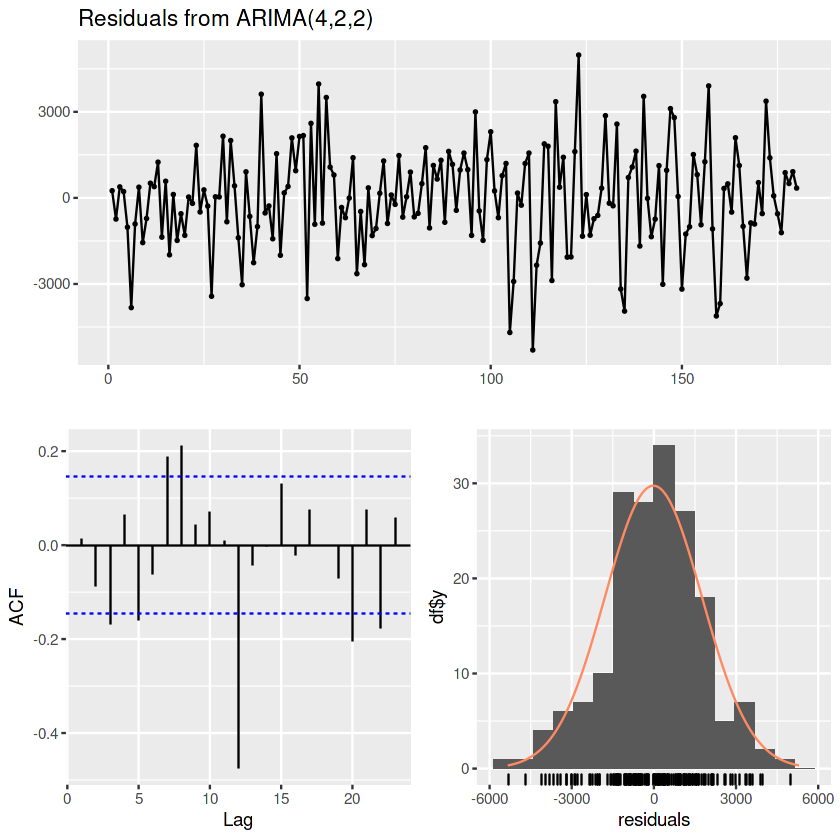

In [125]:
# ARIMA Model:

#install.packages("fpp2")
library(fpp2)

mreg.arima <- auto.arima(datSD[,1])
summary(mreg.arima)
checkresiduals(mreg.arima)
# lowest RMSE out of all models: 1767.912.

**Models for San Jose: All-In Regression, Step-Wise Regression, Self-Selected 'Optimal' Regression, Seasonal Regression,ARIMA**

In [126]:
# All-in model for SJ:
str(datSJ)
reg.SJ.all <- lm(AveragePrice ~ .-Date, data = datSJ)
summary(reg.SJ.all)

'data.frame':	180 obs. of  16 variables:
 $ AveragePrice                               : int  550192 558784 571211 580765 590452 596286 605362 613234 620139 624712 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Population                                 : int  901159 901159 901159 901159 901159 901159 901159 901159 901159 901159 ...
 $ Employment                                 : int  790300 790400 788500 785100 789000 792600 799500 801800 796400 802300 ...
 $ Unemployment                               : int  50000 51000 49500 45300 42800 46200 46700 44100 43100 42300 ...
 $ UnemploymentRate                           : num  6 6.1 5.9 5.5 5.1 5.5 5.5 5.2 5.1 5 ...
 $ HouseholdIncome                            : int  116456 116456 116456 116456 116456 116456 116456 116456 116456 116456 ...
 $ 10YearBondRate                             : num  4.22 4


Call:
lm(formula = AveragePrice ~ . - Date, data = datSJ)

Residuals:
   Min     1Q Median     3Q    Max 
-52449 -19573    -73  16812  80414 

Coefficients: (2 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                 -4.410e+06  2.430e+06  -1.815
PoliticalParty                                      NA         NA      NA
Population                                   1.231e+00  7.094e-01   1.735
Employment                                   7.353e-01  6.252e-01   1.176
Unemployment                                -1.756e+01  4.655e+00  -3.771
UnemploymentRate                             1.503e+05  4.475e+04   3.358
HouseholdIncome                              4.371e+00  1.593e+00   2.745
`10YearBondRate`                             8.853e+04  1.277e+04   6.931
`30YearFixedMortgageRate`                   -3.982e+04  1.598e+04  -2.491
ViolentCrimesRate                            3.154e+02  2.057

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2  linear dependencies found”


Reordering variables and trying again:


[1] 0.7347700 0.8730178 0.9320205 0.9604458 0.9676276 0.9733420 0.9758672
 [8] 0.9764712 0.9769441 0.9773123 0.9775703 0.9778691 0.9779857 0.9781404
[15] 0.9782513 0.9783720

(Intercept) PoliticalParty Population Employment Unemployment
1  TRUE        FALSE          FALSE      TRUE       FALSE       
2  TRUE        FALSE          FALSE      TRUE        TRUE       
3  TRUE        FALSE          FALSE      TRUE        TRUE       
4  TRUE        FALSE          FALSE      TRUE        TRUE       
5  TRUE        FALSE          FALSE      TRUE        TRUE       
6  TRUE        FALSE          FALSE      TRUE        TRUE       
7  TRUE        FALSE          FALSE      TRUE        TRUE       
8  TRUE        FALSE          FALSE      TRUE        TRUE       
9  TRUE        FALSE          FALSE      TRUE        TRUE       
10 TRUE        FALSE          FALSE      TRUE        TRUE       
11 TRUE        FALSE          FALSE      TRUE        TRUE       
12 TRUE        FALSE          FALSE      TRUE        TRUE       
13 TRUE        FALSE          FALSE      TRUE        TRUE       
14 TRUE        FALSE           TRUE      TRUE        TRUE       
15 TRUE        FALSE           TRUE      TRUE        TRUE       
16 TRUE        FALSE           TRUE      TRUE        TRUE       
   UnemploymentRate HouseholdIncome `10YearBondRate` `30YearFixedMortgageRate`
1  FALSE            FALSE           FALSE            FALSE                    
2  FALSE            FALSE           FALSE            FALSE                    
3   TRUE            FALSE           FALSE            FALSE                    
4   TRUE            FALSE            TRUE            FALSE                    
5   TRUE            FALSE            TRUE            FALSE                    
6   TRUE             TRUE            TRUE            FALSE                    
7   TRUE             TRUE            TRUE             TRUE                    
8   TRUE             TRUE            TRUE             TRUE                    
9   TRUE             TRUE            TRUE             TRUE                    
10  TRUE             TRUE            TRUE             TRUE                    
11  TRUE             TRUE            TRUE             TRUE                    
12  TRUE             TRUE            TRUE             TRUE                    
13  TRUE             TRUE            TRUE             TRUE                    
14  TRUE             TRUE            TRUE             TRUE                    
15  TRUE             TRUE            TRUE             TRUE                    
16  TRUE             TRUE            TRUE             TRUE                    
   ViolentCrimesRate ⋯ Month3 Month4 Month5 Month6 Month7 Month8 Month9 Month10
1  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
2  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
3  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
4  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
5  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
6  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
7  FALSE             ⋯ FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
8  FALSE             ⋯ FALSE  FALSE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
9  FALSE             ⋯ FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
10 FALSE             ⋯ FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
11  TRUE             ⋯ FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
12  TRUE             ⋯ FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
13  TRUE             ⋯ FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
14  TRUE             ⋯ FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
15  TRUE             ⋯  TRUE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  
16  TRUE             ⋯  TRUE   TRUE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  
   Month11 Month12
1  FALSE   FALSE  
2  FALSE   FALSE  
3  FALSE   FALSE  
4  FALSE   FALSE  
5  FALSE   FALSE  
6  FALSE   FALSE  
7  FALSE   FALSE  
8  FALSE   FALSE  
9  FALSE   FALSE  
10 FA

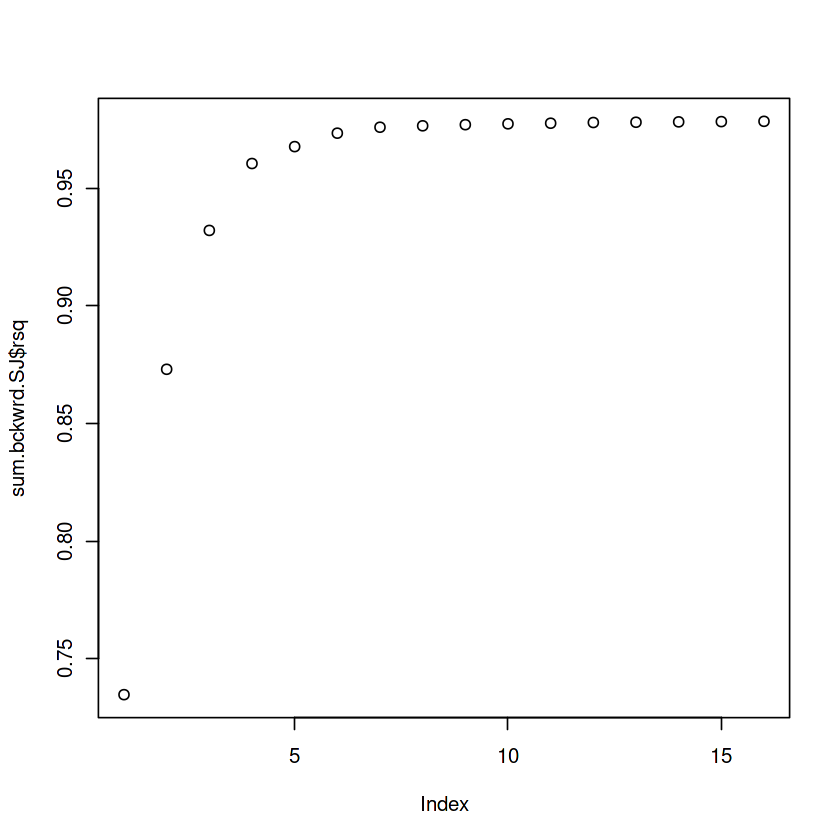

In [127]:
# Step-wise:
#install.packages("leaps")
library(leaps)

out.bckwrd.SJ <- regsubsets(AveragePrice ~ . -Date, data = datSJ, nvmax = 15,
                            method = "backward", really.big = T)


sum.bckwrd.SJ <- summary(out.bckwrd.SJ)
sum.bckwrd.SJ$rsq
sum.bckwrd.SJ$which
plot(sum.bckwrd.SJ$rsq)

In [128]:
# Optimal Model for SJ:
reg.SJ.all.opt <- lm(AveragePrice ~ +Employment +Unemployment +UnemploymentRate, data = datSJ)
summary(reg.SJ.all.opt)

# Based on the backward step-wise model above, the 3 above variables appear to be the most significant at all alpha levels and thus were
# (subjectively) selected as the most contributable.


Call:
lm(formula = AveragePrice ~ +Employment + Unemployment + UnemploymentRate, 
    data = datSJ)

Residuals:
    Min      1Q  Median      3Q     Max 
-111070  -35025   -9858   29544  141504 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.917e+06  1.388e+05  -13.81   <2e-16 ***
Employment        2.947e+00  1.406e-01   20.96   <2e-16 ***
Unemployment     -3.798e+01  2.817e+00  -13.49   <2e-16 ***
UnemploymentRate  3.507e+05  2.837e+04   12.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49790 on 176 degrees of freedom
Multiple R-squared:  0.932,	Adjusted R-squared:  0.9309 
F-statistic: 804.3 on 3 and 176 DF,  p-value: < 2.2e-16


In [129]:
# Optimal Model w/ Training / Test Data:
dat.SJ.tr <- datSJ[1:144,]
dat.SJ.tst <- datSJ[145:180,]

reg.SJ.all.opt.tr <- lm(AveragePrice ~ +Employment +Unemployment +UnemploymentRate, data = dat.SJ.tr)
summary(reg.SJ.all.opt.tr)

sum_regmnth.tr <- summary(reg.SJ.all.opt.tr)

reg.SJ.all.opt.tst <- lm(AveragePrice ~ +Employment +Unemployment +UnemploymentRate, data = dat.SJ.tst)
summary(reg.SJ.all.opt.tst)

yhat_mnth.tst <- predict(reg.SJ.all.opt.tr, dat.SJ.tst)
MSE_mnth.tst <- mean((dat.SJ.tst$AveragePrice - yhat_mnth.tst)^2)
RMSE_mnth.tst <- MSE_mnth.tst^0.5
RMSE_mnth.tst

MSE_mnth.tr <- mean(reg.SJ.all.opt.tr$residuals^2)
RMSE_mnth.tr <- sum_regmnth.tr$sigma
MSE_mnth.tr
MSE_mnth.tst
RMSE_mnth.tr
RMSE_mnth.tst


Call:
lm(formula = AveragePrice ~ +Employment + Unemployment + UnemploymentRate, 
    data = dat.SJ.tr)

Residuals:
   Min     1Q Median     3Q    Max 
-93103 -17648   7754  24051  72960 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -9.995e+05  1.334e+05  -7.493 6.94e-12 ***
Employment        1.941e+00  1.403e-01  13.839  < 2e-16 ***
Unemployment     -2.239e+01  2.515e+00  -8.901 2.57e-15 ***
UnemploymentRate  1.980e+05  2.509e+04   7.893 7.70e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35010 on 140 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8961 
F-statistic: 411.9 on 3 and 140 DF,  p-value: < 2.2e-16



Call:
lm(formula = AveragePrice ~ +Employment + Unemployment + UnemploymentRate, 
    data = dat.SJ.tst)

Residuals:
   Min     1Q Median     3Q    Max 
-78502 -44735  -7757  50539 120435 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)       1.153e+06  1.870e+06   0.616    0.542
Employment        2.106e-01  1.734e+00   0.121    0.904
Unemployment      3.581e+01  3.242e+01   1.105    0.277
UnemploymentRate -5.077e+05  3.534e+05  -1.437    0.160

Residual standard error: 57280 on 32 degrees of freedom
Multiple R-squared:  0.5605,	Adjusted R-squared:  0.5193 
F-statistic: 13.61 on 3 and 32 DF,  p-value: 6.841e-06


[1] 134332.5

[1] 1191402778

[1] 18045232509

[1] 35006.33

[1] 134332.5

In [130]:
# Optimal Model Training v. Test RMSE (%):
35006.33 - 134332.5 / 134332.5 # 73.94% decrease in RMSE!

[1] 35005.33

In [131]:
# seasonal Regression:
dat.SJ.ts.tr <- datSJts[1:144,]
dat.SJ.ts.tst <- datSJts[145:180,]

reg.SJ.seas.tr <- lm(AveragePrice ~ Month + timetr + timetrsq, data = dat.SJ.ts.tr)
summary(reg.SJ.seas.tr)

sum_regmnth.tr2 <- summary(reg.SJ.seas.tr)

reg.SJ.seas.tst <- lm(AveragePrice ~ Month + timetr + timetrsq, data = dat.SJ.ts.tst)
summary(reg.SJ.seas.tst)

yhat_mnth.tst2 <- predict(reg.SJ.seas.tr, dat.SJ.ts.tst)
MSE_mnth.tst2 <- mean((dat.SJ.ts.tst$AveragePrice - yhat_mnth.tst2)^2)
RMSE_mnth.tst2 <- MSE_mnth.tst2^0.5
RMSE_mnth.tst2

MSE_mnth.tr2 <- mean(reg.SJ.seas.tr$residuals^2)
RMSE_mnth.tr2 <- sum_regmnth.tr2$sigma
MSE_mnth.tr2
MSE_mnth.tst2
RMSE_mnth.tr2
RMSE_mnth.tst2


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.SJ.ts.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-135342  -22779    5609   22783   80971 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 691363.001  16456.921  42.010   <2e-16 ***
Month2        1291.316  18130.195   0.071    0.943    
Month3        2684.715  18130.891   0.148    0.883    
Month4        3959.031  18132.031   0.218    0.828    
Month5        5023.347  18133.604   0.277    0.782    
Month6        5743.414  18135.603   0.317    0.752    
Month7        6417.897  18138.024   0.354    0.724    
Month8        7232.047  18140.865   0.399    0.691    
Month9        7865.447  18144.132   0.433    0.665    
Month10       8385.097  18147.830   0.462    0.645    
Month11       8497.747  18151.972   0.468    0.640    
Month12       8674.231  18156.573   0.478    0.634    
timetr       -5879.267    358.551 -16.397   <2e-16 ***
timetrsq        50.708      2.395  21.


Call:
lm(formula = AveragePrice ~ Month + timetr + timetrsq, data = dat.SJ.ts.tst)

Residuals:
   Min     1Q Median     3Q    Max 
-38796 -28582  -6623  26742  62366 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.583e+07  1.834e+06  -8.632 1.63e-08 ***
Month2      -6.282e+03  3.271e+04  -0.192    0.849    
Month3      -1.167e+04  3.275e+04  -0.356    0.725    
Month4      -1.552e+04  3.280e+04  -0.473    0.641    
Month5      -1.839e+04  3.287e+04  -0.559    0.582    
Month6      -1.951e+04  3.294e+04  -0.592    0.560    
Month7      -1.871e+04  3.302e+04  -0.567    0.577    
Month8      -1.791e+04  3.310e+04  -0.541    0.594    
Month9      -1.526e+04  3.319e+04  -0.460    0.650    
Month10     -1.126e+04  3.329e+04  -0.338    0.738    
Month11     -5.343e+03  3.341e+04  -0.160    0.874    
Month12      1.699e+03  3.354e+04   0.051    0.960    
timetr       2.038e+05  2.264e+04   8.999 7.93e-09 ***
timetrsq    -6.132e+02  6.964e+01  -8.804 1.16e

[1] 116285.1

[1] 1780433509

[1] 13522234700

[1] 44409.15

[1] 116285.1

In [132]:
# Seasonal Regression Model Training v. Test RMSE (%):
44409.15 - 116285.1 / 116285.1 # 61.81% decrease in RMSE!

[1] 44408.15

Series: datSJ[, 1] 
ARIMA(1,2,2) 

Coefficients:
          ar1     ma1     ma2
      -0.6638  0.8177  0.5290
s.e.   0.0966  0.0696  0.1453

sigma^2 = 14313723:  log likelihood = -1717.88
AIC=3443.77   AICc=3444   BIC=3456.49

Training set error measures:
                   ME     RMSE      MAE         MPE      MAPE      MASE
Training set 5.878024 3730.431 2867.983 0.005895672 0.4242292 0.4275609
                    ACF1
Training set -0.08599355


	Ljung-Box test

data:  Residuals from ARIMA(1,2,2)
Q* = 39.506, df = 7, p-value = 1.565e-06

Model df: 3.   Total lags used: 10



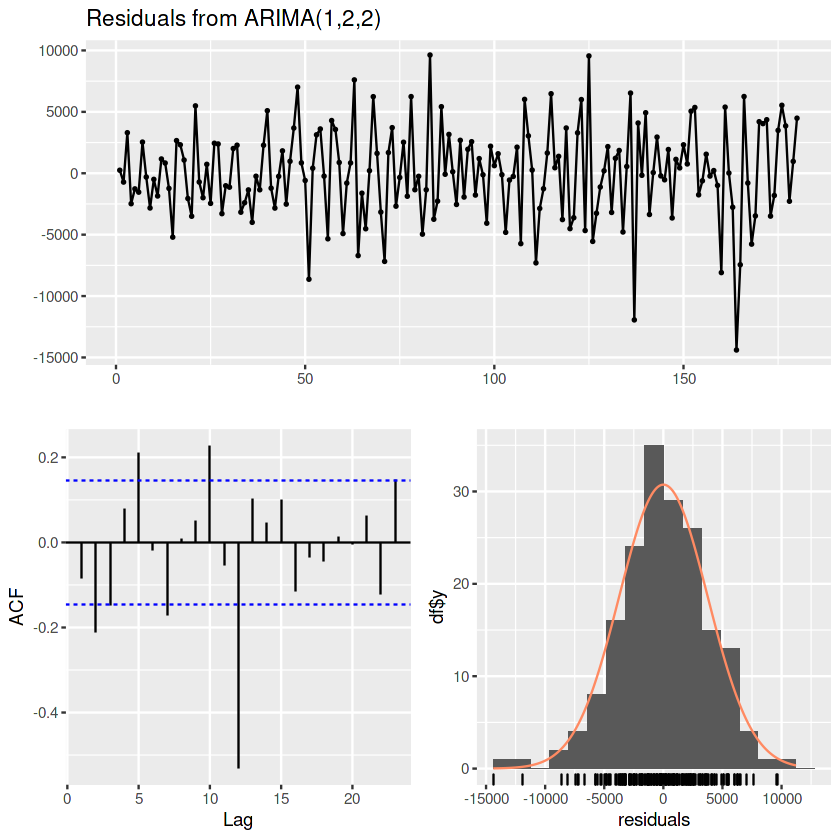

In [133]:
# ARIMA Model:

#install.packages("fpp2")
library(fpp2)

mreg.arima <- auto.arima(datSJ[,1])
summary(mreg.arima)
checkresiduals(mreg.arima)
# lowest RMSE out of all models: 3730.

# Building Forecasting Models with ARIMA & ETS for Each INDIVIDUAL Region

**Los Angeles**

'data.frame':	180 obs. of  18 variables:
 $ AveragePrice                               : int  520987 530077 538362 547026 553155 561053 570253 580514 590751 601842 ...
 $ Date                                       : chr  "1/31/2005" "2/28/2005" "3/31/2005" "4/30/2005" ...
 $ PoliticalParty                             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Population                                 : int  3769131 3769131 3769131 3769131 3769131 3769131 3769131 3769131 3769131 3769131 ...
 $ Employment                                 : int  4446300 4491600 4499300 4538300 4521900 4512100 4534300 4545700 4555500 4581100 ...
 $ Unemployment                               : int  286100 282200 262900 249300 243300 253900 271000 249300 244100 234700 ...
 $ UnemploymentRate                           : num  6 5.9 5.5 5.2 5.1 5.3 5.6 5.2 5.1 4.9 ...
 $ HouseholdIncome                            : int  63316 63316 63316 63316 63316 63316 63316 63316 63316 63316 ...
 $ 10YearBondRate                    

[1] 520987 530077 538362 547026 553155 561053 570253 580514 590751 601842
 [11] 610734 618108 624755 630004 636285 640154 646316 650327 653364 654803
 [21] 652556 651129 650726 652588 652104 650321 648030 648101 646471 644582
 [31] 640830 636023 629975 621816 614364 607072 600760 592437 580062 564878
 [41] 548555 535227 522003 510146 500399 491519 481940 468438 458566 452147
 [51] 448647 444735 441187 437445 435256 435198 436039 437275 439059 442879
 [61] 443474 441260 440817 441873 445830 444219 442515 438684 435730 432400
 [71] 427960 425356 423695 423326 420806 418116 412713 411740 410351 409012
 [81] 405993 402808 402486 401045 400472 399385 398855 398920 400478 402586
 [91] 405130 407594 411279 416955 421848 428643 433682 442252 451006 461810
[101] 470695 479500 488323 499478 509007 515618 520480 523211 527651 528337
[111] 530033 529716 531222 531919 534606 534265 534611 534694 537948 541286
[121] 545724 550456 555041 556674 559564 562356 564698 567443 570388 575132
[131] 578925 584545 587711 591562 593862 600103 604219 608947 611310 615416
[141] 620355 625774 628777 630619
attr(,"tsp")
[1]   1 144   1

[1] 634128 637239 640855 643133 647743 651675 656294 660355 664284 667725
[11] 673738 679687 685331 691194 697740 702650 704730 706155 709156 711451
[21] 713262 714359 715685 715600 715717 713276 711206 709806 710747 712660
[31] 713807 715688 718245 721896 725180 730358
attr(,"tsp")
[1] 145 180   1


	Ljung-Box test

data:  Residuals from ARIMA(5,2,1)
Q* = 12.28, df = 4, p-value = 0.01539

Model df: 6.   Total lags used: 10



    Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
145       633001.0 630889.4  635112.7 629771.5  636230.5
146       635837.4 631065.6  640609.1 628539.6  643135.1
147       639200.5 630918.5  647482.5 626534.3  651866.7
148       641467.8 629694.7  653240.8 623462.5  659473.1
149       643989.9 628275.5  659704.4 619956.7  668023.1
150       646115.2 626003.0  666227.4 615356.2  676874.2
151       648998.4 623917.5  674079.4 610640.5  687356.4
152       651489.7 621034.3  681945.1 604912.2  698067.2
153       654135.3 618046.1  690224.5 598941.6  709329.0
154       656478.2 614422.1  698534.2 592159.0  720797.3
155       658986.6 610689.0  707284.1 585121.9  732851.3
156       661552.8 606632.4  716473.2 577559.2  745546.4
157       664073.4 602291.8  725854.9 569586.7  758560.1
158       666653.3 597708.7  735597.9 561211.6  772095.0
159       669059.6 592738.8  745380.5 552337.0  785782.3
160       671651.4 587670.6  755632.2 543213.9  800088.9
161       674094.3 582222.1  76

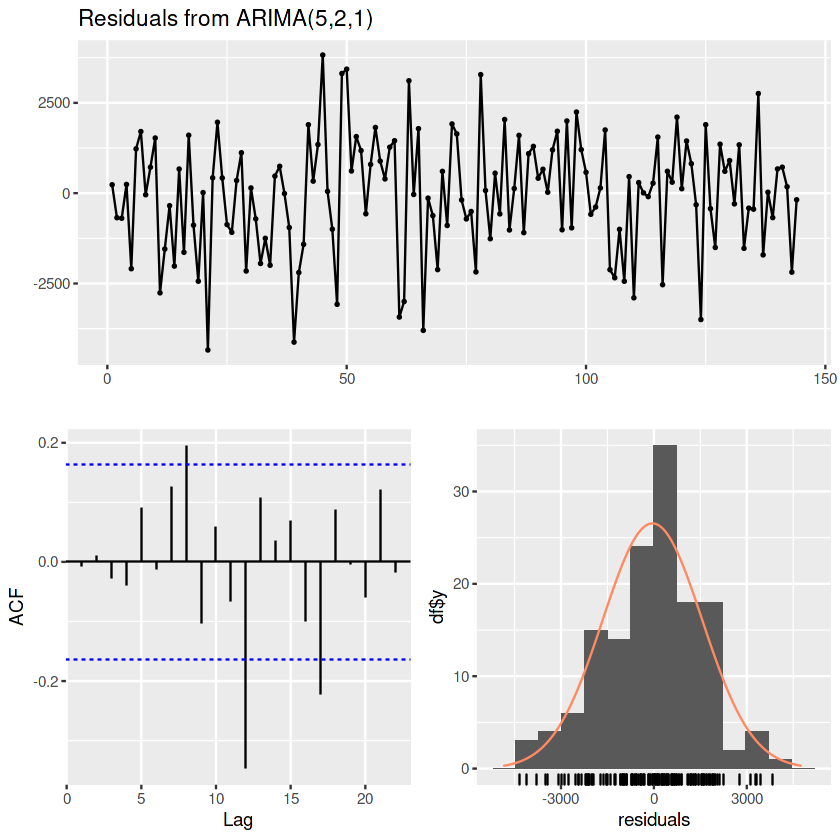

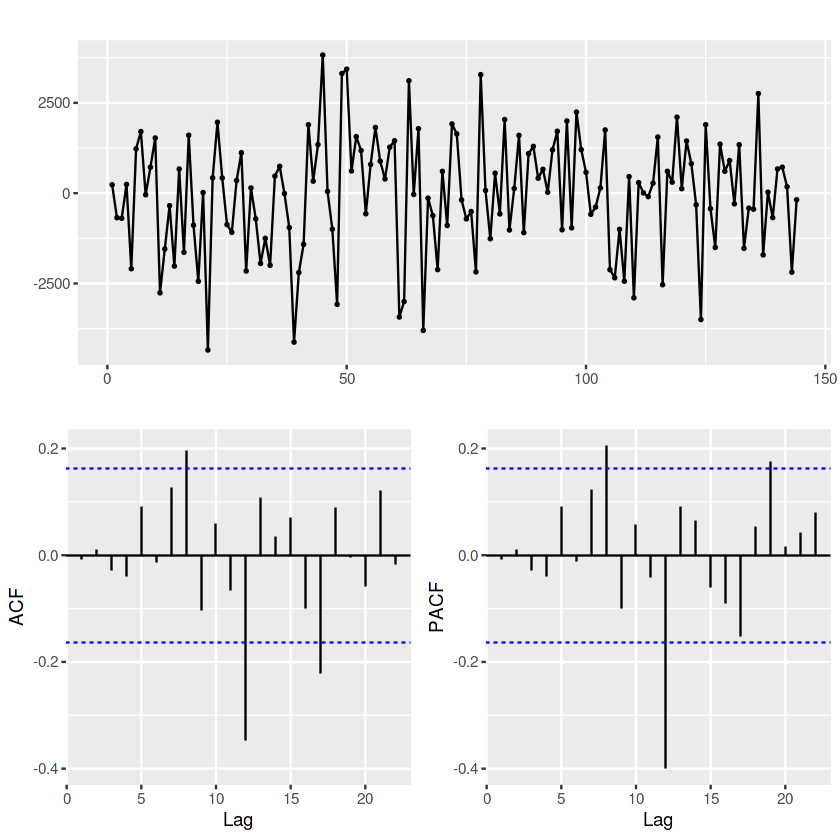

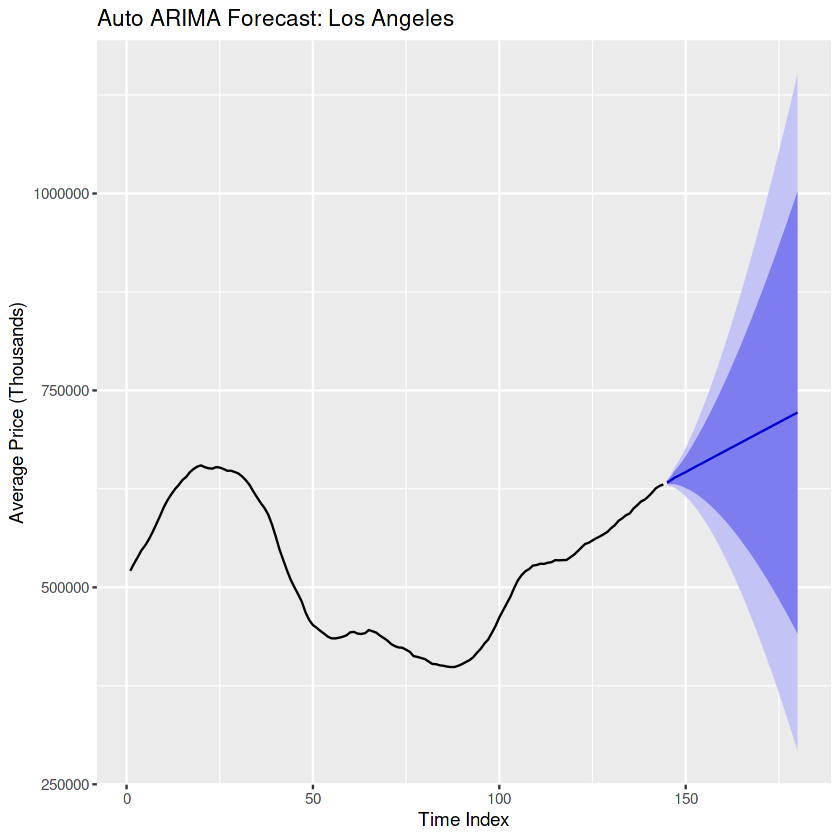

In [134]:
# Auto-ARIMA:
str(datLAts)
training.LA <- window(datLAts[,1], end = c(143,2))
training.LA

test.LA <- window(datLAts[,1], start = c(144,2))
test.LA

fitARLA <- auto.arima(training.LA, seasonal = TRUE)
checkresiduals(fitARLA)
fore.AR.LA <- forecast(fitARLA, h = 36)
fore.AR.LA 

ggtsdisplay(fitARLA$residuals)
ARIMAautofore <- forecast(fitARLA, h = 36)
autoplot(ARIMAautofore, xlab = "Time Index", ylab = "Average Price (Thousands)") + 
  ggtitle("Auto ARIMA Forecast: Los Angeles")

In [135]:
# Acuacy for Auto-ARIMA
accuracy(fore.AR.LA, test.LA)

ME          RMSE      MAE       MPE         MAPE      MASE     
Training set   -46.50834  1601.307  1258.227 0.001658557 0.2481484 0.2754168
Test set     14419.16102 17837.560 14419.161 2.057790848 2.0577908 3.1562497
             ACF1         Theil's U
Training set -0.008005588       NA 
Test set      0.950982312 4.940931


Call:
arima(x = training.LA, order = c(4, 2, 4))

Coefficients:
        ar1     ar2      ar3      ar4      ma1     ma2      ma3     ma4
      0.684  0.0015  -0.1890  -0.0657  -0.6913  0.2248  -0.6914  1.0000
s.e.  0.091  0.1104   0.1036   0.0878   0.0517  0.0552   0.0506  0.0494

sigma^2 estimated as 1764870:  log likelihood = -1229.52,  aic = 2477.05

Training set error measures:
                   ME     RMSE      MAE         MPE      MAPE      MASE
Training set -30.6741 1320.581 1039.543 0.001592204 0.2045447 0.2275485
                     ACF1
Training set -0.001889261


	Ljung-Box test

data:  Residuals from ARIMA(4,2,4)
Q* = 1.6021, df = 3, p-value = 0.6589

Model df: 8.   Total lags used: 11



    Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
145       632689.4 630963.6  634415.2 630050.1  635328.8
146       636385.5 632531.5  640239.4 630491.4  642279.5
147       640174.7 633419.7  646929.7 629843.9  650505.5
148       644122.9 634806.9  653438.9 629875.3  658370.5
149       647857.7 635573.1  660142.3 629070.0  666645.4
150       651322.4 635468.5  667176.4 627075.9  675568.9
151       654565.9 634356.1  674775.6 623657.7  685474.1
152       657687.5 632321.1  683053.8 618892.9  696482.0
153       660790.5 629573.0  692008.0 613047.4  708533.5
154       663940.1 626324.1  701556.1 606411.4  721468.8
155       667159.2 622731.6  711586.7 599213.1  735105.2
156       670437.3 618876.2  721998.4 591581.4  749293.3
157       673748.4 614777.5  732719.3 583560.1  763936.7
158       677065.9 610421.1  743710.8 575141.4  778990.4
159       680372.2 605783.7  754960.6 566299.0  794445.3
160       683660.6 600849.0  766472.1 557011.3  810309.9
161       686933.4 595613.4  77

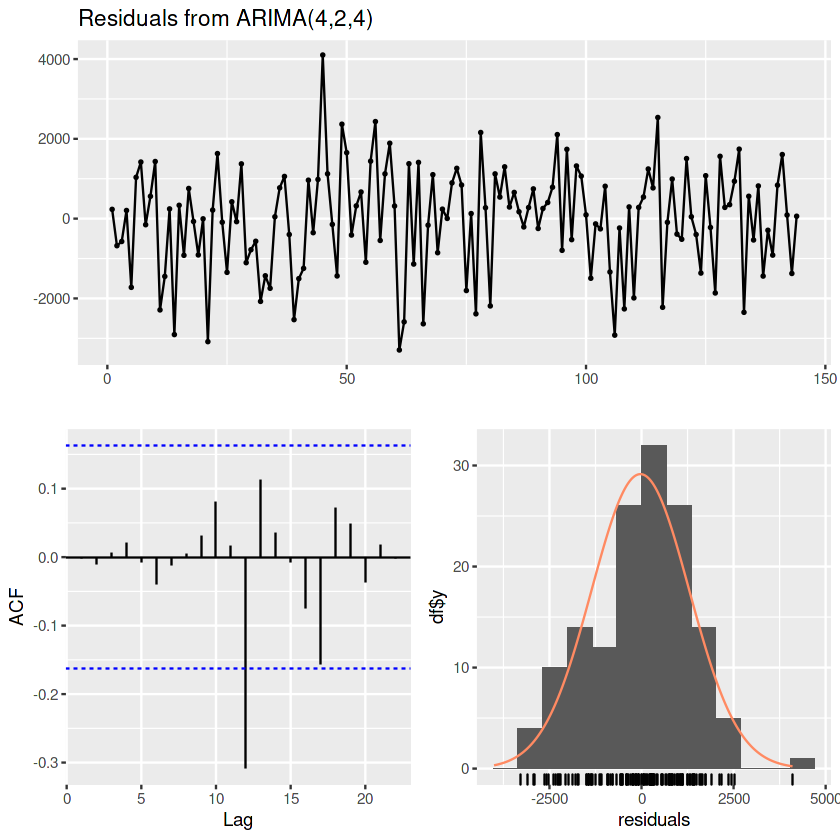

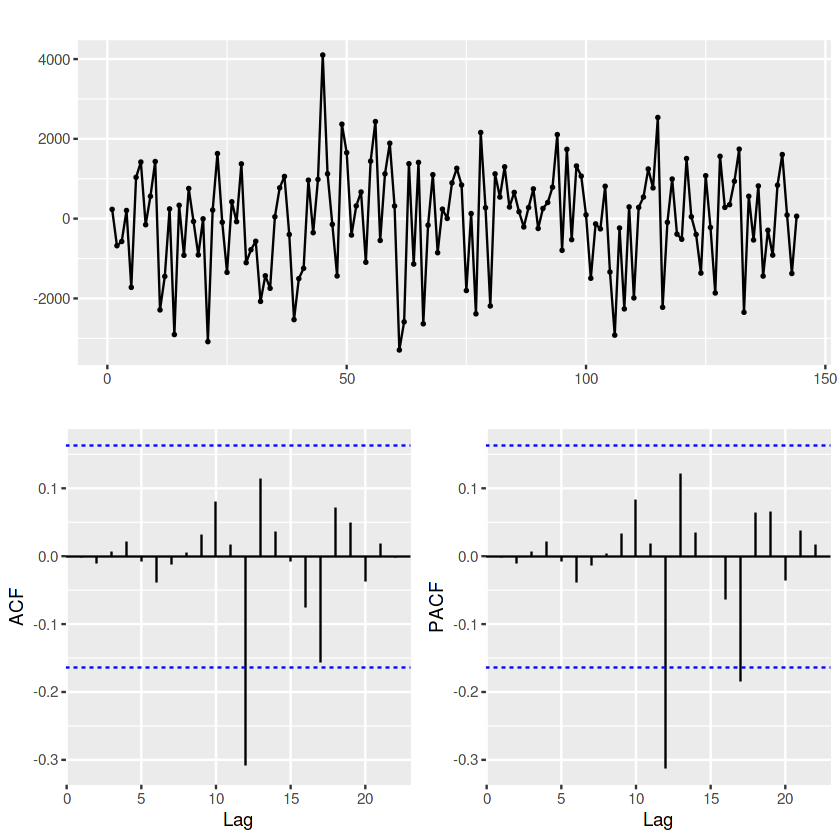

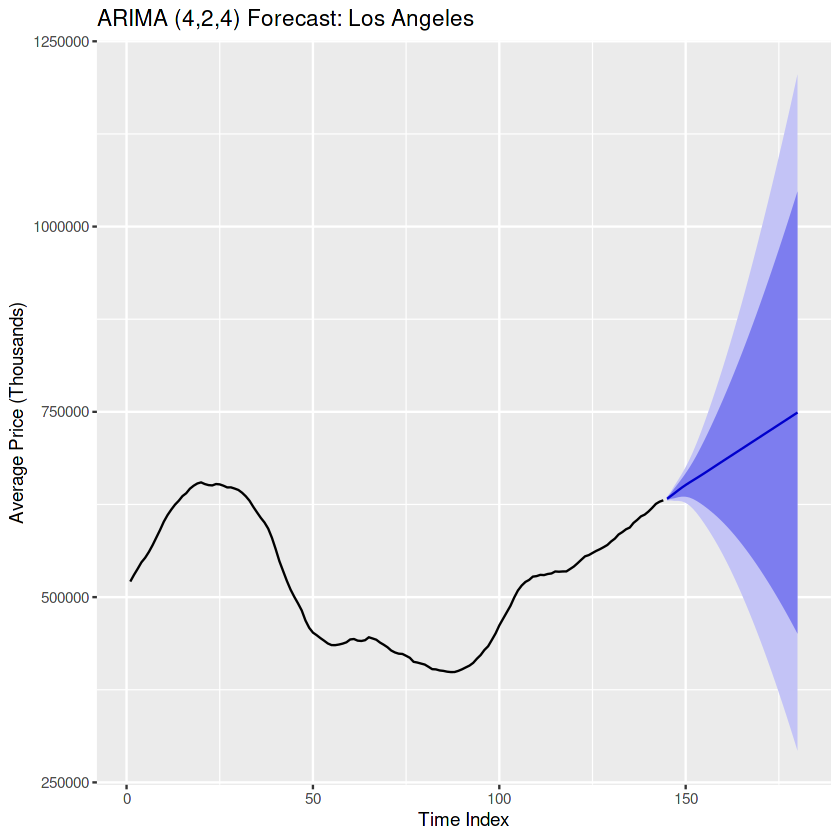

In [136]:
# Controlled ARIMA:

fitARLA2 <- arima(training.LA, order = c(4,2,4))
summary(fitARLA2)

checkresiduals(fitARLA2)
fore.AR.LA2 <- forecast(fitARLA2, h = 36)
fore.AR.LA2

ggtsdisplay(fitARLA2$residuals)
ARIMAcntfore <- forecast(fitARLA2, h = 36)
autoplot(ARIMAcntfore, xlab = "Time Index", ylab = "Average Price (Thousands)") + 
  ggtitle('ARIMA (4,2,4) Forecast: Los Angeles')

In [137]:
# Acuracy for Controlled ARIMA
accuracy(fore.AR.LA2, test.LA)

ME       RMSE      MAE       MPE         MAPE      MASE     
Training set -30.6741  1320.581  1039.543 0.001592204 0.2045447 0.2275485
Test set     574.7509 12708.418 10480.049 0.100506354 1.4816227 2.2940067
             ACF1         Theil's U
Training set -0.001889261       NA 
Test set      0.951713476 3.485089

In [138]:
# Based on RMSE values, the controlled ARIMA model gives best results!

In [139]:
# ETS:
fitetsLA1 <- ets(datLAts[,1])
summary(fitetsLA1)

fitetsLA2 <- ets(datLAts[,1], model = "ANN")
summary(fitetsLA2)

fitetsLA3 <- ets(datLAts[,1], model = "AAN")
summary(fitetsLA3)

fitetsLA4 <- ets(datLAts[,1], model = "AAA")
summary(fitetsLA4)

fitetsLA5 <- ets(datLAts[,1], model = "AAA", damped = TRUE)
summary(fitetsLA5)

fitetsLA6 <- ets(datLAts[,1], model = "AAA", allow.multiplicative.trend = TRUE)
summary(fitetsLA6)

ETS(A,Ad,N) 

Call:
 ets(y = datLAts[, 1]) 

  Smoothing parameters:
    alpha = 0.9459 
    beta  = 0.9459 
    phi   = 0.945 

  Initial states:
    l = 516970.1212 
    b = 9496.0849 

  sigma:  1813.617

     AIC     AICc      BIC 
3642.770 3643.255 3661.928 

Training set error measures:
                   ME     RMSE      MAE        MPE      MAPE      MASE
Training set 44.27389 1788.251 1412.245 0.01425743 0.2664844 0.3304387
                     ACF1
Training set -0.007696856

ETS(A,N,N) 

Call:
 ets(y = datLAts[, 1], model = "ANN") 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 559400.2666 

  sigma:  6148.495

     AIC     AICc      BIC 
4079.348 4079.484 4088.926 

Training set error measures:
                   ME     RMSE      MAE       MPE      MAPE     MASE      ACF1
Training set 949.8574 6114.242 4463.892 0.1415861 0.8266174 1.044466 0.6667457

ETS(A,Ad,N) 

Call:
 ets(y = datLAts[, 1], model = "AAN") 

  Smoothing parameters:
    alpha = 0.9459 
    beta  = 0.9459 
    phi   = 0.945 

  Initial states:
    l = 516970.1212 
    b = 9496.0849 

  sigma:  1813.617

     AIC     AICc      BIC 
3642.770 3643.255 3661.928 

Training set error measures:
                   ME     RMSE      MAE        MPE      MAPE      MASE
Training set 44.27389 1788.251 1412.245 0.01425743 0.2664844 0.3304387
                     ACF1
Training set -0.007696856

ERROR: Error in ets(datLAts[, 1], model = "AAA"): Nonseasonal data


In [ ]:
fitetsLAfore <- forecast(fitetsLA1, h = 36)
fitetsLAfore

In [ ]:
# out of the 6 ETS models above, model 1 seems to be the best with the lowest RMSE.
# However, the controlled ARIMA will be used to forecast since it provides the lowest of RMSEs.

In [ ]:
# split model 2 training/ test:

fitetsLAtr <- ets(training.LA)
summary(fitetsLAtr)

fitetsLAtst <- ets(test.LA)
summary(fitetsLAtst)

In [ ]:
# Plot ETS model 1:

autoplot(fitetsLAfore, xlab = "Time Index", ylab = "Average Price (Thousands)") + 
  ggtitle('ETS Forecast: Los Angeles')

In [ ]:
# Plot for auto-ARIMA, controlled ARIMA, and ETS:

autoplot(ARIMAautofore, xlab = "Time Index", ylab = "Average Price (Thousands)") + 
  autolayer(ARIMAcntfore)

autoplot(ARIMAautofore, xlab = "Time Index", ylab = "Average Price (Thousands)") + 
  autolayer(ARIMAcntfore)

**San Francisco**

In [ ]:
# Auto-ARIMA:
str(datSFts)
training.SF <- window(datSFts[,1], end = c(143,2))
training.SF

test.SF <- window(datSFts[,1], start = c(144,2))
test.SF

fitARSF <- auto.arima(training.SF, seasonal = TRUE)
checkresiduals(fitARSF)
fore.AR.SF <- forecast(fitARSF, h = 36)

ggtsdisplay(fitARSF$residuals)
autoplot(forecast(fitARSF, h = 36))

accuracy(fore.AR.SF, test.SF)

In [ ]:
# Controlled ARIMA:

fitARSF2 <- arima(training.SF, order = c(1,2,0))
summary(fitARSF2)

checkresiduals(fitARSF2)
fore.AR.SF2 <- forecast(fitARSF2, h = 36)
fore.AR.SF2

ggtsdisplay(fitARSF2$residuals)
autoplot(forecast(fitARSF2, h = 36))

accuracy(fore.AR.SF2, test.SF)

In [ ]:
4906.314 / 34322.648 # 599.56% increase in RMSE.

# Based on RMSE values, the controlled ARIMA model gives best results!

In [ ]:
# ETS:

fitetsSF1 <- ets(datSFts[,1])
summary(fitetsSF1)

fitetsSF2 <- ets(datSFts[,1], model = "ANN")
summary(fitetsSF2)

fitetsSF3 <- ets(datSFts[,1], model = "AAN")
summary(fitetsSF3)

fitetsSF4 <- ets(datSFts[,1], model = "AAA")
summary(fitetsLA4)

fitetsSF5 <- ets(datSFts[,1], model = "AAA", damped = TRUE)
summary(fitetsSF5)

fitetsSF6 <- ets(datSFts[,1], model = "AAA", allow.multiplicative.trend = TRUE)
summary(fitetsSF6)

In [ ]:
fitetsSFfore <- forecast(fitetsSF1, h = 36)

autoplot(fitetsSFfore)

In [ ]:
# out of the 6 ETS models above, model 1 seems to be the best with the lowest RMSE.
# However, the controlled ARIMA will be used to forecast since it provides the lowest of RMSEs.

**Fresno**

In [ ]:
# Auto-ARIMA:
str(datFRSts)
training.FRS <- window(datFRSts[,1], end = c(143,2))
training.FRS

test.FRS <- window(datFRSts[,1], start = c(144,2))
test.FRS

fitARFRS <- auto.arima(training.FRS, seasonal = TRUE)
checkresiduals(fitARFRS)
fore.AR.FRS <- forecast(fitARFRS, h = 36)

ggtsdisplay(fitARFRS$residuals)
autoplot(forecast(fitARFRS, h = 36))

accuracy(fore.AR.FRS, test.FRS)

In [ ]:
# Controlled ARIMA:

fitARFRS2 <- arima(training.FRS, order = c(4,2,4))
summary(fitARFRS2)

checkresiduals(fitARLA2)
fore.AR.FRS2 <- forecast(fitARFRS2, h = 36)

ggtsdisplay(fitARFRS2$residuals)
autoplot(forecast(fitARFRS2, h = 36))

In [ ]:
accuracy(fore.AR.FRS2, test.FRS)

**Bakersfield**

In [ ]:
# Auto-ARIMA:
str(datBKRSts)
training.BKRS <- window(datBKRSts[,1], end = c(143,2))
training.BKRS

test.BKRS <- window(datBKRSts[,1], start = c(144,2))
test.BKRS

fitARBKRS <- auto.arima(training.BKRS, seasonal = TRUE)
checkresiduals(fitARBKRS)
fore.AR.BKRS <- forecast(fitARBKRS, h = 36)

ggtsdisplay(fitARBKRS$residuals)
autoplot(forecast(fitARBKRS, h = 36))

In [ ]:
accuracy(fore.AR.BKRS, test.BKRS)

In [ ]:
# Controlled ARIMA:

fitARBKRS2 <- arima(training.BKRS, order = c(4,2,4))
summary(fitARBKRS2)

checkresiduals(fitARBKRS2)
fore.AR.BKRS2 <- forecast(fitARBKRS2, h = 36)

ggtsdisplay(fitARBKRS2$residuals)
autoplot(forecast(fitARBKRS2, h = 36))

In [ ]:
accuracy(fore.AR.BKRS2, test.BKRS)

**Oakland**

In [ ]:
# Auto-ARIMA:
str(datOKts)
training.OK <- window(datOKts[,1], end = c(143,2))
training.OK

test.OK <- window(datOKts[,1], start = c(144,2))
test.OK

fitAROK <- auto.arima(training.OK, seasonal = TRUE)
checkresiduals(fitAROK)
fore.AR.OK <- forecast(fitAROK, h = 36)

ggtsdisplay(fitAROK$residuals)
autoplot(forecast(fitAROK, h = 36))

In [ ]:
accuracy(fore.AR.OK, test.OK)

In [ ]:
# Controlled ARIMA:
#
fitAROK2 <- arima(training.OK, order = c(1,2,2))
summary(fitAROK2)
#
checkresiduals(fitAROK2)
fore.AR.OK2 <- forecast(fitAROK2, h = 36)
#
#
ggtsdisplay(fitAROK2$residuals)
autoplot(forecast(fitAROK2, h = 36))

In [ ]:
accuracy(fore.AR.OK2, test.OK)

In [ ]:
# ETS:

fitetsOK1 <- ets(datOKts[,1])
summary(fitetsOK1)
#RMSE 2415
fitetsOK2 <- ets(datOKts[,1], model = "ANN")
summary(fitetsOK2)
#5352
fitetsOK3 <- ets(datOKts[,1], model = "AAN")
summary(fitetsOK3)
#2415
fitetsOK4 <- ets(datOKts[,1], model = "AAA")
summary(fitetsOK4)

fitetsOK5 <- ets(datOKts[,1], model = "AAA", damped = TRUE)
summary(fitetsOK5)

fitetsOK6 <- ets(datOKts[,1], model = "AAA", allow.multiplicative.trend = TRUE)
summary(fitetsOK6)

In [ ]:
# out of the 6 ETS models above, model 1 seems to be the best with the lowest RMSE.
# Therefore, we will use this model to forecast.

In [ ]:
fitetsOKfore <- forecast(fitetsOK1, h = 36)

autoplot(fitetsOKfore)

**Sacramento**

In [ ]:
# Auto-ARIMA:
str(datSACts)
training.SAC <- window(datSACts[,1], end = c(143,2))
training.SAC

test.SAC <- window(datSACts[,1], start = c(144,2))
test.SAC

fitARSAC <- auto.arima(training.SAC, seasonal = TRUE)
checkresiduals(fitARSAC)
fore.AR.SAC <- forecast(fitARSAC, h = 36)

ggtsdisplay(fitARSAC$residuals)
autoplot(forecast(fitARSAC, h = 36))

In [ ]:
accuracy(fore.AR.SAC, test.SAC)

In [ ]:
# Controlled ARIMA:
#
fitARSAC2 <- arima(training.SAC, order = c(5,2,1))
summary(fitARSAC2)
#
checkresiduals(fitARSAC2)
fore.AR.SAC2 <- forecast(fitARSAC2, h = 36)
#
#
ggtsdisplay(fitARSAC2$residuals)
autoplot(forecast(fitARSAC2, h = 36))

In [ ]:
accuracy(fore.AR.SAC2, test.SAC)

In [ ]:
# Based on RMSE values, auto arima has lowest RMSE

In [ ]:
# ETS:

fitetsSAC1 <- ets(datSACts[,1])
summary(fitetsSAC1)
#RMSE 1383.458
fitetsSAC2 <- ets(datSACts[,1], model = "ANN")
summary(fitetsSAC2)
#3113,76
fitetsSAC3 <- ets(datSACts[,1], model = "AAN")
summary(fitetsSAC3)
#1573.805
fitetsSAC4 <- ets(datSACts[,1], model = "AAA")
summary(fitetsSAC4)

fitetsSAC5 <- ets(datSACts[,1], model = "AAA", damped = TRUE)
summary(fitetsSAC5)

fitetsSAC6 <- ets(datSACts[,1], model = "AAA", allow.multiplicative.trend = TRUE)
summary(fitetsSAC6)

In [ ]:
# out of the 6 ETS models above, model 1 seems to be the best with the lowest RMSE.

In [ ]:
fitetsSACfore <- forecast(fitetsSAC1, h = 36)

autoplot(fitetsSACfore)

**Riverside**

In [ ]:
# Auto-ARIMA:
str(datRVts)
training.RV <- window(datRVts[,1], end = c(143,2))
training.RV

test.RV <- window(datRVts[,1], start = c(144,2))
test.RV

fitARRV <- auto.arima(training.RV, seasonal = TRUE)
checkresiduals(fitARRV)
fore.AR.RV <- forecast(fitARRV, h = 36)

ggtsdisplay(fitARRV$residuals)
autoplot(forecast(fitARRV, h = 36))

In [ ]:
accuracy(fore.AR.RV, test.RV)

In [ ]:
# Controlled ARIMA:
#
fitARRV2 <- arima(training.RV, order = c(4,2,4))
summary(fitARRV2)
#
checkresiduals(fitARRV2)
fore.AR.RV2 <- forecast(fitARRV2, h = 36)
#
#
ggtsdisplay(fitARRV2$residuals)
autoplot(forecast(fitARRV2, h = 36))

In [ ]:
accuracy(fore.AR.RV2, test.RV)

In [ ]:
# Based on RMSE values, the controlled ARIMA model gives best results!

In [ ]:
# ETS:
#
fitetsRV1 <- ets(datRVts[,1])
summary(fitetsRV1)
#
fitetsRV2 <- ets(datRVts[,1], model = "ANN")
summary(fitetsRV2)
#
fitetsRV3 <- ets(datRVts[,1], model = "AAN")
summary(fitetsRV3)
#
fitetsRV4 <- ets(datRVts[,1], model = "AAA")
summary(fitetsRV4)
#
fitetsRV5 <- ets(datRVts[,1], model = "AAA", damped = TRUE)
summary(fitetsRV5)
#
fitetsRV6 <- ets(datRVts[,1], model = "AAA", allow.multiplicative.trend = TRUE)
summary(fitetsRV6)

In [ ]:
# out of the 6 ETS models above, model 1 seems to be the best with the lowest RMSE.

In [ ]:
fitetsRVfore <- forecast(fitetsRV1, h = 36)
#
autoplot(fitetsRVfore)

**Long Beach**

In [ ]:
# Auto-ARIMA:
str(datLBts)
training.LB <- window(datLBts[,1], end = c(143,2))
training.LB

test.LB <- window(datLBts[,1], start = c(144,2))
test.LB

fitARLB <- auto.arima(training.LB, seasonal = TRUE)
checkresiduals(fitARLB)
fore.AR.LB <- forecast(fitARLB, h = 36)

ggtsdisplay(fitARLB$residuals)
autoplot(forecast(fitARKV, h = 36))

In [ ]:
accuracy(fore.AR.LB, test.LB)

In [ ]:
# Controlled ARIMA:

fitAR2 <- arima(training.LB, order = c(4,2,4))
summary(fitAR2)

checkresiduals(fitAR2)
fore.AR.LB2 <- forecast(fitAR2, h = 36)

ggtsdisplay(fitAR2$residuals)
autoplot(forecast(fitAR2, h = 36))

In [ ]:
accuracy(fore.AR.LB2, test.LB)

In [ ]:
# Based on RMSE values, the controlled ARIMA model gives best results!

In [ ]:
# ETS:
#
fitetsLB1 <- ets(datLBts[,1])
summary(fitetsLB1)
#
fitetsLB2 <- ets(datLBts[,1], model = "ANN")
summary(fitetsLB2)
#
fitetsLB3 <- ets(datLBts[,1], model = "AAN")
summary(fitetsLB3)
#
fitetsLB4 <- ets(datLBts[,1], model = "AAA")
summary(fitetsLB4)
#
fitetslB5 <- ets(datLBts[,1], model = "AAA", damped = TRUE)
summary(fitetsLB5)
#
fitetsLB6 <- ets(datLBts[,1], model = "AAA", allow.multiplicative.trend = TRUE)
summary(fitetsLB6)

In [ ]:
# out of the 6 ETS models above, model 1 seems to be the best with the lowest RMSE.

In [ ]:
fitetsLBfore <- forecast(fitetsLB1, h = 36)
#
autoplot(fitetsLBfore)

**San Diego**

In [ ]:
# Auto-ARIMA:
str(datSDts)
training.SD <- window(datSDts[,1], end = c(143,2))
training.SD

test.SD <- window(datSDts[,1], start = c(144,2))
test.SD

fitARSD <- auto.arima(training.SD, seasonal = TRUE)
checkresiduals(fitARSD)
fore.AR.SD <- forecast(fitARSD, h = 36)

ggtsdisplay(fitARSD$residuals)
autoplot(forecast(fitARSD, h = 36))

In [ ]:
accuracy(fore.AR.SD, test.SD)

In [ ]:
# Controlled ARIMA:

fitARSD2 <- arima(training.SD, order = c(4,2,1))
summary(fitARSD2)
#
# RMSE = 1838.078
# 
checkresiduals(fitARSD2)
fore.AR.SD2 <- forecast(fitARSD2, h = 36)

ggtsdisplay(fitARSD2$residuals)
autoplot(forecast(fitARSD2, h = 36))

In [ ]:
accuracy(fore.AR.SD2, test.SD)

In [ ]:
# Based on RMSE values, the auto ARIMA model gives the best results!

In [ ]:
# ETS:

fitetsSD1 <- ets(datSDts[,1])
summary(fitetsSD1)

fitetsSD2 <- ets(datSDts[,1], model = "ANN")
summary(fitetsSD2)

fitetsSD3 <- ets(datSDts[,1], model = "AAN")
summary(fitetsSD3)

fitetsSD4 <- ets(datSDts[,1], model = "AAA")
summary(fitetsSD4)

fitetsSD5 <- ets(datSDts[,1], model = "AAA", damped = TRUE)
summary(fitetsSD5)

fitetsSD6 <- ets(datSDts[,1], model = "AAA", allow.multiplicative.trend = TRUE)
summary(fitetsSD6)

In [ ]:
# out of the 6 ETS models above, model 1 seems to be the best with the lowest RMSE of 2472.074.

In [ ]:
fitetsSDfore <- forecast(fitetsSD1, h = 36)

autoplot(fitetsSDfore)

**San Jose**

In [ ]:
# Auto-ARIMA:
str(datSJts)
training.SJ <- window(datSJts[,1], end = c(143,2))
training.SJ

test.SJ <- window(datSJts[,1], start = c(144,2))
test.SJ

fitARSJ <- auto.arima(training.SJ, seasonal = TRUE)
checkresiduals(fitARSJ)
fore.AR.SJ <- forecast(fitARSJ, h = 36)

ggtsdisplay(fitARSJ$residuals)
autoplot(forecast(fitARSJ, h = 36))

In [ ]:
accuracy(fore.AR.SJ, test.SJ)

In [ ]:
# Controlled ARIMA:

fitARSJ2 <- arima(training.SJ, order = c(1,2,3))
summary(fitARSJ2)
#
# RMSE = 2931.317
# 
checkresiduals(fitARSJ2)
fore.AR.SJ2 <- forecast(fitARSJ2, h = 36)

ggtsdisplay(fitARSJ2$residuals)
autoplot(forecast(fitARSJ2, h = 36))

In [ ]:
accuracy(fore.AR.SJ2, test.SJ)

In [ ]:
# Based on RMSE values, the controlled ARIMA model gives best results!

In [ ]:
# ETS:

fitetsSJ1 <- ets(datSJts[,1])
summary(fitetsSJ1)

fitetsSJ2 <- ets(datSJts[,1], model = "ANN")
summary(fitetsSJ2)

fitetsSJ3 <- ets(datSJts[,1], model = "AAN")
summary(fitetsSJ3)

fitetsSJ4 <- ets(datSJts[,1], model = "AAA")
summary(fitetsSJ4)

fitetsSJ5 <- ets(datSJts[,1], model = "AAA", damped = TRUE)
summary(fitetsSJ5)

fitetsSJ6 <- ets(datSJts[,1], model = "AAA", allow.multiplicative.trend = TRUE)
summary(fitetsSJ6)

In [ ]:
# out of the 6 ETS models above, model 1 seems to be the best with the lowest RMSE of 4147.

In [ ]:
fitetsSJfore <- forecast(fitetsSJ1, h = 36)

autoplot(fitetsSJfore)

# Graphing All Forecasting Models

In [ ]:
autoplot(ARIMAautofore, xlab = "Time Index", ylab = "Average Price (Thousands)") + 
    ggtitle("Controlled ARIMA Forecast: Los Angeles")

autoplot(fitetsSFfore, xlab = "Time Index", ylab = "Average Price (Thousands)") +
     ggtitle("Controlled ARIMA Forecast: San Francisco")

autoplot(forecast(fitARFRS2, h = 36), xlab = "Time Index", ylab = "Average Price (Thousands)") +
     ggtitle("Controlled ARIMA Forecast: Fresno")

autoplot(forecast(fitARBKRS2, h = 36), xlab = "Time Index", ylab = "Average Price (Thousands)") +
     ggtitle("Controlled ARIMA Forecast: Bakersfield")

autoplot(fitetsOKfore, xlab = "Time Index", ylab = "Average Price (Thousands)") +
     ggtitle("Controlled ARIMA Forecast: Oakland")

autoplot(fitetsSACfore, xlab = "Time Index", ylab = "Average Price (Thousands)") +
     ggtitle("Controlled ARIMA Forecast: Sacramento")

autoplot(fitetsRVfore, xlab = "Time Index", ylab = "Average Price (Thousands)") +
     ggtitle("Controlled ARIMA Forecast: Riverside")

autoplot(fitetsLBfore, xlab = "Time Index", ylab = "Average Price (Thousands)") +
     ggtitle("Controlled ARIMA Forecast: Long Beach")

autoplot(fitetsSDfore, xlab = "Time Index", ylab = "Average Price (Thousands)") +
     ggtitle("Controlled ARIMA Forecast: San Diego")

autoplot(fitetsSJfore, xlab = "Time Index", ylab = "Average Price (Thousands)") +
     ggtitle("Controlled ARIMA Forecast: San Jose")